# **Project: G2M Insight for Cab Investment Firm**

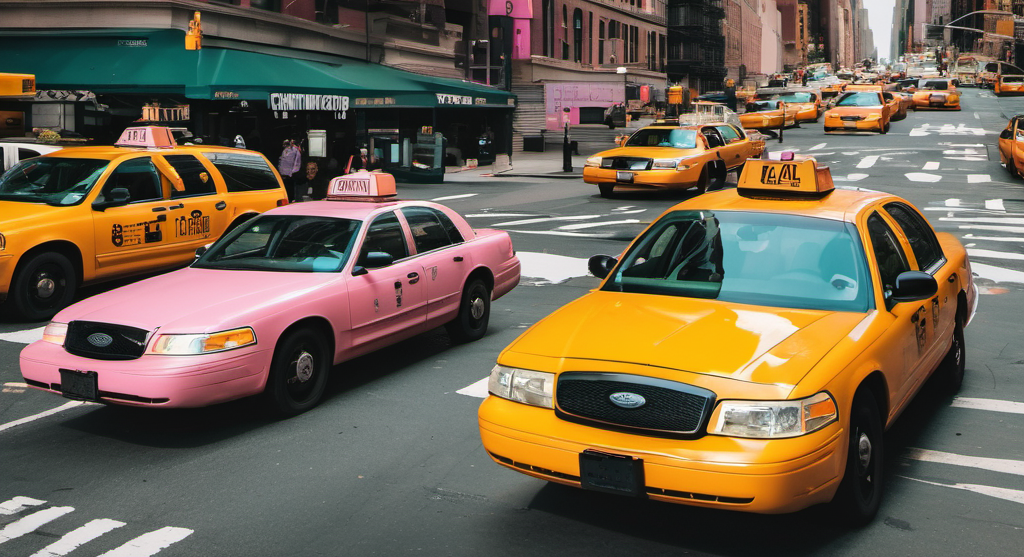

# Introduction

In recent years, the cab industry in the United States has experienced significant growth, with multiple key players emerging in the market. As a result, private firms like XYZ are exploring investment opportunities within this sector. In line with their Go-to-Market (G2M) strategy, XYZ seeks to thoroughly understand the market dynamics before making any investment decisions.

## Project Objectives and Scope

The primary objective of this project is to provide actionable insights to XYZ, aiding them in identifying the most suitable cab company for potential investment. To achieve this goal, we will conduct a comprehensive analysis of multiple datasets spanning the period from January 31, 2016, to December 31, 2018. These datasets include:

- Cab_Data.csv: This dataset contains transaction details for two cab companies, offering valuable insights into customer usage patterns and transaction trends.

- City.csv: Provides information on various US cities, including population size and the number of cab users, helping us understand the market landscape.

- Transaction_ID.csv: A mapping table linking transaction IDs to customer IDs and payment modes, facilitating the integration of transactional data with customer demographics.

- Customer_ID.csv: Another mapping table containing demographic details of cab users, such as gender, age, and income, enabling us to segment customers and analyze their preferences.

## Analysis Approach

Our analysis approach will involve a multi-step process:

- Data Understanding and Preparation: We will thoroughly review each dataset, understanding its structure, field names, and data types. Data cleaning and preprocessing steps will be undertaken to handle missing values, outliers, duplicates, and ensure consistency across datasets.

- Exploratory Data Analysis (EDA): Each dataset will be explored separately, employing descriptive statistics and visualizations to uncover patterns, trends, and relationships. Hypotheses will be formulated based on the insights gained from EDA.

- Data Integration and Further Analysis: Datasets will be merged as necessary to create a comprehensive dataset for further analysis. Additional analysis, such as customer segmentation and external data integration, will be conducted to enhance insights.

- Hypothesis Testing: Formulated hypotheses will be tested using appropriate statistical tests, allowing us to assess the validity of assumptions and draw actionable conclusions.

- Presentation Preparation: Findings and recommendations will be organized into a coherent narrative for presentation to XYZ's executive team. Visual aids and documentation will be provided to facilitate understanding and decision-making.

## Imports

In [ ]:
!pip install -q opendatasets

In [ ]:
!pip install -q pymannkendall

In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import opendatasets as od
from scipy.stats import ttest_ind
import pymannkendall as mk
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy import stats

sns.set(style="darkgrid")

## Load Dataset (Cab_Data)

In [ ]:
cab_data = pd.read_csv("/content/Cab_Data.csv")
cab_data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [ ]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [ ]:
cab_data.duplicated().sum()

0

No nulls or duplicates are found in this dataset.

In [ ]:
cab_data.describe()

Transaction ID  Date of Travel   KM Travelled  Price Charged  \
count    3.593920e+05   359392.000000  359392.000000  359392.000000   
mean     1.022076e+07    42964.067998      22.567254     423.443311   
std      1.268058e+05      307.467197      12.233526     274.378911   
min      1.000001e+07    42371.000000       1.900000      15.600000   
25%      1.011081e+07    42697.000000      12.000000     206.437500   
50%      1.022104e+07    42988.000000      22.440000     386.360000   
75%      1.033094e+07    43232.000000      32.960000     583.660000   
max      1.044011e+07    43465.000000      48.000000    2048.030000   

        Cost of Trip  
count  359392.000000  
mean      286.190113  
std       157.993661  
min        19.000000  
25%       151.200000  
50%       282.480000  
75%       413.683200  
max       691.200000

From the descriptive statistics we notice that the average KM Travelled for both companies is 22.57 km with an average price charged of 423.44 dollars and average cost of trip of 286.19 for both the companies for the distance of 22.57 km. Later, we will see in more detail these statistics to bring light in each company's spending and profit by km.

The 'Date of Travel' column is not in datetime format so we need to change it.

In [ ]:
# Convert the 'Date of Travel' column to datetime format
def date(x):
    temp = datetime.datetime(1900, 1, 1)
    delta = datetime.timedelta(x)
    return temp + delta

In [ ]:
cab_data['Date of Travel'] = cab_data['Date of Travel'].apply(lambda x: date(x))

In [ ]:
cab_data.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-10  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-08  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-04  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-09  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-05  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [ ]:
cab_data.tail()

Transaction ID Date of Travel     Company           City  \
359387        10440101     2018-01-10  Yellow Cab  WASHINGTON DC   
359388        10440104     2018-01-06  Yellow Cab  WASHINGTON DC   
359389        10440105     2018-01-07  Yellow Cab  WASHINGTON DC   
359390        10440106     2018-01-07  Yellow Cab  WASHINGTON DC   
359391        10440107     2018-01-04  Yellow Cab  WASHINGTON DC   

        KM Travelled  Price Charged  Cost of Trip  
359387          4.80          69.24       63.3600  
359388          8.40         113.75      106.8480  
359389         27.75         437.07      349.6500  
359390          8.80         146.19      114.0480  
359391         12.76         191.58      177.6192

In [ ]:
# Price per KM Travelled
price_per_km = cab_data['Price Charged'] / cab_data['KM Travelled']

# Average Price per KM Travelled
average_price_per_km = price_per_km.mean()
average_price_per_km

18.765127219065903

In [ ]:
# Cost per KM Travelled
cost_per_km = cab_data['Cost of Trip'] / cab_data['KM Travelled']

# Average Cost per KM Travelled
average_cost_per_km = cost_per_km.mean()
average_cost_per_km

12.681548170243083

In [ ]:
# Profit per KM Travelled
profit_per_km = price_per_km - cost_per_km
# Average Revenue per KM Travelled
average_profit_per_km = profit_per_km.mean()
average_profit_per_km

6.083579048822826

The average price charged per km is 18.77 dollars, with an average cost of 12.68 dollars and average profit of 6.1 dollars for both companies.

In [ ]:
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

In [ ]:
# Aggregate data by company and calculate mean
comp_agg = cab_data.groupby('Company')[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit']].mean()
comp_agg

KM Travelled  Price Charged  Cost of Trip      Profit
Company                                                          
Pink Cab       22.559917     310.800856    248.148682   62.652174
Yellow Cab     22.569517     458.181990    297.922004  160.259986

By aggregating the results we can see clearly that for the same average distance of 22.56 km, Yellow Cab charges 458.18 dollars with a cost of trip of 297.92 dollars, leaving a profit of 160.26 dollars. On the other hand, Pink Cab charges 310.80 dollars for a cost of trip of 248.15 dollars, leaving a profit for the company of only 62.65 dollars, that is almost 2.56 times less than Yellow Cab.

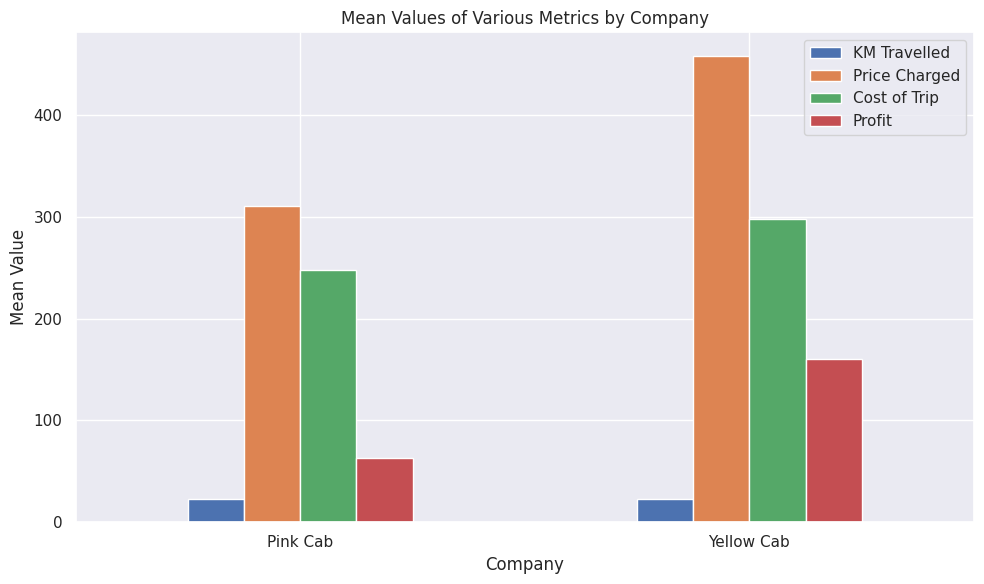

In [ ]:
# Plot the bar chart
comp_agg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Company')
plt.ylabel('Mean Value')
plt.title('Mean Values of Various Metrics by Company')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate total revenue for each cab company
revenue_per_company = cab_data.groupby('Company')['Price Charged'].sum()

# Calculate total cost for each cab company
cost_per_company = cab_data.groupby('Company')['Cost of Trip'].sum()

# Calculate total distance traveled for each cab company
total_distance_per_company = cab_data.groupby('Company')['KM Travelled'].sum()

# Calculate average price charged per kilometer for each cab company
average_price_per_km = cab_data.groupby('Company')['Price Charged'].sum() / cab_data.groupby('Company')['KM Travelled'].sum()

# Calculate total profit for each cab company
total_profit_per_company = cab_data.groupby('Company')['Profit'].sum()

# Calculate total number of rides for each cab company
total_rides_per_company = cab_data.groupby('Company').size()

# Create a DataFrame to store the comparison metrics
company_comparison = pd.DataFrame({
    'Total Revenue': revenue_per_company,
    'Total Cost': cost_per_company,
    'Total Profit': total_profit_per_company,
    'Total Distance Traveled': total_distance_per_company,
    'Average Price Charged per KM': average_price_per_km,
    'Total Number of Rides': total_rides_per_company
})

company_comparison

Total Revenue    Total Cost  Total Profit  \
Company                                                 
Pink Cab     2.632825e+07  2.102092e+07  5.307328e+06   
Yellow Cab   1.258539e+08  8.183351e+07  4.402037e+07   

            Total Distance Traveled  Average Price Charged per KM  \
Company                                                             
Pink Cab                 1911073.11                     13.776685   
Yellow Cab               6199417.47                     20.300921   

            Total Number of Rides  
Company                            
Pink Cab                    84711  
Yellow Cab                 274681

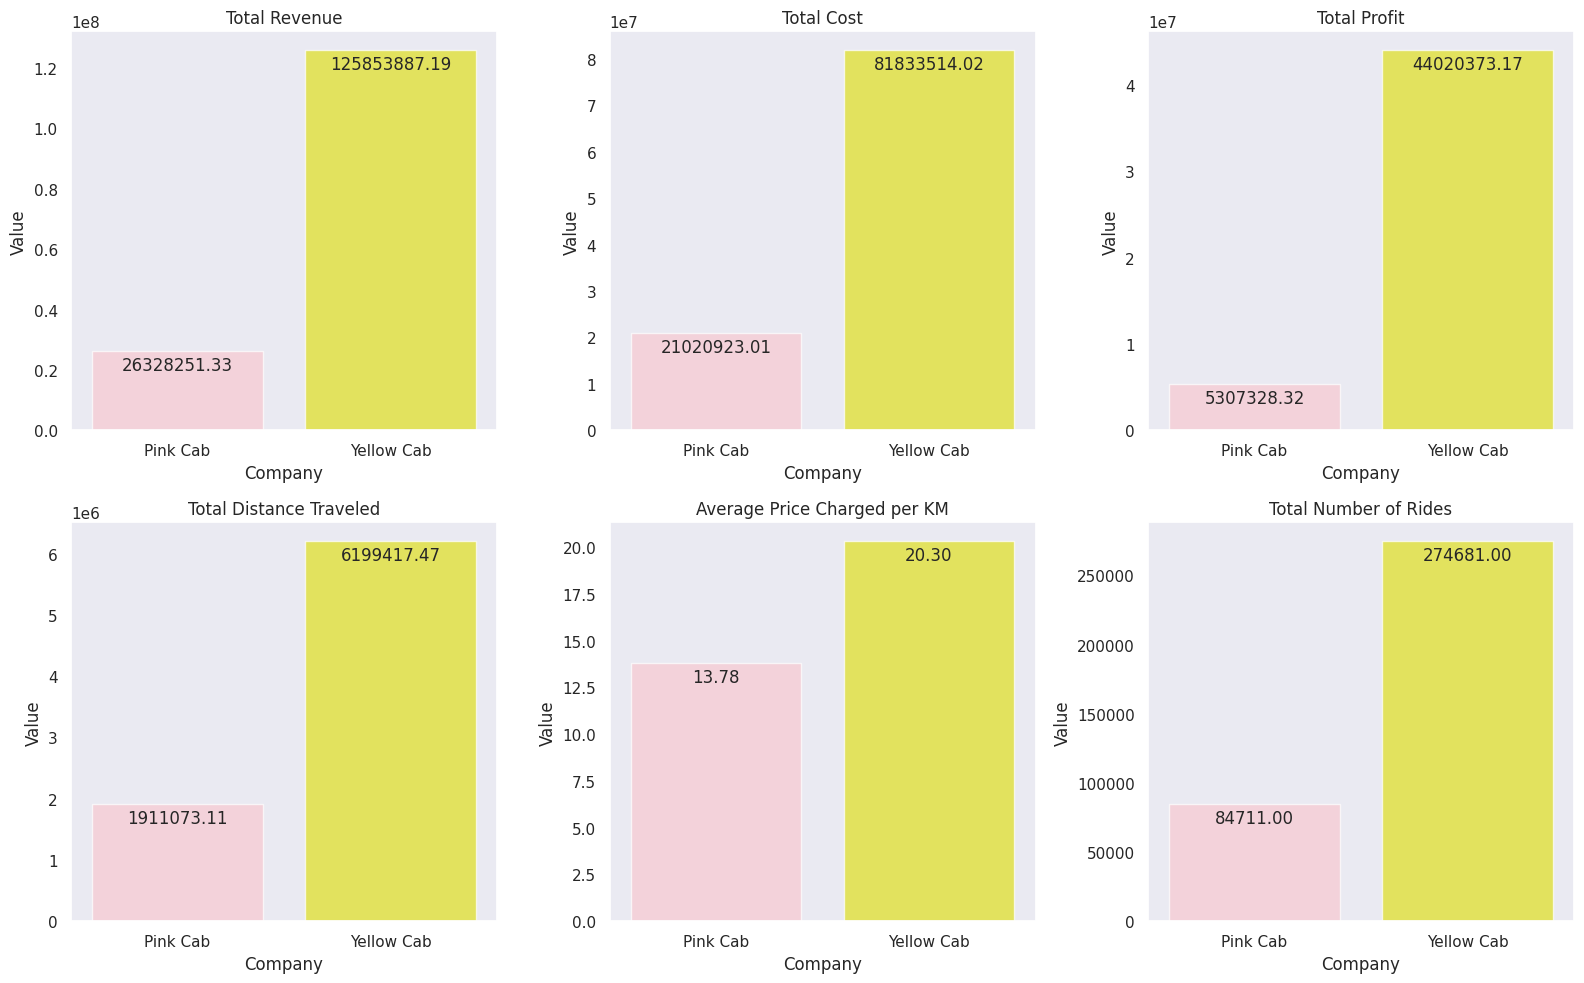

In [ ]:
# Define the metrics to plot
metrics = ['Total Revenue', 'Total Cost', 'Total Profit', 'Total Distance Traveled', 'Average Price Charged per KM', 'Total Number of Rides']

# Create subplots for each metric
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each metric
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(data=company_comparison.reset_index(), x='Company', y=metric, hue='Company', ax=ax, palette=['pink', 'yellow'], alpha=0.7, legend=False)
    ax.set_title(metric)
    ax.set_xlabel('Company')
    ax.set_ylabel('Value')
    ax.grid(axis='y')

    # Add values on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
# Count the number of transactions for each company
transactions_per_company = cab_data.groupby('Company').size()

# Calculate the total number of transactions in the market
total_transactions = transactions_per_company.sum()

# Calculate the market share percentage for each company
market_share_transactions = (transactions_per_company / total_transactions) * 100

# Display the market share based on the total number of transactions for each company
print("Market Share based on Total Number of Transactions:")
print(round(market_share_transactions,2))

Market Share based on Total Number of Transactions:
Company
Pink Cab      23.57
Yellow Cab    76.43
dtype: float64


In [ ]:
# Calculate the total revenue in the market
total_revenue = revenue_per_company.sum()

# Calculate the market share based on revenue for each company
market_share_revenue = (revenue_per_company / total_revenue) * 100

# Calculate the total kilometers traveled in the market
total_kilometers = total_distance_per_company.sum()

# Calculate the market share based on kilometers traveled for each company
market_share_kilometers = (total_distance_per_company / total_kilometers) * 100

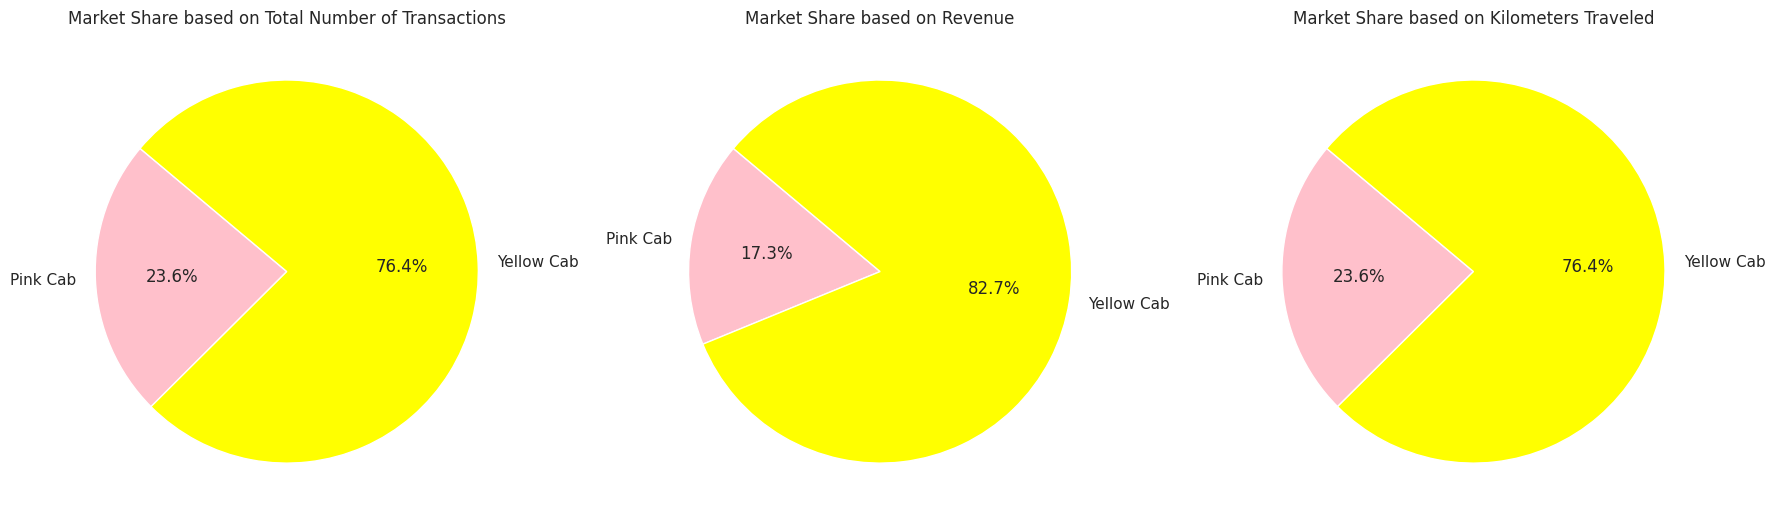

In [ ]:
# Plotting pie charts
plt.figure(figsize=(18, 6))

# Plot market share based on transactions
plt.subplot(1, 3, 1)
plt.pie(market_share_transactions, labels=market_share_transactions.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'yellow'])
plt.title('Market Share based on Total Number of Transactions')

# Plot market share based on revenue
plt.subplot(1, 3, 2)
plt.pie(market_share_revenue, labels=market_share_revenue.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'yellow'])
plt.title('Market Share based on Revenue')

# Plot market share based on kilometers traveled
plt.subplot(1, 3, 3)
plt.pie(market_share_kilometers, labels=market_share_kilometers.index, autopct='%1.1f%%', startangle=140, colors=['pink', 'yellow'])
plt.title('Market Share based on Kilometers Traveled')
plt.tight_layout()
plt.show()

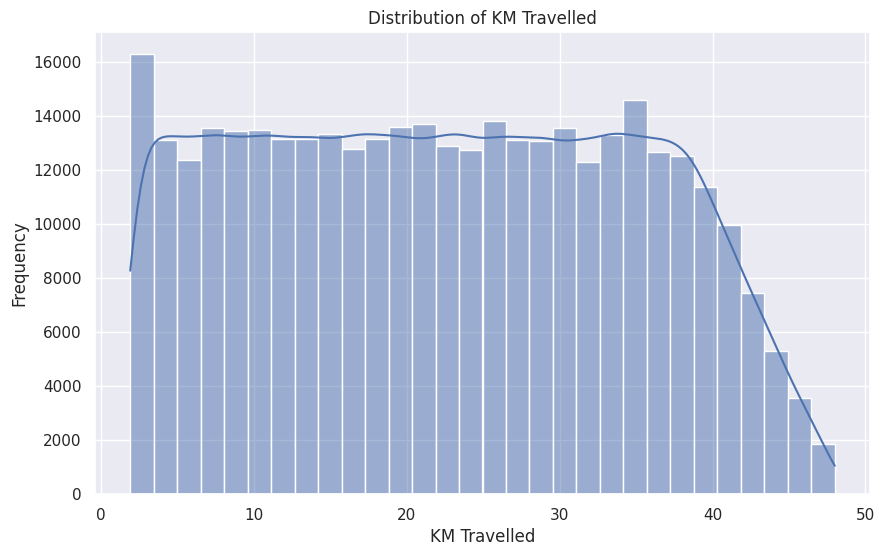

In [ ]:
# Distribution of KM Travelled
plt.figure(figsize=(10, 6))
sns.histplot(cab_data['KM Travelled'], bins=30, kde=True)
plt.xlabel('KM Travelled')
plt.ylabel('Frequency')
plt.title('Distribution of KM Travelled')
plt.show()

From the distribution above we notice an almost uniform ditribution until around 38 km and then declining. This shows us that people take cabs for distances up to 38 km with the same ease. Having a spike on the first 2km shows the popularity of taking cab for very short distances.

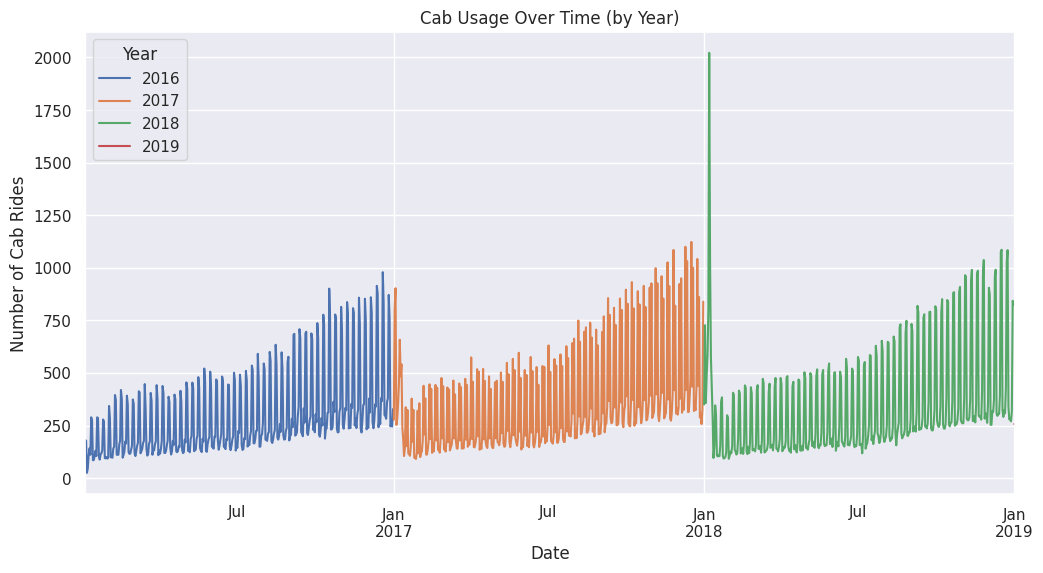

In [ ]:
# Extract year from the 'Date of Travel' column
cab_data['Year'] = cab_data['Date of Travel'].dt.year

# Plot separate time series for each year
plt.figure(figsize=(12, 6))
for year in cab_data['Year'].unique():
    year_data = cab_data[cab_data['Year'] == year].groupby('Date of Travel').size()
    year_data.plot(label=str(year))

plt.xlabel('Date')
plt.ylabel('Number of Cab Rides')
plt.title('Cab Usage Over Time (by Year)')
plt.legend(title='Year', loc='upper left')
plt.grid(True)
plt.show()

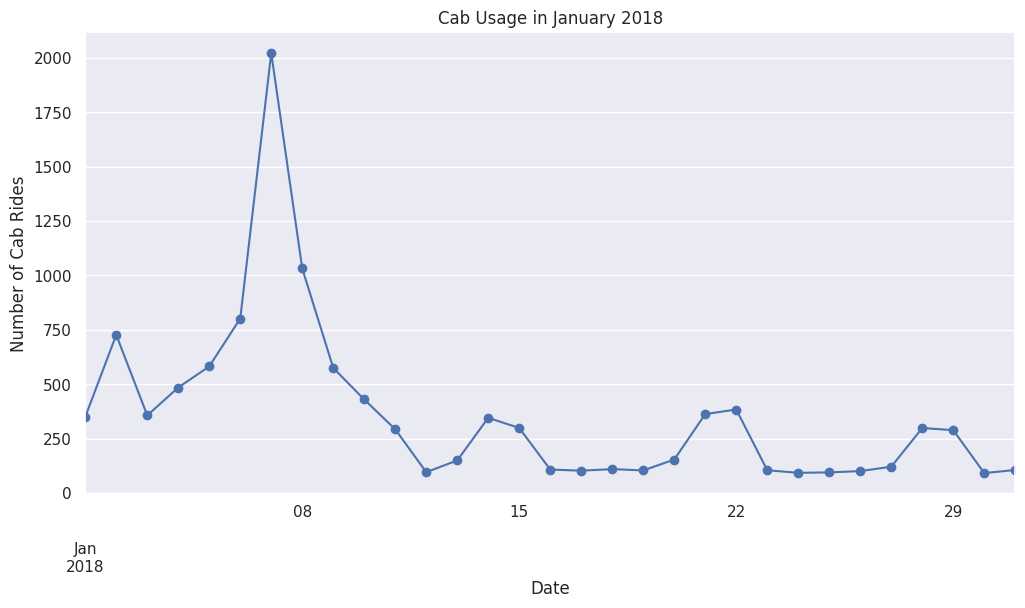

In [ ]:
# Filter data for January 2018
january_2018_data = cab_data[(cab_data['Date of Travel'].dt.year == 2018) & (cab_data['Date of Travel'].dt.month == 1)]

# Plot time series for January 2018
plt.figure(figsize=(12, 6))
january_2018_data.groupby('Date of Travel').size().plot(marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Cab Rides')
plt.title('Cab Usage in January 2018')
plt.grid(True)
plt.show()

In [ ]:
# Identify the date with the highest number of cab rides
max_rides_date = january_2018_data.groupby('Date of Travel').size().idxmax()
max_rides_count = january_2018_data.groupby('Date of Travel').size().max()
print(f"The date with the highest number of cab rides in January 2018 is {max_rides_date} with {max_rides_count} rides.")

The date with the highest number of cab rides in January 2018 is 2018-01-07 00:00:00 with 2022 rides.


We observe that on the 7th of January of 2018 we have a huge spike in our time series plot, indicating that we have the highest usage of cabs (2022 rides) on that specific day for the whole duration of our dataset. We need to search for the reason of that event and for this we will import from kaggle two more datasets, one including the official US holidays of the past years and the second about the weather data recorded during the same duration, in order to shed some more light on our extreme spike.

In [ ]:
od.download('https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021')

Skipping, found downloaded files in "./us-holiday-dates-2004-2021" (use force=True to force download)


In [ ]:
us_holidays_data = pd.read_csv("/content/us-holiday-dates-2004-2021/US Holiday Dates (2004-2021).csv")
us_holidays_data.head()

Date      Holiday    WeekDay  Month  Day  Year
0  2004-07-04  4th of July     Sunday      7    4  2004
1  2005-07-04  4th of July     Monday      7    4  2005
2  2006-07-04  4th of July    Tuesday      7    4  2006
3  2007-07-04  4th of July  Wednesday      7    4  2007
4  2008-07-04  4th of July     Friday      7    4  2008

In [ ]:
# Filter US holidays data for January 7, 2018
jan_7_2018_holidays = us_holidays_data[us_holidays_data['Date'] == '2018-01-07']
jan_7_2018_holidays

Empty DataFrame
Columns: [Date, Holiday, WeekDay, Month, Day, Year]
Index: []

On that specific day we observe that there is no holiday for the US citizens.

Now let's upload the weather dataset.

In [ ]:
od.download('https://www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

Skipping, found downloaded files in "./us-weather-events" (use force=True to force download)


In [ ]:
weather_data = pd.read_csv("/content/us-weather-events/WeatherEvents_Jan2016-Dec2022.csv")
weather_data.head()

EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   
1     W-2  Snow    Light  2016-01-07 04:14:00  2016-01-07 04:54:00   
2     W-3  Snow    Light  2016-01-07 05:54:00  2016-01-07 15:34:00   
3     W-4  Snow    Light  2016-01-08 05:34:00  2016-01-08 05:54:00   
4     W-5  Snow    Light  2016-01-08 13:54:00  2016-01-08 15:54:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0               0.00  US/Mountain        K04V      38.0972    -106.1689   
1               0.00  US/Mountain        K04V      38.0972    -106.1689   
2               0.03  US/Mountain        K04V      38.0972    -106.1689   
3               0.00  US/Mountain        K04V      38.0972    -106.1689   
4               0.00  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  
0  Saguache  Saguache    CO  81149.0  
1  Saguache  Saguache    CO  81149.0  
2  Saguache  Saguache    CO  81149.0  
3  Saguache  Saguache    CO  81149.0  
4  Saguache  Saguache    CO  81149.0

We will search the weather on that specific date for the cities that we have on our cab_data dataset, so we need to fix the cities names accordingly.

In [ ]:
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [ ]:
# Function to process city names
def process_city_name(city):
    if city == 'SILICON VALLEY':
        return city
    elif city == 'NEW YORK NY':
        return 'NEW YORK'
    elif city == 'LOS ANGELES CA':
        return 'LOS ANGELES'
    elif city == 'SAN DIEGO CA':
        return 'SAN DIEGO'
    else:
        return city.split()[0]

# Apply the function to process city names
cab_data['City'] = cab_data['City'].apply(process_city_name)

# Extract unique city names
cab_cities = cab_data['City'].unique()
cab_cities

array(['ATLANTA', 'AUSTIN', 'BOSTON', 'CHICAGO', 'DALLAS', 'DENVER',
       'LOS ANGELES', 'MIAMI', 'NASHVILLE', 'NEW YORK', 'ORANGE',
       'PHOENIX', 'PITTSBURGH', 'SACRAMENTO', 'SAN DIEGO', 'SEATTLE',
       'SILICON VALLEY', 'TUCSON', 'WASHINGTON'], dtype=object)

In [ ]:
# Get unique city names, filtering out NaN values, and sort them alphabetically
weather_cities = sorted(weather_data['City'].dropna().unique())

# Print all unique city names from weather_data DataFrame in alphabetical order
for city in weather_cities:
    print(city)

Abbeville
Aberdeen
Aberdeen Proving Ground
Abilene
Abingdon
Accident
Ada
Addison
Adrian
Afton
Aiken
Akron
Alabaster
Alamogordo
Alamosa
Albany
Albert Lea
Albertville
Albin
Albion
Albuquerque
Alcoa
Alexander City
Alexandria
Algona
Alice
Allentown
Alliance
Alma
Alpena
Alpine
Alta
Alturas
Altus
Alva
Amargosa Valley
Amarillo
Americus
Ames
Andalusia
Anderson
Andrews
Andrews Air Force Base
Angel Fire
Angleton
Angola
Ankeny
Ann Arbor
Annapolis
Antigo
Apalachicola
Appleton
Aransas Pass
Ardmore
Arlington
Artesia
Asheboro
Ashland
Aspen
Athens
Atlanta
Atlantic
Atoka
Atwater
Auburn
Audubon
Augusta
Aulander
Aurora
Austin
Bad Axe
Bagley
Bainbridge
Baker
Baker City
Bakersfield
Bald Mountain
Ball Ground
Baltimore
Bangor
Baraboo
Barksdale AFB
Barnwell
Barre
Bartlesville
Bartow
Bastrop
Batavia
Batesville
Baton Rouge
Battle Creek
Battle Mountain
Baudette
Baxter
Bay City
Bayville
Beach
Beale AFB
Beatrice
Beaufort
Beaumont
Beaver
Beaver Falls
Beaver Island
Bedford
Bedminster
Beeville
Belen
Belgrade
Bellaire

In [ ]:
# Make weather_data cities uppercase
weather_data['City'] = weather_data['City'].str.upper()

In [ ]:
# Convert 'StartTime(UTC)' column to datetime format
weather_data['StartTime(UTC)'] = pd.to_datetime(weather_data['StartTime(UTC)'])

# Filter weather data for January 7, 2018
january_7_weather = weather_data[weather_data['StartTime(UTC)'].dt.date == pd.Timestamp('2018-01-07').date()]

# Filter weather data further to include only the cities present in the cab data
january_7_weather_filtered = january_7_weather[january_7_weather['City'].isin(cab_cities)]

# Display the filtered weather data
january_7_weather_filtered

EventId  Type  Severity      StartTime(UTC)         EndTime(UTC)  \
922113    W-973311  Snow     Light 2018-01-07 01:14:00  2018-01-07 02:51:00   
932220    W-983871  Rain     Light 2018-01-07 19:15:00  2018-01-07 19:35:00   
1347606  W-1421542   Fog    Severe 2018-01-07 14:23:00  2018-01-07 15:15:00   
1347607  W-1421543   Fog  Moderate 2018-01-07 22:52:00  2018-01-07 23:52:00   
1353410  W-1427716  Rain     Light 2018-01-07 22:53:00  2018-01-08 02:22:00   
1590356  W-1678469  Rain     Light 2018-01-07 21:53:00  2018-01-07 23:53:00   
1590357  W-1678470  Rain  Moderate 2018-01-07 23:53:00  2018-01-08 00:51:00   
1817304  W-1917864  Rain     Light 2018-01-07 23:53:00  2018-01-08 00:53:00   
2040252  W-2152932  Rain     Light 2018-01-07 17:35:00  2018-01-07 18:15:00   
2543710  W-2682918  Rain     Light 2018-01-07 22:35:00  2018-01-07 22:55:00   
2543711  W-2682919  Rain     Light 2018-01-07 23:15:00  2018-01-07 23:35:00   
2586216  W-2727733   Fog    Severe 2018-01-07 05:26:00  2018-01-07 06:02:00   
2586217  W-2727734   Fog    Severe 2018-01-07 06:53:00  2018-01-07 07:18:00   
2586218  W-2727735   Fog    Severe 2018-01-07 07:57:00  2018-01-07 08:13:00   
2586219  W-2727736   Fog    Severe 2018-01-07 11:33:00  2018-01-07 17:22:00   
3043822  W-3210896  Rain     Light 2018-01-07 14:03:00  2018-01-07 23:04:00   
3307701  W-3488675  Rain     Light 2018-01-07 10:53:00  2018-01-07 11:53:00   
3307702  W-3488676  Snow     Light 2018-01-07 11:53:00  2018-01-07 12:53:00   
3621830  W-3819813   Fog  Moderate 2018-01-07 17:14:00  2018-01-07 19:47:00   
3621831  W-3819814   Fog  Moderate 2018-01-07 22:47:00  2018-01-08 07:47:00   
3672987  W-3874768   Fog  Moderate 2018-01-07 04:53:00  2018-01-07 05:53:00   
3672988  W-3874769   Fog  Moderate 2018-01-07 11:29:00  2018-01-07 11:37:00   
3672989  W-3874770   Fog    Severe 2018-01-07 11:37:00  2018-01-07 14:14:00   
3672990  W-3874771   Fog  Moderate 2018-01-07 14:14:00  2018-01-07 15:29:00   
3672991  W-3874772   Fog    Severe 2018-01-07 15:29:00  2018-01-07 15:41:00   
3672992  W-3874773   Fog  Moderate 2018-01-07 15:41:00  2018-01-07 16:53:00   
3672993  W-3874774   Fog  Moderate 2018-01-07 17:07:00  2018-01-07 17:28:00   
3672994  W-3874775   Fog    Severe 2018-01-07 17:53:00  2018-01-07 18:16:00   
3829444  W-4039790  Rain     Light 2018-01-07 17:53:00  2018-01-07 18:53:00   
3829445  W-4039791  Rain     Light 2018-01-07 21:30:00  2018-01-07 21:53:00   
3829446  W-4039792  Rain     Light 2018-01-07 22:53:00  2018-01-08 01:53:00   
3898296  W-4112212   Fog  Moderate 2018-01-07 00:48:00  2018-01-07 00:53:00   
3898297  W-4112213   Fog  Moderate 2018-01-07 00:55:00  2018-01-07 02:53:00   
3898298  W-4112214   Fog  Moderate 2018-01-07 10:53:00  2018-01-07 11:53:00   
3898299  W-4112215   Fog  Moderate 2018-01-07 13:36:00  2018-01-07 13:40:00   
3898300  W-4112216   Fog    Severe 2018-01-07 13:40:00  2018-01-07 14:29:00   
4421013  W-4662001  Rain     Light 2018-01-07 13:53:00  2018-01-07 16:53:00   
4421014  W-4662002  Rain     Light 2018-01-07 23:53:00  2018-01-08 07:53:00   
4795489  W-5056796  Snow     Light 2018-01-07 10:53:00  2018-01-07 11:53:00   
4795490  W-5056797  Rain     Light 2018-01-07 19:37:00  2018-01-07 20:21:00   
4795491  W-5056798  Rain     Light 2018-01-07 22:53:00  2018-01-07 23:53:00   
5020686  W-5293887   Fog  Moderate 2018-01-07 17:46:00  2018-01-07 19:53:00   
5020687  W-5293888   Fog  Moderate 2018-01-07 20:53:00  2018-01-08 01:53:00   
5532130  W-5833766   Fog    Severe 2018-01-07 02:51:00  2018-01-07 02:53:00   
5532131  W-5833767   Fog  Moderate 2018-01-07 08:53:00  2018-01-07 09:53:00   
5532132  W-5833768   Fog  Moderate 2018-01-07 15:53:00  2018-01-07 17:53:00   
5769028  W-6082876  Rain     Light 2018-01-07 00:53:00  2018-01-07 01:34:00   
5769029  W-6082877  Rain     Light 2018-01-07 13:53:00  2018-01-07 16:53:00   
5769030  W-6082878  Rain     Light 2018-01-07 21:53:00  2018-01-08 05:53:00   
7032599  W-7413602   Fog    Severe 2018-01-07 13:41:00  2018-

We observe moderate to severe events on that specific day (Sunday, 7th of January 2018), on the majority of the cities that we have in our original dataset. Upon further research it came to our knowledge that on that first week of 2018 there was an extreme weather phenomenon that took place in the USA, which caused the unusual high usage of cab services.

https://en.m.wikipedia.org/wiki/January_2018_North_American_blizzard
https://en.m.wikipedia.org/wiki/December_2017%E2%80%93January_2018_North_American_cold_wave

"The first week of 2018 became the coldest first week on record of any year in New York City, Pittsburgh, Raleigh, Charlotte, Tallahassee, Detroit and Cincinnati. New Orleans tied their coldest first week of the year that was previously set in 1970. The second coldest first week of the year was set in Jacksonville, Cleveland, Indianapolis, and Boston. Dulles International Airport saw their longest cold wave on record,while Bridgeport, Connecticut saw its longest streak of subfreezing temperatures.

The storm received various unofficial names, such as Winter Storm Grayson, Blizzard of 2018 and Storm Brody. The storm was also dubbed a "historic bomb cyclone"."

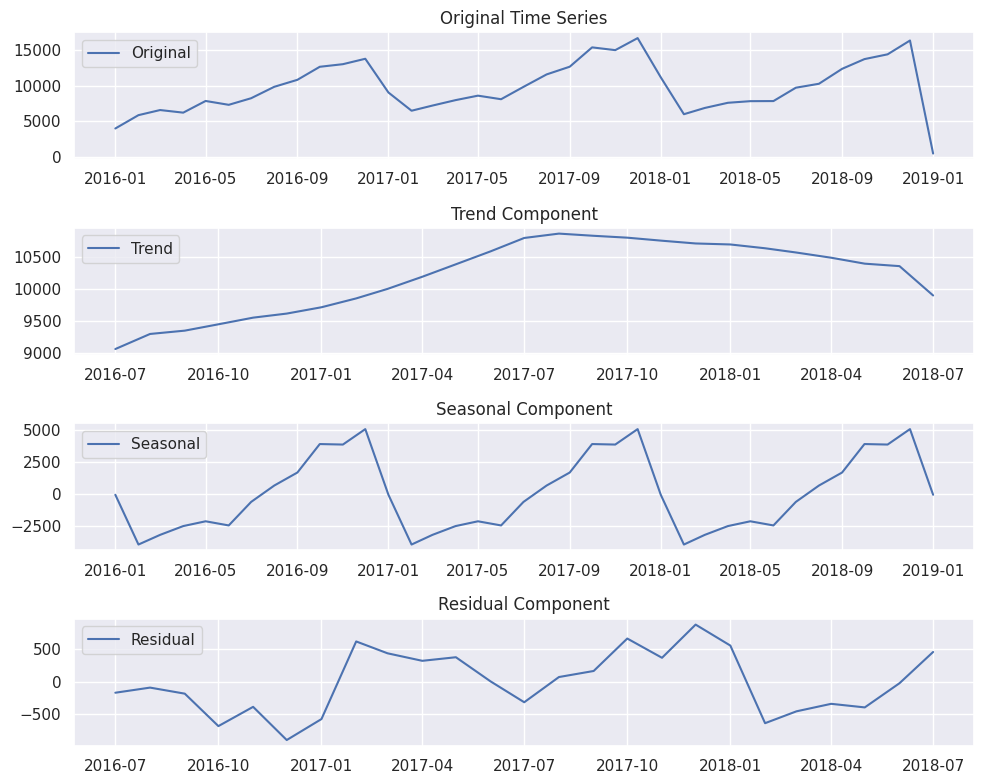

In [ ]:
# Extract month from 'Date of Travel'
cab_data['Month'] = cab_data['Date of Travel'].dt.to_period('M')

# Aggregate data by month and count the number of rides
monthly_rides = cab_data.groupby('Month').size()

# Convert PeriodIndex to DatetimeIndex
monthly_rides.index = pd.to_datetime(monthly_rides.index.to_timestamp())

# Perform seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(monthly_rides, model='additive')

# Plot the decomposition
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_rides, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')
plt.tight_layout()
plt.show()

- The increasing trend in ride demand up to mid-2017 suggests a growing popularity or increasing usage of cab services over time.
- The presence of a clear seasonal pattern indicates that ride demand exhibits recurring fluctuations, possibly influenced by factors such as seasonal variations in weather, holidays, or events.
- The minor decrease in the trend towards the end of the period may indicate a slight slowdown or stabilization in ride demand after the initial growth phase.

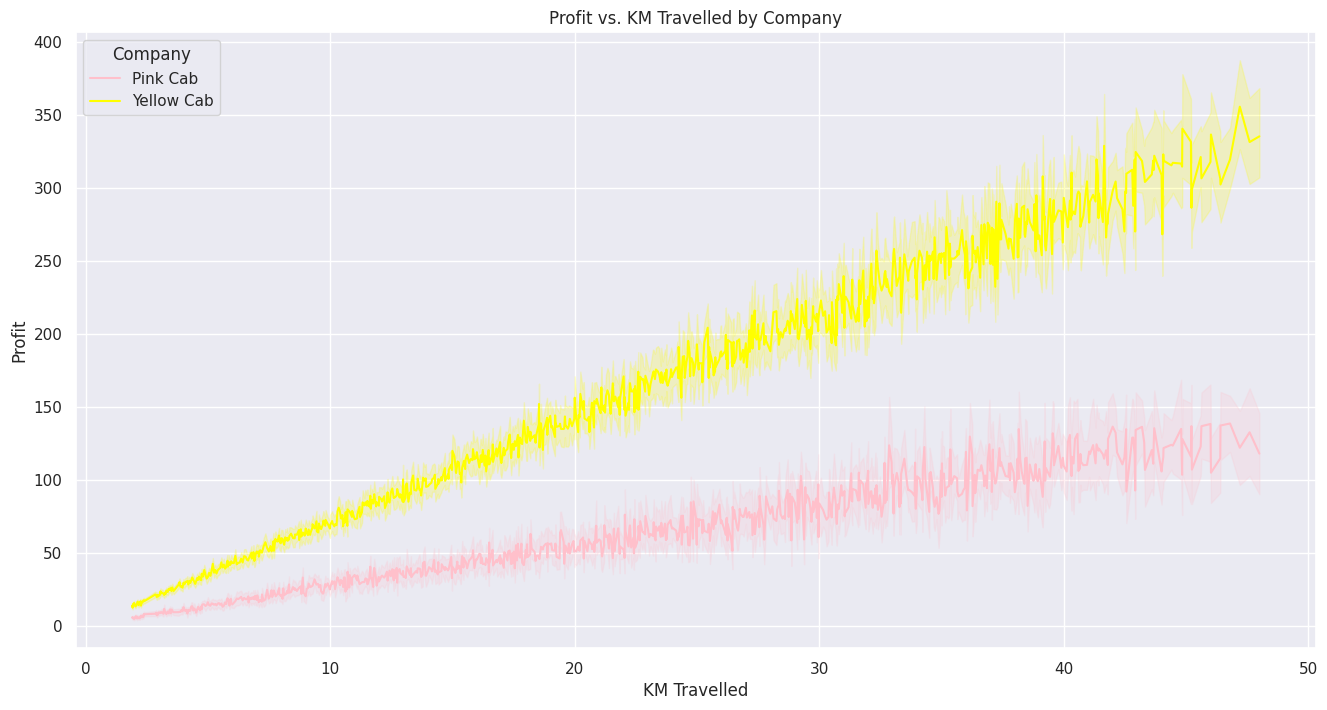

In [ ]:
# Plot profit vs. distance traveled, with separate lines for each company
plt.figure(figsize=(16, 8))
sns.lineplot(data=cab_data, x='KM Travelled', y='Profit', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('KM Travelled')
plt.ylabel('Profit')
plt.title('Profit vs. KM Travelled by Company')
plt.show()

- The Yellow Cab line appears consistently above the Pink Cab line, indicating that, on average, Yellow Cab tends to generate higher profits per kilometer traveled compared to Pink Cab.
- The fluctuating nature of the lines suggests variability in profit across different distances traveled, which could be influenced by factors such as trip duration, fare rates, operational efficiency, and customer demand.

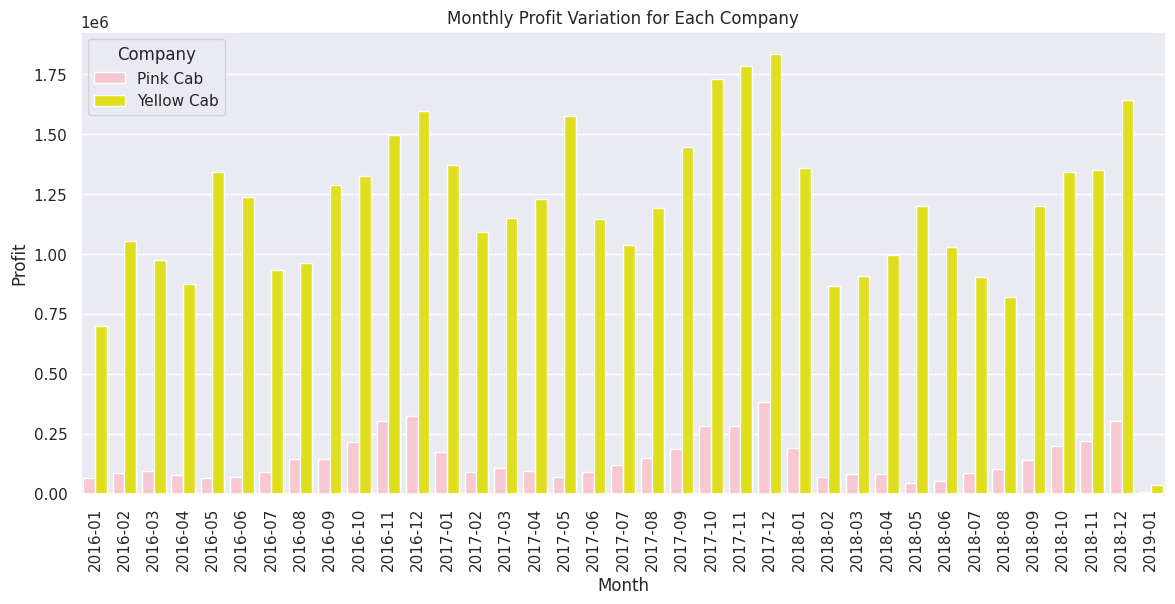

In [ ]:
# Plot the monthly profit variation for each company using a bar plot
plt.figure(figsize=(14, 6))
sns.barplot(data=cab_data, x='Month', y='Profit', hue='Company', palette=['pink', 'yellow'], errorbar=None, estimator=sum)
plt.xlabel('Month')
plt.ylabel('Profit')
plt.title('Monthly Profit Variation for Each Company')
plt.tick_params(axis='x', rotation=90)
plt.show()

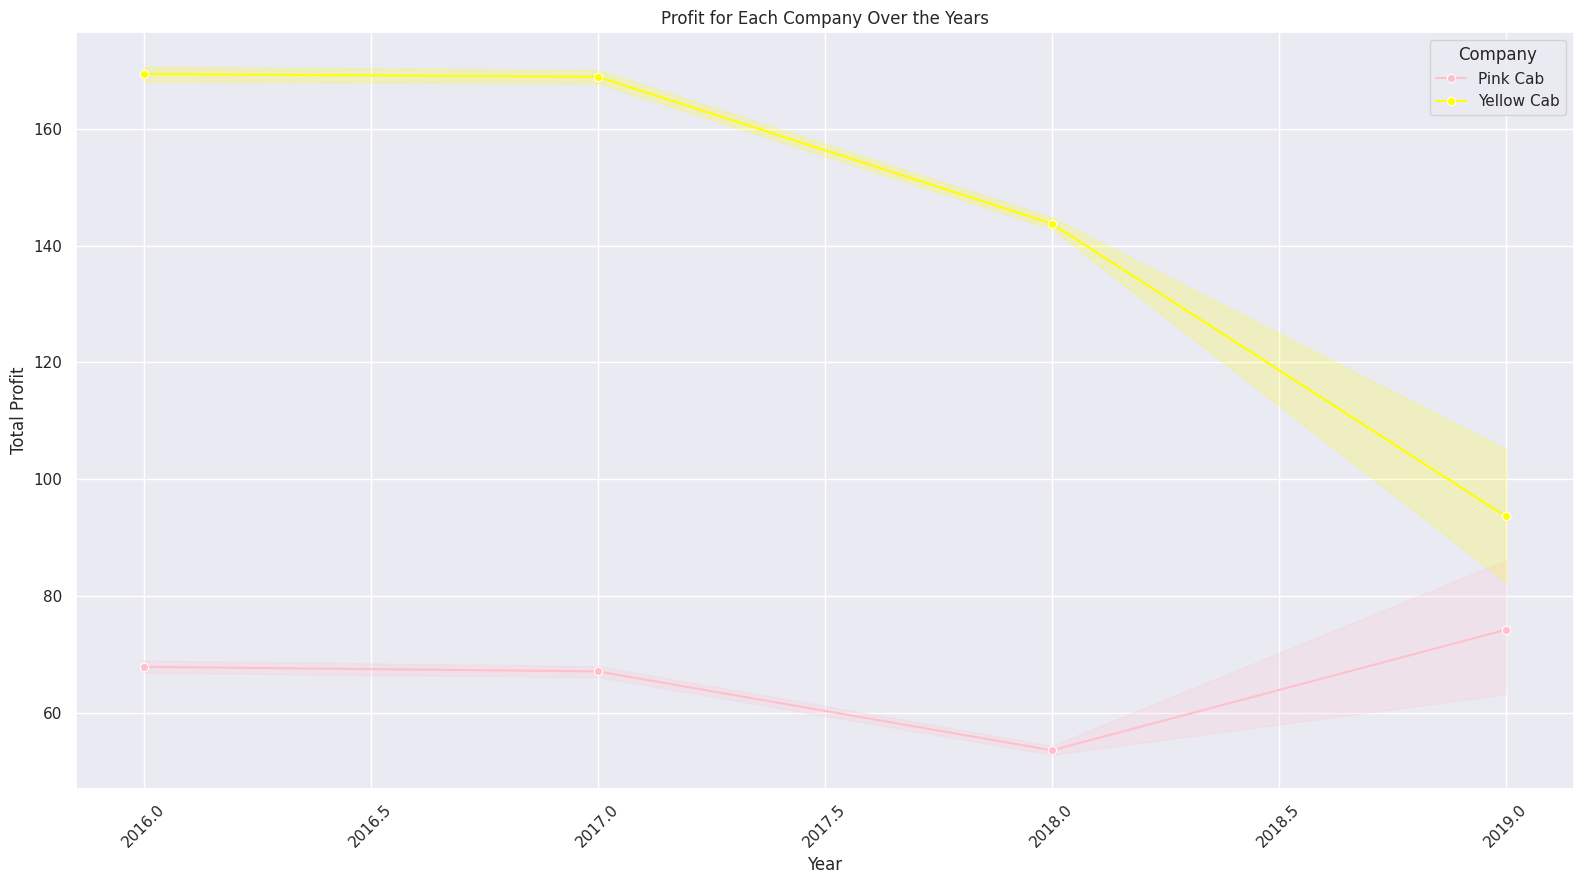

In [ ]:
# Extract year from the 'Date of Travel' column
cab_data['Year'] = cab_data['Date of Travel'].dt.year

plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", palette=['pink', 'yellow'], data=cab_data, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Profit for Each Company Over the Years')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Company')
plt.tight_layout()
plt.show()

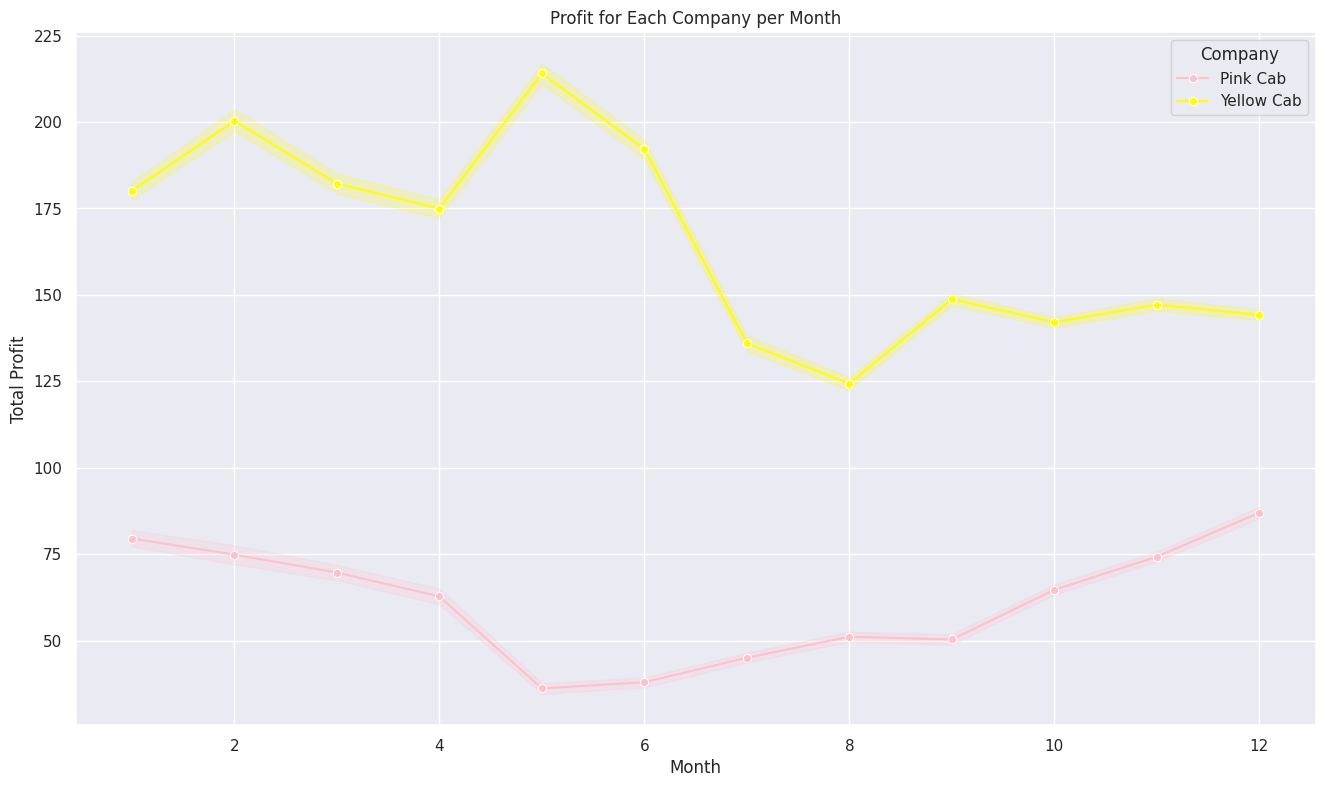

In [ ]:
cab_data['Month'] = cab_data['Date of Travel'].dt.month

plt.figure(figsize = (16, 9))
sns.lineplot(x="Month", y="Profit", hue="Company", palette=['pink', 'yellow'], data=cab_data, marker='o')
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.title("Profit for Each Company per Month")
plt.show()

- Over the Years:

Yellow Cab initially had better profitability compared to Pink Cab, as indicated by the higher profit levels in the earlier years.
However, Yellow Cab's profitability shows a declining trend over time.
On the other hand, Pink Cab's profitability seems to be stable and gradually increasing over the years.

- Per Month:

The monthly profitability trends also suggest a similar pattern, with Yellow Cab's profit declining over the months and Pink Cab's profit showing a slight upward trend. Most profitable month for Yellow Cab is May, and for Pink Cab is December.

Further analysis is required to delve into the factors contributing to these trends.

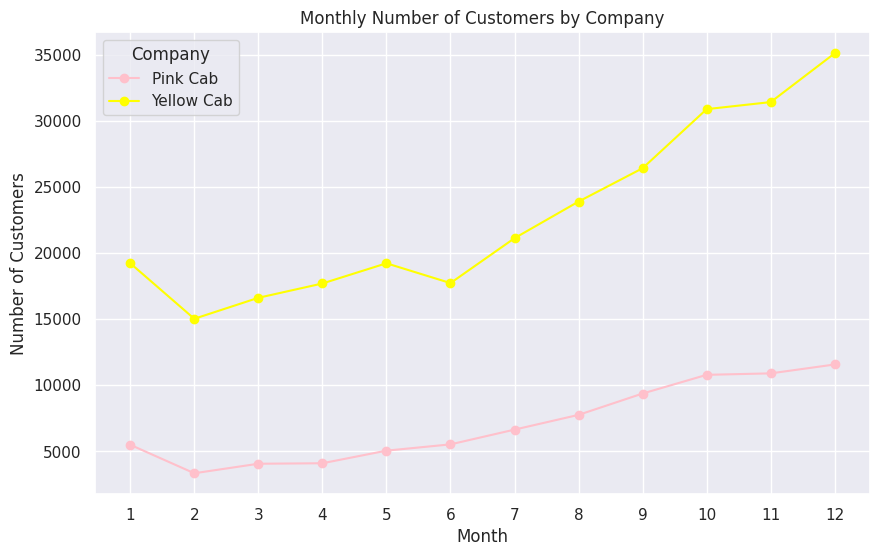

In [ ]:
# Visualize seasonal trends on number of customers per month for each company
monthly_customers = cab_data.groupby(['Month', 'Company']).size().unstack()
monthly_customers.plot(kind='line', figsize=(10, 6), marker='o', color=['pink', 'yellow'])
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Monthly Number of Customers by Company')
plt.xticks(range(1, 13))
plt.legend(title='Company')
plt.show()

- Yellow Cab's Increasing Customer Trend: The plot indicates that Yellow Cab experiences an increasing trend in the number of customers over the months. This suggests that Yellow Cab is attracting more customers over time, which could be due to various factors such as brand recognition, service quality, etc.

- Pink Cab's Steady Customer Growth: On the other hand, Pink Cab shows a relatively steady increase in the number of customers month by month. This suggests that Pink Cab's customer base is growing steadily over time, albeit at a slower rate compared to Yellow Cab.

- Market Dynamics: The differing trends in customer growth between Yellow Cab and Pink Cab could reflect differences in market strategies, customer targeting, or service offerings. Yellow Cab's aggressive growth trend might indicate a strong marketing push aimed at capturing a larger market share, while Pink Cab's more stable growth could signify a focus on customer retention and service quality.

- Long-Term Sustainability: While Yellow Cab's rapid growth may seem promising in the short term, sustaining such growth over the long term could pose challenges in terms of maintaining service quality, managing operational costs, and retaining customers. Pink Cab's steady growth, although slower, may indicate a more sustainable and stable business model.

In [ ]:
# Calculate total revenue and number of rides for each city
city_metrics = cab_data.groupby('City').agg({
    'Price Charged': 'sum',
    'Transaction ID': 'count'
})
city_metrics = city_metrics.rename(columns={'Transaction ID': 'Total Number of Rides'})

# Sort cities by total revenue
city_metrics = city_metrics.sort_values(by='Price Charged', ascending=False)

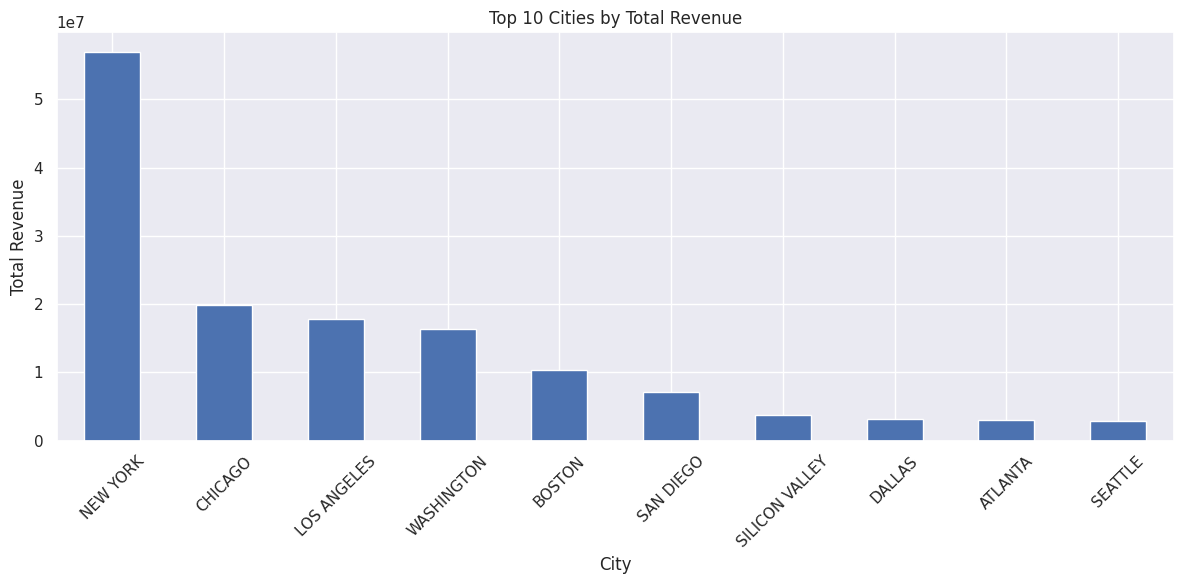

In [ ]:
# Bar chart for total revenue
plt.figure(figsize=(12, 6))
top_revenue_cities = city_metrics.head(10)
top_revenue_cities['Price Charged'].plot(kind='bar')
plt.title('Top 10 Cities by Total Revenue')
plt.ylabel('Total Revenue')
plt.xlabel('City')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

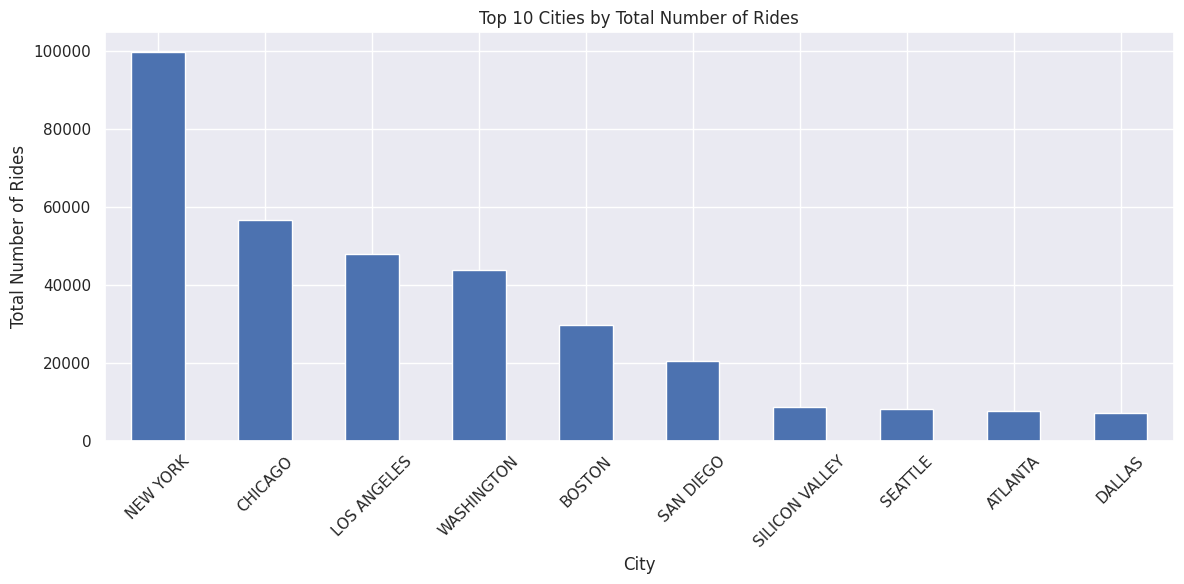

In [ ]:
# Bar chart for total number of rides
plt.figure(figsize=(12, 6))
top_rides_cities = city_metrics.sort_values(by='Total Number of Rides', ascending=False).head(10)
top_rides_cities['Total Number of Rides'].plot(kind='bar')
plt.title('Top 10 Cities by Total Number of Rides')
plt.ylabel('Total Number of Rides')
plt.xlabel('City')
plt.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

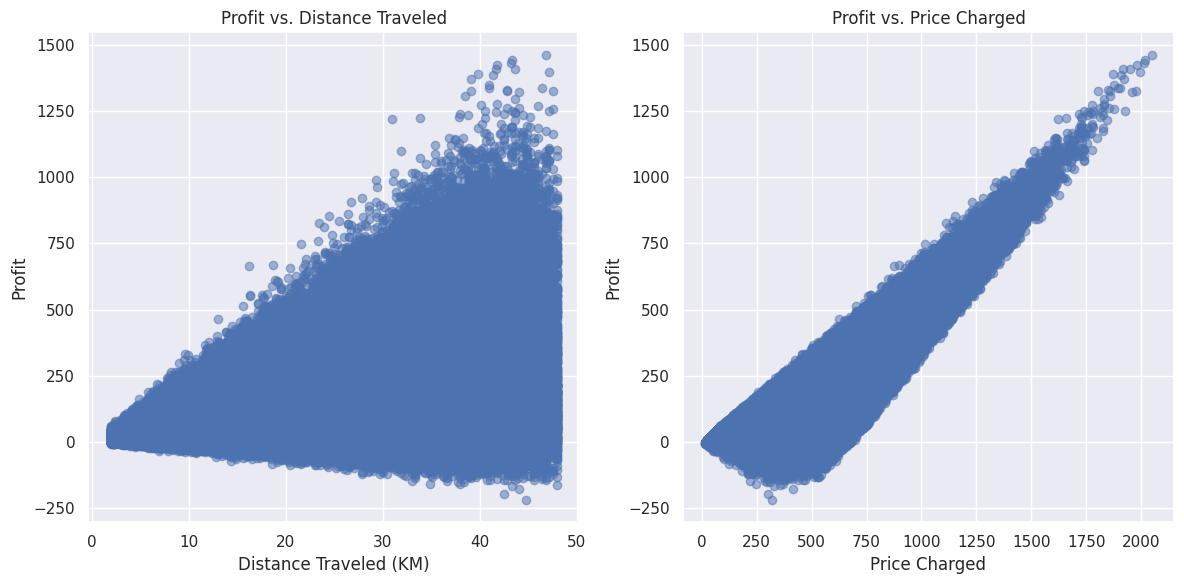

In [ ]:
# Analyze factors affecting profit margins
plt.figure(figsize=(12, 6))

# Scatter plot of profit vs. distance traveled
plt.subplot(1, 2, 1)
plt.scatter(cab_data['KM Travelled'], cab_data['Profit'], alpha=0.5)
plt.title('Profit vs. Distance Traveled')
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Profit')

# Scatter plot of profit vs. price charged
plt.subplot(1, 2, 2)
plt.scatter(cab_data['Price Charged'], cab_data['Profit'], alpha=0.5)
plt.title('Profit vs. Price Charged')
plt.xlabel('Price Charged')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

We notice some negative profit margins in the general plot of Profit/Distance Travelled for both companies. Let's check the plots for each company separately.

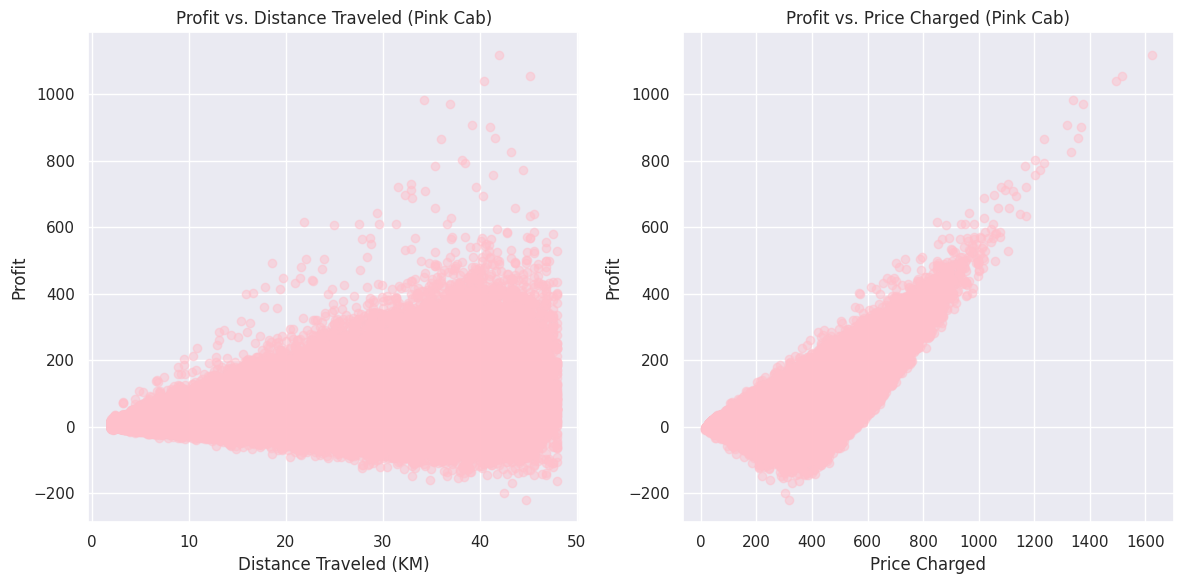

In [ ]:
# Analyze factors affecting profit margins for each company
plt.figure(figsize=(12, 6))

# Scatter plot of profit vs. distance traveled for Pink Cab
plt.subplot(1, 2, 1)
pink_cab_data = cab_data[cab_data['Company'] == 'Pink Cab']
plt.scatter(pink_cab_data['KM Travelled'], pink_cab_data['Profit'], alpha=0.5, color='pink')
plt.title('Profit vs. Distance Traveled (Pink Cab)')
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Profit')

# Scatter plot of profit vs. price charged for Pink Cab
plt.subplot(1, 2, 2)
plt.scatter(pink_cab_data['Price Charged'], pink_cab_data['Profit'], alpha=0.5, color='pink')
plt.title('Profit vs. Price Charged (Pink Cab)')
plt.xlabel('Price Charged')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for Pink Cab with profit below zero
pink_cab_negative_profit_count = cab_data[(cab_data['Company'] == 'Pink Cab') & (cab_data['Profit'] < 0)].shape[0]
print("Number of instances with profit below zero for Pink Cab:", pink_cab_negative_profit_count)

# Total number of instances for Pink Cab
pink_cab_total_instances = cab_data[cab_data['Company'] == 'Pink Cab'].shape[0]

# Calculate the percentage of instances with profit below zero for Pink Cab
pink_cab_negative_profit_percentage = (pink_cab_negative_profit_count / pink_cab_total_instances) * 100
print("\nPercentage of instances with profit below zero for Pink Cab:", round(pink_cab_negative_profit_percentage,2), "%")

Number of instances with profit below zero for Pink Cab: 11129

Percentage of instances with profit below zero for Pink Cab: 13.14 %


In [ ]:
# Filter data for Pink Cab with profit below zero per year
pink_cab_negative_profit_per_year = cab_data[(cab_data['Company'] == 'Pink Cab') & (cab_data['Profit'] < 0)].groupby('Year').size()

# Display the number of instances with profit below zero per year for Pink Cab
print("Number of instances with profit below zero per year for Pink Cab:")
print(pink_cab_negative_profit_per_year)

Number of instances with profit below zero per year for Pink Cab:
Year
2016    3232
2017    4362
2018    3535
dtype: int64


In [ ]:
# Calculate the total number of instances per year for Pink Cab
pink_cab_total_instances_per_year = cab_data[cab_data['Company'] == 'Pink Cab'].groupby('Year').size()

# Calculate the percentage of instances with profit below zero per year for Pink Cab
pink_cab_negative_profit_percentage_per_year = (pink_cab_negative_profit_per_year / pink_cab_total_instances_per_year) * 100

# Display the percentage of instances with profit below zero per year for Pink Cab
print("Percentage of instances with profit below zero per year for Pink Cab:")
print(round(pink_cab_negative_profit_percentage_per_year,2))

Percentage of instances with profit below zero per year for Pink Cab:
Year
2016    13.01
2017    14.40
2018    12.00
2019      NaN
dtype: float64


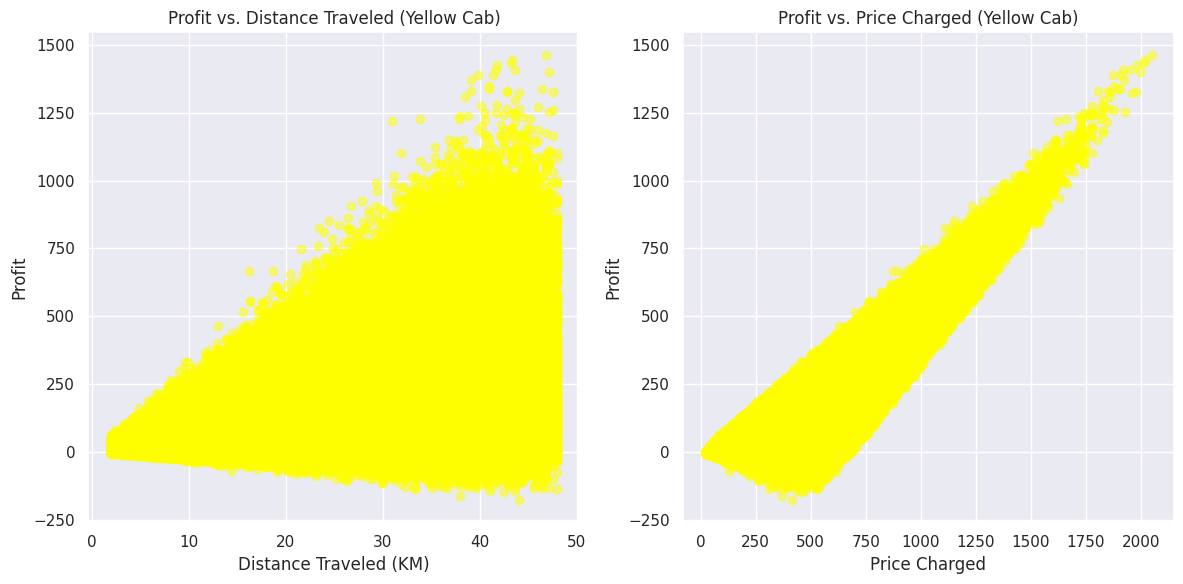

In [ ]:
plt.figure(figsize=(12, 6))

# Scatter plot of profit vs. distance traveled for Yellow Cab
plt.subplot(1, 2, 1)
yellow_cab_data = cab_data[cab_data['Company'] == 'Yellow Cab']
plt.scatter(yellow_cab_data['KM Travelled'], yellow_cab_data['Profit'], alpha=0.5, color='yellow')
plt.title('Profit vs. Distance Traveled (Yellow Cab)')
plt.xlabel('Distance Traveled (KM)')
plt.ylabel('Profit')

# Scatter plot of profit vs. price charged for Yellow Cab
plt.subplot(1, 2, 2)
plt.scatter(yellow_cab_data['Price Charged'], yellow_cab_data['Profit'], alpha=0.5, color='yellow')
plt.title('Profit vs. Price Charged (Yellow Cab)')
plt.xlabel('Price Charged')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

In [ ]:
# Filter data for Yellow Cab with profit below zero
yellow_cab_negative_profit_count = cab_data[(cab_data['Company'] == 'Yellow Cab') & (cab_data['Profit'] < 0)].shape[0]
print("Number of instances with profit below zero for Yellow Cab:", yellow_cab_negative_profit_count)

# Total number of instances for Yellow Cab
yellow_cab_total_instances = cab_data[cab_data['Company'] == 'Yellow Cab'].shape[0]

# Calculate the percentage of instances with profit below zero for Yellow Cab
yellow_cab_negative_profit_percentage = (yellow_cab_negative_profit_count / yellow_cab_total_instances) * 100

print("\nPercentage of instances with profit below zero for Yellow Cab:", round(yellow_cab_negative_profit_percentage,2), "%")

Number of instances with profit below zero for Yellow Cab: 13690

Percentage of instances with profit below zero for Yellow Cab: 4.98 %


In [ ]:
# Filter data for Yellow Cab with profit below zero per year
yellow_cab_negative_profit_per_year = cab_data[(cab_data['Company'] == 'Yellow Cab') & (cab_data['Profit'] < 0)].groupby('Year').size()

# Display the number of instances with profit below zero per year for Yellow Cab
print("Number of instances with profit below zero per year for Yellow Cab:")
print(yellow_cab_negative_profit_per_year)

Number of instances with profit below zero per year for Yellow Cab:
Year
2016    3879
2017    5071
2018    4704
2019      36
dtype: int64


In [ ]:
# Calculate the total number of instances per year for Yellow Cab
yellow_cab_total_instances_per_year = cab_data[cab_data['Company'] == 'Yellow Cab'].groupby('Year').size()

# Calculate the percentage of instances with profit below zero per year for Yellow Cab
yellow_cab_negative_profit_percentage_per_year = (yellow_cab_negative_profit_per_year / yellow_cab_total_instances_per_year) * 100

# Display the percentage of instances with profit below zero per year for Yellow Cab
print("Percentage of instances with profit below zero per year for Yellow Cab:")
print(round(yellow_cab_negative_profit_percentage_per_year,2))

Percentage of instances with profit below zero per year for Yellow Cab:
Year
2016    4.77
2017    5.16
2018    4.97
2019    9.02
dtype: float64


The presence of data points with negative profit values suggests instances where the cost of the trip exceeded the revenue generated (especially for distances bigger than 20 km). This could occur due to various reasons such as:

- High Operational Costs: If the operational costs of providing the cab service, including fuel, maintenance, and driver wages, are high relative to the revenue earned from the trip, it could result in negative profit margins.

- Inefficient Pricing: In cases where the price charged for the trip is not sufficient to cover the cost of providing the service, negative profit margins may occur. This could happen if pricing strategies are not effectively calibrated to reflect operational expenses.

- Unforeseen Circumstances: Unexpected events during the trip, such as traffic delays, route deviations, or vehicle breakdowns, could increase the cost of the trip beyond what was initially estimated, leading to negative profit margins.

Furthermore:
- There are 11,129 instances where the profit is below zero, accounting for approximately 13.14% of the total instances for Pink Cab.
This indicates that a significant portion of Pink Cab's trips result in negative profitability, which could be a cause for concern. It suggests that the company may be incurring losses on a substantial number of trips, which could impact its overall financial performance.

- There are 13,690 instances where the profit is below zero, which represents around 4.98% of the total instances for Yellow Cab.
While Yellow Cab also experiences instances of negative profitability, the percentage is lower compared to Pink Cab. This suggests that Yellow Cab may have better cost management practices or pricing strategies in place, resulting in a lower proportion of unprofitable trips.

## Load Dataset (City)

In [ ]:
city_data = pd.read_csv("/content/City.csv")
city_data.head()

City   Population      Users
0     NEW YORK NY   8,405,837    302,149 
1      CHICAGO IL   1,955,130    164,468 
2  LOS ANGELES CA   1,595,037    144,132 
3        MIAMI FL   1,339,155     17,675 
4  SILICON VALLEY   1,177,609     27,247

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
# Remove commas and spaces from the 'Population' column
city_data['Population'] = city_data['Population'].str.replace(',', '').str.strip()

# Convert the 'Population' column to integer type
city_data['Population'] = city_data['Population'].astype(int)

# Remove commas and spaces from the 'Users' column
city_data['Users'] = city_data['Users'].str.replace(',', '').str.strip()
city_data['Users'] = city_data['Users'].astype(int)

In [ ]:
city_data.describe()

Population          Users
count  2.000000e+01      20.000000
mean   1.231592e+06   64520.650000
std    1.740127e+06   83499.375289
min    2.489680e+05    3643.000000
25%    6.086372e+05   11633.250000
50%    7.845590e+05   23429.000000
75%    1.067041e+06   91766.000000
max    8.405837e+06  302149.000000

In [ ]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [ ]:
city_data.duplicated().sum()

0

We have two columns "Population" with the number of people for each city and "Users" with the number of cab users per city. We will make another column with a ratio of users per population to observe how popular are the cab services in each city.

In [ ]:
city_data['User_ratio'] = round(city_data['Users']/city_data['Population']*100, 2)

In [ ]:
city_data['User_ratio']

0      3.59
1      8.41
2      9.04
3      1.32
4      2.31
5      1.26
6      7.30
7      0.65
8      2.35
9      3.03
10     1.65
11     2.14
12     3.73
13     0.90
14    33.93
15     1.29
16     0.67
17    30.32
18     2.83
19    32.14
Name: User_ratio, dtype: float64

In [ ]:
city_data.head(20).sort_values(by='User_ratio', ascending=False)

City  Population   Users  User_ratio
14  SAN FRANCISCO CA      629591  213609       33.93
19         BOSTON MA      248968   80021       32.14
17     WASHINGTON DC      418859  127001       30.32
2     LOS ANGELES CA     1595037  144132        9.04
1         CHICAGO IL     1955130  164468        8.41
6       SAN DIEGO CA      959307   69995        7.30
12        SEATTLE WA      671238   25063        3.73
0        NEW YORK NY     8405837  302149        3.59
9         ATLANTA GA      814885   24701        3.03
18      NASHVILLE TN      327225    9270        2.83
8          DALLAS TX      942908   22157        2.35
4     SILICON VALLEY     1177609   27247        2.31
11         AUSTIN TX      698371   14978        2.14
10         DENVER CO      754233   12421        1.65
3           MIAMI FL     1339155   17675        1.32
15     SACRAMENTO CA      545776    7044        1.29
5      ORANGE COUNTY     1030185   12994        1.26
13         TUCSON AZ      631442    5712        0.90
16     PITTSBURGH PA      542085    3643        0.67
7         PHOENIX AZ      943999    6133        0.65

We observe that cities like San Francisco, Boston and Washington, have higher levels of taxi users which can be attributed to several factors:

- Population Density: These cities are known for their relatively high population densities, which typically lead to higher demand for transportation services, including taxis. More people living in a compact area often results in increased reliance on taxis for commuting, running errands, and leisure activities.

- Tourism: Washington, San Francisco, and Boston are major tourist destinations, attracting millions of visitors each year. Tourists often rely on taxis to navigate unfamiliar cities and to reach popular attractions, hotels, and restaurants.

- Business and Events: These cities are also hubs for business, conferences, and events, leading to increased demand for transportation services, including taxis, especially during peak business hours and event times.

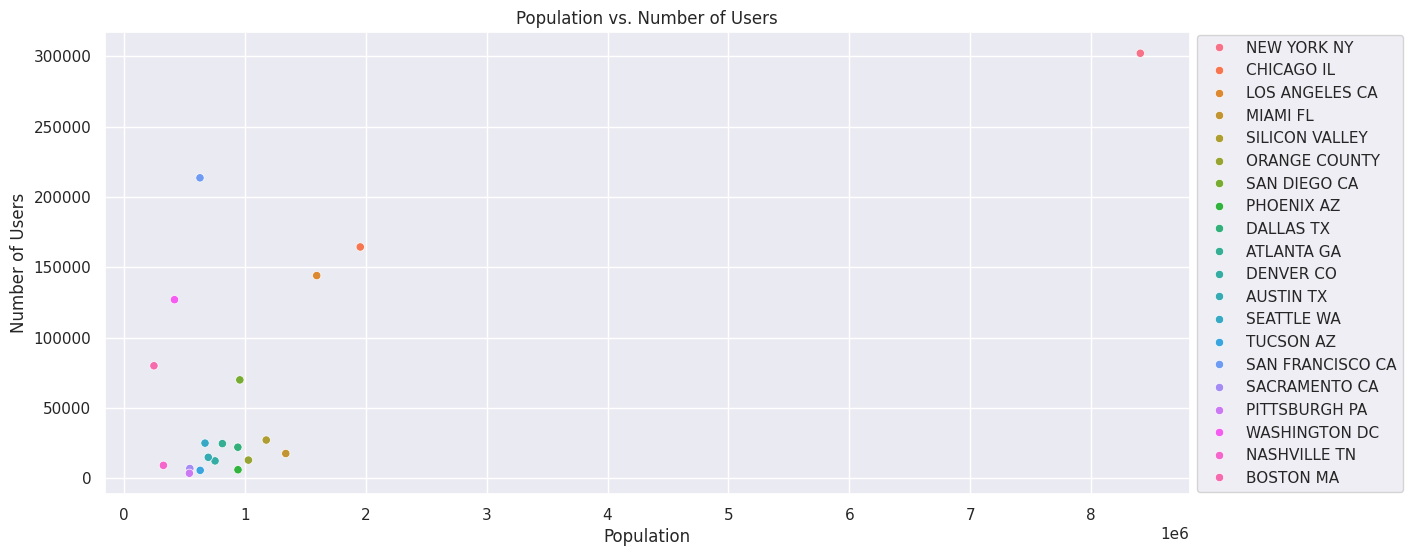

In [ ]:
# Population vs. Number of Users
plt.figure(figsize=(14, 6))
sns.scatterplot(data=city_data, x='Population', y='Users', hue='City')
plt.title('Population vs. Number of Users')
plt.xlabel('Population')
plt.ylabel('Number of Users')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

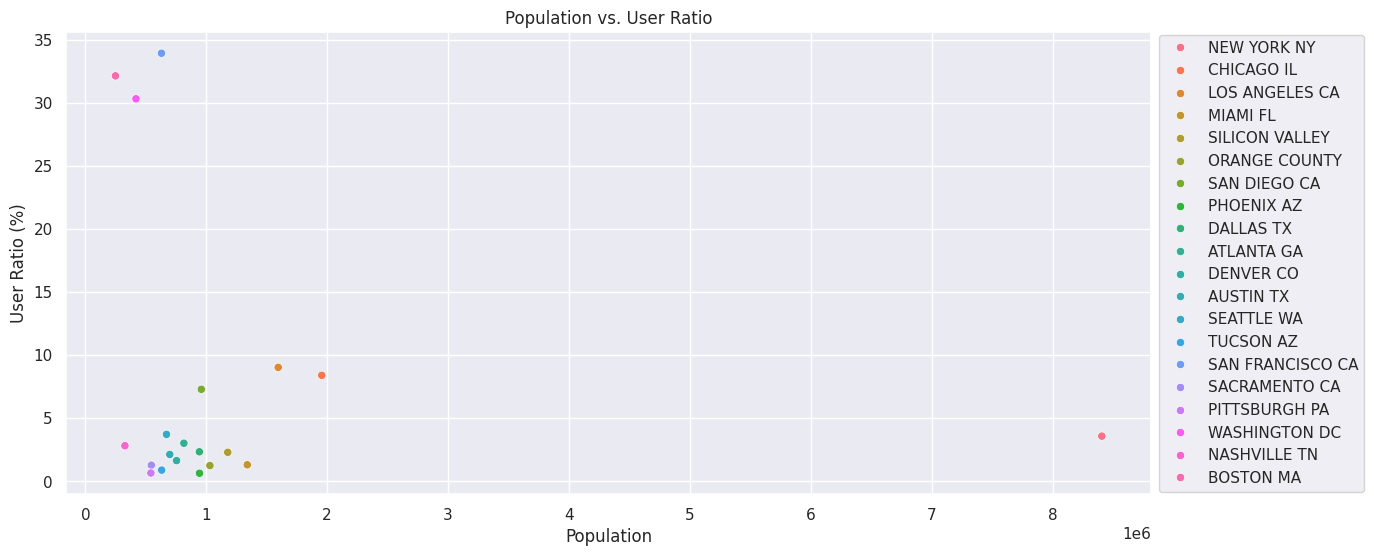

In [ ]:
# Population vs. User Ratio
plt.figure(figsize=(14, 6))
sns.scatterplot(data=city_data, x='Population', y='User_ratio', hue='City')
plt.title('Population vs. User Ratio')
plt.xlabel('Population')
plt.ylabel('User Ratio (%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

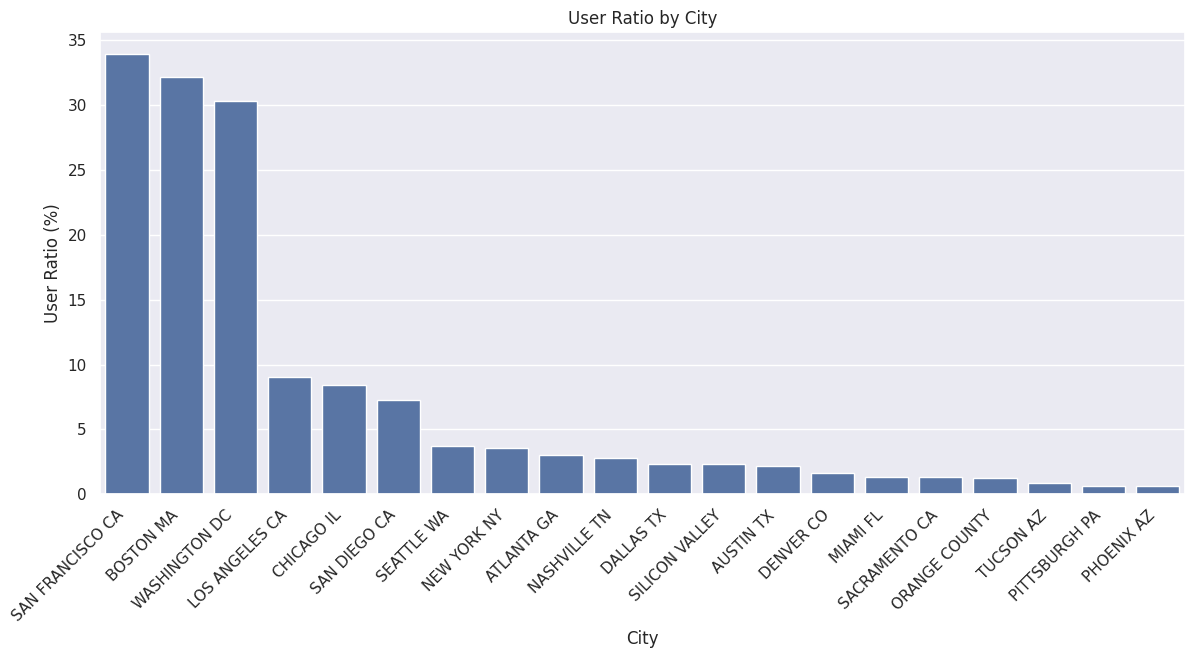

In [ ]:
# User Ratio by City
plt.figure(figsize=(14, 6))
sns.barplot(data=city_data.sort_values(by='User_ratio', ascending=False), x='City', y='User_ratio')
plt.title('User Ratio by City')
plt.xlabel('City')
plt.ylabel('User Ratio (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the observations from the plots above, we can identify clusters of cities with similar characteristics:

- New York (Extreme Outlier)
New York has the highest population but a relatively low user ratio, making it an extreme outlier as population compared to other cities.

- San Francisco, Boston, Washington (High User Ratio Cluster)
These cities have relatively high user ratios compared to their populations, indicating a strong user engagement with cab services.

- Los Angeles, Chicago, San Diego (Moderate User Ratio Cluster)
These cities have moderate user ratios compared to their populations, suggesting moderate levels of user engagement with cab services.

- Remaining Cities (Low User Ratio Cluster)
The rest of the cities form a cluster with lower user ratios compared to their populations, indicating lower levels of user engagement with cab services.

## Load Dataset (Transaction_ID)

In [ ]:
transaction_data = pd.read_csv("/content/Transaction_ID.csv")
transaction_data.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
transaction_data.describe()

Transaction ID    Customer ID
count    4.400980e+05  440098.000000
mean     1.022006e+07   23619.513120
std      1.270455e+05   21195.549816
min      1.000001e+07       1.000000
25%      1.011004e+07    3530.000000
50%      1.022006e+07   15168.000000
75%      1.033008e+07   43884.000000
max      1.044011e+07   60000.000000

In [ ]:
transaction_data.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [ ]:
transaction_data.duplicated().sum()

0

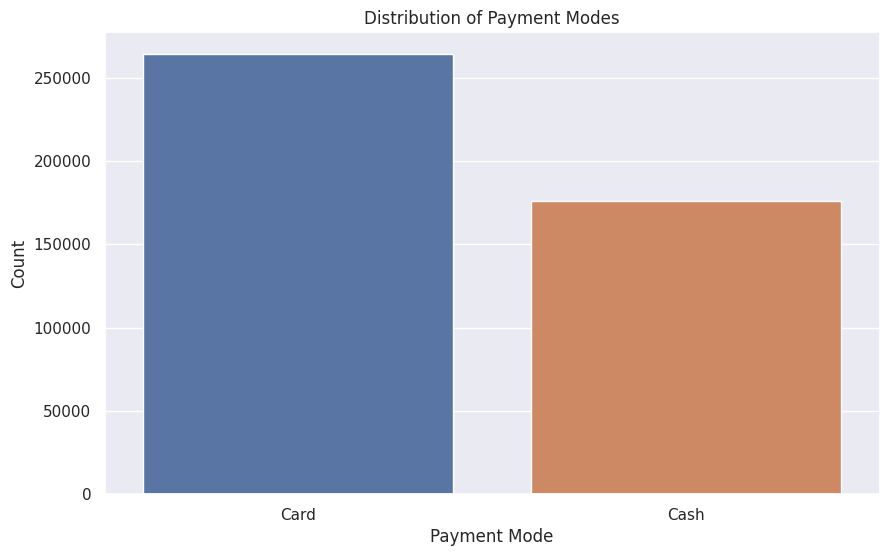

In [ ]:
# Plotting the distribution of payment modes
plt.figure(figsize=(10, 6))
sns.countplot(data=transaction_data, x='Payment_Mode', hue='Payment_Mode')
plt.title('Distribution of Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Count')
plt.show()

Most popular method of payment for the majority of all customers is the usage of card.

In [ ]:
# Count number of transactions per customer
transaction_count = transaction_data.groupby('Customer ID')['Transaction ID'].nunique()

# Filter customers with more than one transaction
repeat_customers = transaction_count[transaction_count > 1]

# Calculate percentage of repeat customers
repeat_customer_percentage = (len(repeat_customers) / len(transaction_count)) * 100

print("Percentage of Repeat Customers:", round(repeat_customer_percentage,2),'%')

Percentage of Repeat Customers: 76.74 %


We observe that 76.74% of all customers have used more than once the cab services for both the companies.

## Load Dataset (Customer_ID)

In [ ]:
customer_data = pd.read_csv("/content/Customer_ID.csv")
customer_data.head()

Customer ID Gender  Age  Income (USD/Month)
0        29290   Male   28               10813
1        27703   Male   27                9237
2        28712   Male   53               11242
3        28020   Male   23               23327
4        27182   Male   33                8536

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
customer_data['Gender'].value_counts()

Male      26562
Female    22609
Name: Gender, dtype: int64

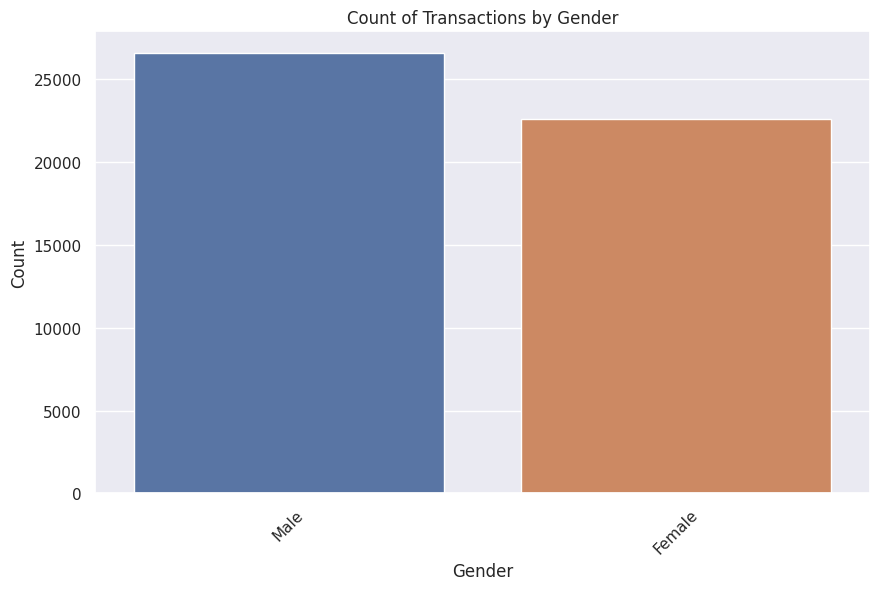

In [ ]:
# Countplot of transactions by Gender
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='Gender', hue='Gender')
plt.xticks(rotation=45)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Transactions by Gender')
plt.show()

The majority of customers for both companies are male customers, although the difference with the female is relatively small.

In [ ]:
customer_data.describe()

Customer ID           Age  Income (USD/Month)
count  49171.000000  49171.000000        49171.000000
mean   28398.252283     35.363121        15015.631856
std    17714.137333     12.599066         8002.208253
min        1.000000     18.000000         2000.000000
25%    12654.500000     25.000000         8289.500000
50%    27631.000000     33.000000        14656.000000
75%    43284.500000     42.000000        21035.000000
max    60000.000000     65.000000        35000.000000

In [ ]:
customer_data.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [ ]:
customer_data.duplicated().sum()

0

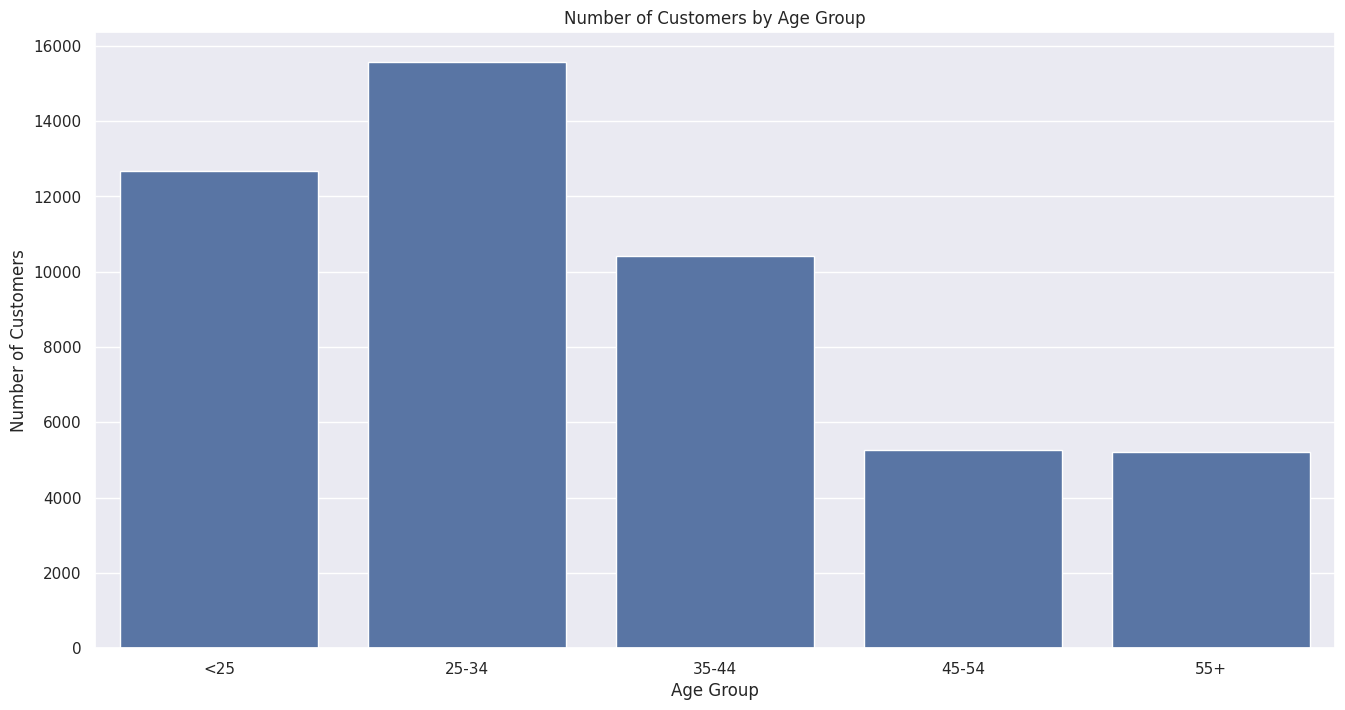

In [ ]:
# Identify customer segments based on attributes (e.g., age, income)
customer_segments = pd.cut(customer_data['Age'], bins=[0, 25, 35, 45, 55, float('inf')], labels=['<25', '25-34', '35-44', '45-54', '55+'])
customer_data['Age Group'] = customer_segments
customer_segments_counts = customer_data['Age Group'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=customer_segments_counts.index, y=customer_segments_counts.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Age Group')
plt.show()

- Largest Age Group: The age group "25-34" has the highest number of customers.

- Younger Demographic: The age group "<25" also has a substantial number of customers, indicating a significant portion of the customer base is relatively young.

- Middle-Aged Customers: The age groups "35-44" and "45-54" have fewer customers compared to the younger age groups.

- Older Customers: The age group "55+" has a similar count to the "45-54" group, indicating a presence of older customers, although relatively smaller compared to younger demographics.

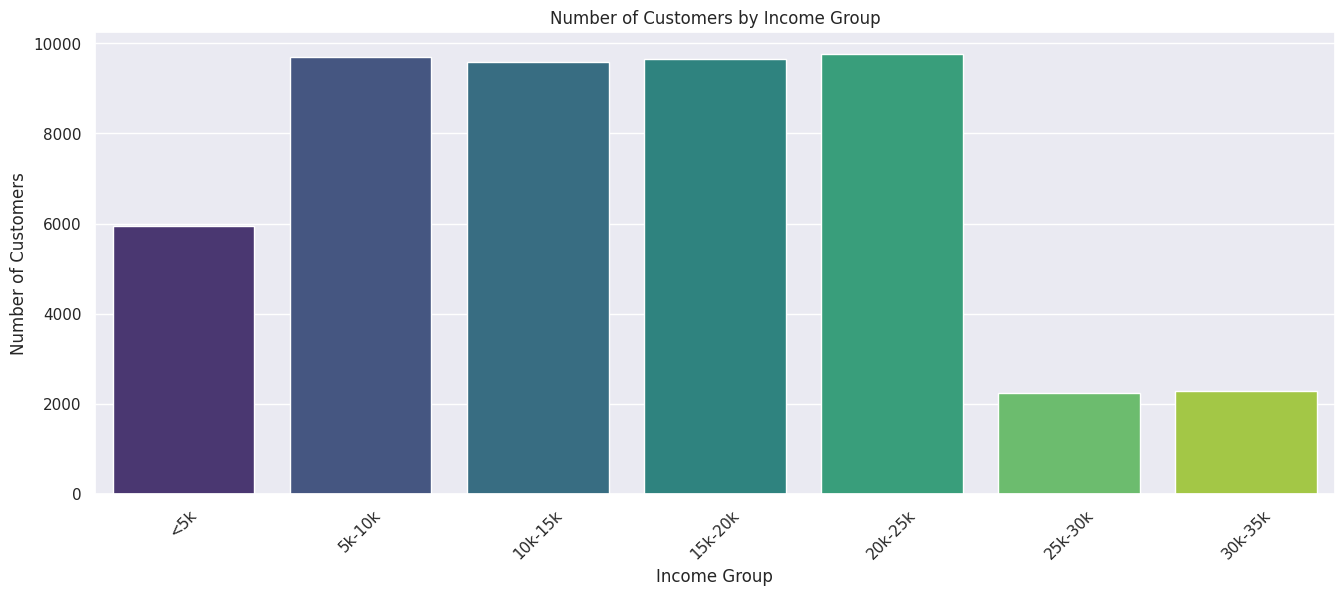

In [ ]:
# Define income bins and labels for segmentation
income_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]
income_labels = ['<5k', '5k-10k', '10k-15k', '15k-20k', '20k-25k', '25k-30k', '30k-35k']

# Segment customers based on income
customer_data['Income Group'] = pd.cut(customer_data['Income (USD/Month)'], bins=income_bins, labels=income_labels)

# Count the number of customers in each income group
income_segments_counts = customer_data['Income Group'].value_counts().sort_index()

# Plot the distribution of customers by income group
plt.figure(figsize=(16, 6))
sns.barplot(x=income_segments_counts.index, y=income_segments_counts.values, hue=income_labels, palette='viridis', legend=False)
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Income Group')
plt.xticks(rotation=45)
plt.show()

- Majority in Lower Income Brackets: The majority of customers fall into the income brackets below $20,000 annually, with the highest count observed in the "20k-25k" bracket, which suggests that a significant portion of customers may have moderate to low income levels.

- Fewer High-Income Customers: There are fewer customers in the higher income brackets, such as "25k-30k" and "30k-35k," indicating that the service may not be as popular among higher-income individuals.

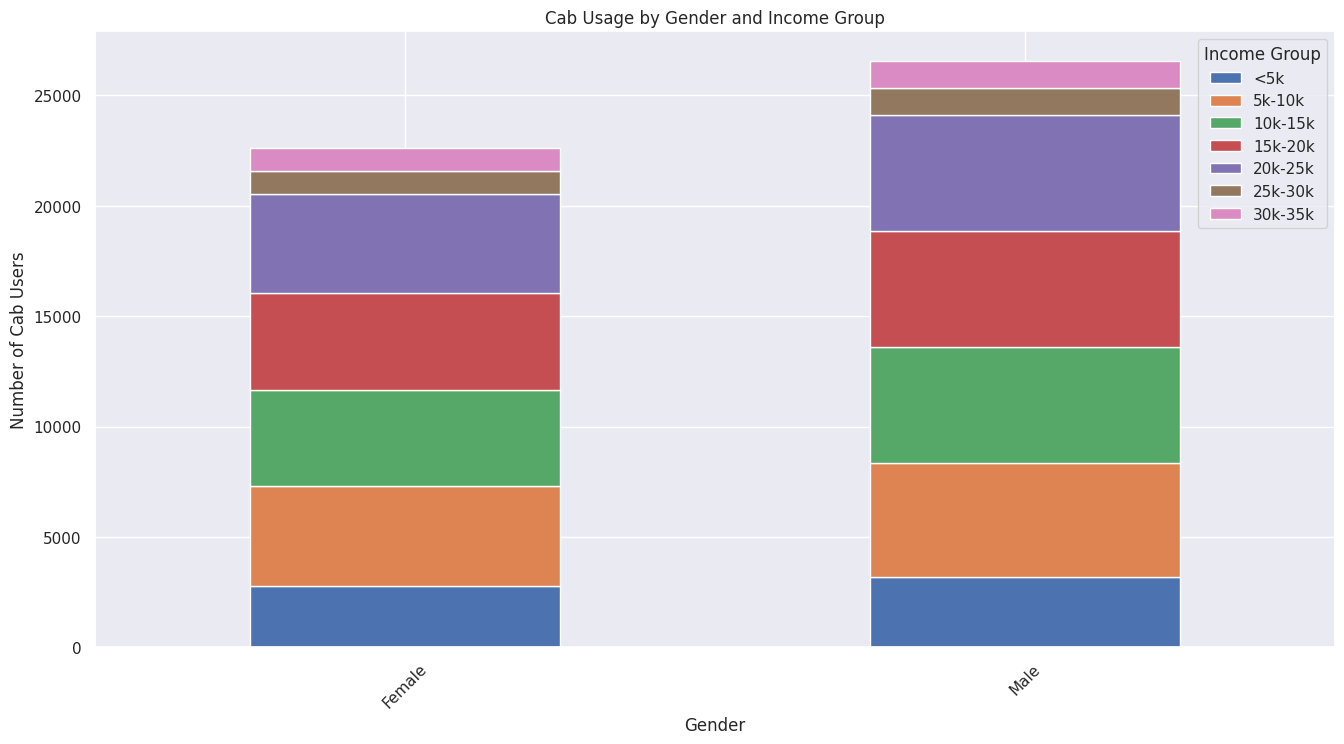

In [ ]:
# Count the number of cab users by gender and income group
gender_income_counts = customer_data.groupby(['Gender', 'Income Group']).size().unstack()

# Plot the grouped bar plot
plt.figure(figsize=(16, 8))
ax = gender_income_counts.plot(kind='bar', stacked=True, ax=plt.gca())
ax.set_ylabel('Number of Cab Users')
ax.set_title('Cab Usage by Gender and Income Group')
ax.set_xticklabels(gender_income_counts.index, rotation=45)
plt.show()

## Merge of Datasets

Now we will merge Cab_Data, Customer_ID, Transaction_ID to unveil more combined insights on our master_data. The City data won't be merged for now since its columns are examined thoroughly.

In [ ]:
# Merge transaction data with customer data
transaction_customer_data = pd.merge(transaction_data, customer_data, on='Customer ID')

transaction_customer_data.head()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

  Age Group Income Group  
0     25-34      10k-15k  
1     25-34      10k-15k  
2     25-34      10k-15k  
3     25-34       5k-10k  
4     25-34       5k-10k

In [ ]:
transaction_customer_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Age Group             0
Income Group          0
dtype: int64

In [ ]:
master_data = pd.merge(transaction_customer_data, cab_data, on='Transaction ID')
master_data.head()

Transaction ID  Customer ID Payment_Mode Gender  Age  Income (USD/Month)  \
0        10000011        29290         Card   Male   28               10813   
1        10351127        29290         Cash   Male   28               10813   
2        10412921        29290         Card   Male   28               10813   
3        10000012        27703         Card   Male   27                9237   
4        10320494        27703         Card   Male   27                9237   

  Age Group Income Group Date of Travel     Company     City  KM Travelled  \
0     25-34      10k-15k     2016-01-10    Pink Cab  ATLANTA         30.45   
1     25-34      10k-15k     2018-07-23  Yellow Cab  ATLANTA         26.19   
2     25-34      10k-15k     2018-11-25  Yellow Cab  ATLANTA         42.55   
3     25-34       5k-10k     2016-01-08    Pink Cab  ATLANTA         28.62   
4     25-34       5k-10k     2018-04-23  Yellow Cab  ATLANTA         36.38   

   Price Charged  Cost of Trip    Profit  Year  Month  
0         370.95      313.6350   57.3150  2016      1  
1         598.70      317.4228  281.2772  2018      7  
2         792.05      597.4020  194.6480  2018     11  
3         358.52      334.8540   23.6660  2016      1  
4         721.10      467.1192  253.9808  2018      4

In [ ]:
master_data.describe()

Transaction ID    Customer ID            Age  Income (USD/Month)  \
count    3.593920e+05  359392.000000  359392.000000       359392.000000   
mean     1.022076e+07   19191.652115      35.336705        15048.822937   
std      1.268058e+05   21012.412463      12.594234         7969.409482   
min      1.000001e+07       1.000000      18.000000         2000.000000   
25%      1.011081e+07    2705.000000      25.000000         8424.000000   
50%      1.022104e+07    7459.000000      33.000000        14685.000000   
75%      1.033094e+07   36078.000000      42.000000        21035.000000   
max      1.044011e+07   60000.000000      65.000000        35000.000000   

        KM Travelled  Price Charged   Cost of Trip         Profit  \
count  359392.000000  359392.000000  359392.000000  359392.000000   
mean       22.567254     423.443311     286.190113     137.253198   
std        12.233526     274.378911     157.993661     160.311840   
min         1.900000      15.600000      19.000000    -220.060000   
25%        12.000000     206.437500     151.200000      28.012000   
50%        22.440000     386.360000     282.480000      81.962000   
75%        32.960000     583.660000     413.683200     190.030000   
max        48.000000    2048.030000     691.200000    1463.966000   

                Year          Month  
count  359392.000000  359392.000000  
mean     2017.052628       7.475851  
std         0.802452       3.464767  
min      2016.000000       1.000000  
25%      2016.000000       5.000000  
50%      2017.000000       8.000000  
75%      2018.000000      10.000000  
max      2019.000000      12.000000

In [ ]:
master_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Age Group             0
Income Group          0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Profit                0
Year                  0
Month                 0
dtype: int64

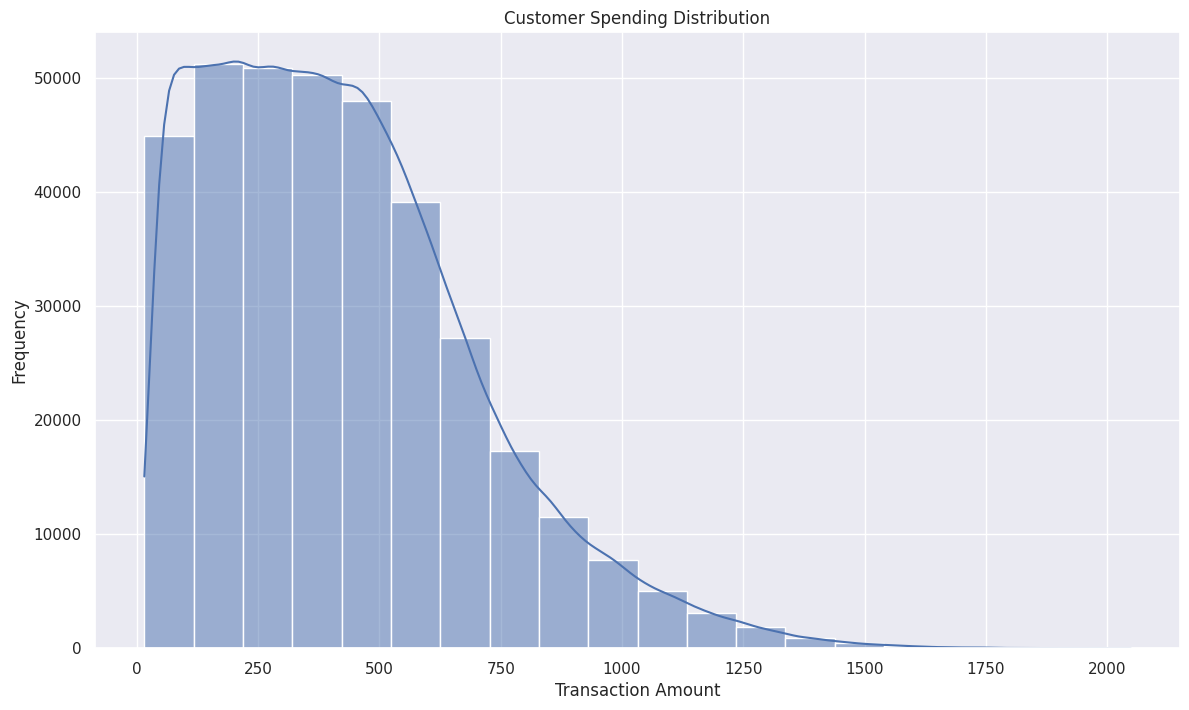

In [ ]:
# Customer Spending Distribution
plt.figure(figsize=(14, 8))
sns.histplot(master_data['Price Charged'], bins=20, kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Customer Spending Distribution')
plt.grid(True)
plt.show()

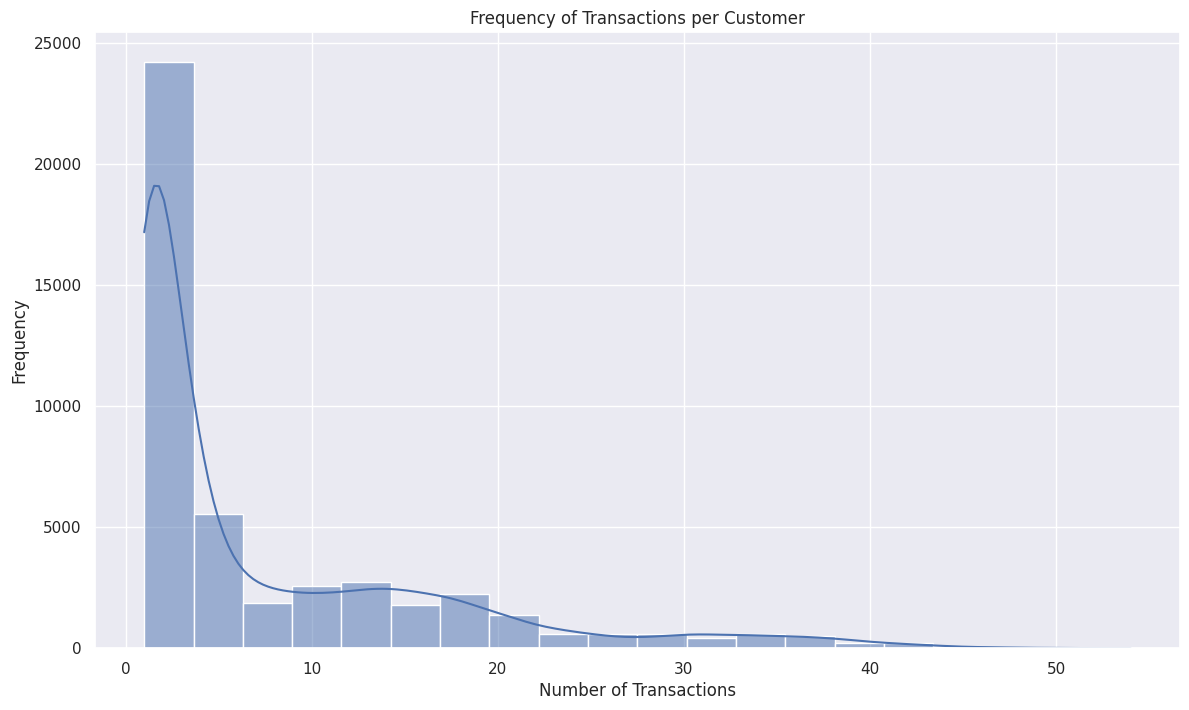

In [ ]:
# Analyze frequency of transactions
transaction_counts = master_data.groupby('Customer ID')['Transaction ID'].count()

plt.figure(figsize=(14, 8))
sns.histplot(transaction_counts, bins=20, kde=True)
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.title('Frequency of Transactions per Customer')
plt.grid(True)
plt.show()

In [ ]:
# Calculate Customer Lifetime Value (CLV) per company
clv_per_company = master_data.groupby(['Company', 'Customer ID'])['Price Charged'].sum()

# Sort CLV values per company in descending order
clv_per_company = clv_per_company.groupby('Company').apply(lambda x: x.sort_values(ascending=False))

# Display top customers by CLV for each company
print("Top Customers by Customer Lifetime Value (CLV) for Each Company:")
for company, clv in clv_per_company.groupby(level=0):
    print(f"\nCompany: {company}")
    print(clv.head(20))

Top Customers by Customer Lifetime Value (CLV) for Each Company:

Company: Pink Cab
Company   Company   Customer ID
Pink Cab  Pink Cab  8120           6568.90
                    7927           6222.78
                    1060           6205.89
                    7988           5886.23
                    6159           5748.24
                    6416           5547.96
                    6016           5489.90
                    7924           5323.97
                    8876           5233.69
                    7764           5210.01
                    2059           5199.46
                    2233           5156.72
                    8915           5146.71
                    2760           5118.25
                    8744           4999.71
                    8595           4986.71
                    415            4930.22
                    655            4914.83
                    7647           4905.78
                    8721           4901.29
Name: Price Charged, dty

Let's find now the CLV for unique customers of Pink Cab and Yellow Cab, customers who have transactions with only the one company and not the other and compare their CLV's.

In [ ]:
# Get unique customers for each company
unique_customers_pink = set(master_data[master_data['Company'] == 'Pink Cab']['Customer ID'])
unique_customers_yellow = set(master_data[master_data['Company'] == 'Yellow Cab']['Customer ID'])

# Customers unique to Pink Cab
unique_customers_pink_only = unique_customers_pink - unique_customers_yellow

# Customers unique to Yellow Cab
unique_customers_yellow_only = unique_customers_yellow - unique_customers_pink

# Calculate CLV for unique customers of each company
clv_unique_customers_pink = master_data[(master_data['Company'] == 'Pink Cab') &
                                        (master_data['Customer ID'].isin(unique_customers_pink_only))]\
                            .groupby('Customer ID')['Price Charged'].sum()

clv_unique_customers_yellow = master_data[(master_data['Company'] == 'Yellow Cab') &
                                          (master_data['Customer ID'].isin(unique_customers_yellow_only))]\
                            .groupby('Customer ID')['Price Charged'].sum()

# Display CLV for unique customers of each company
print("CLV for unique customers of Pink Cab:")
print(clv_unique_customers_pink.head(10))

print("\nCLV for unique customers of Yellow Cab:")
print(clv_unique_customers_yellow.head(10))

CLV for unique customers of Pink Cab:
Customer ID
6565    1907.21
7978    3096.80
9022     240.44
9024     303.53
9038     365.35
9048     642.64
9066     300.77
9080     726.46
9090     218.72
9096     386.98
Name: Price Charged, dtype: float64

CLV for unique customers of Yellow Cab:
Customer ID
20     19766.25
139    19963.58
256    15379.09
294    16322.54
350    12445.67
407    15626.96
525    20338.67
636    29849.65
678    20170.27
824    19158.72
Name: Price Charged, dtype: float64


From the Customer Lifetime Values (CLV) for unique customers of Pink Cab and Yellow Cab, we can draw several conclusions:

- Revenue Contribution: Yellow Cab has customers with significantly higher CLV compared to Pink Cab. This suggests that Yellow Cab may generate more revenue from individual customers compared to Pink Cab.

- Customer Loyalty: Customers with higher CLV tend to be more loyal to a particular cab company, as they have spent a substantial amount on rides provided by that company. This could indicate that Yellow Cab has a stronger base of loyal customers compared to Pink Cab.

- Market Positioning: Yellow Cab's ability to attract customers with higher CLV may indicate a stronger market position or brand reputation compared to Pink Cab.

In [ ]:
# Group customers based on demographic variables
customer_segments = master_data.groupby(['Age Group', 'Gender', 'Income Group']).size().reset_index(name='Count')

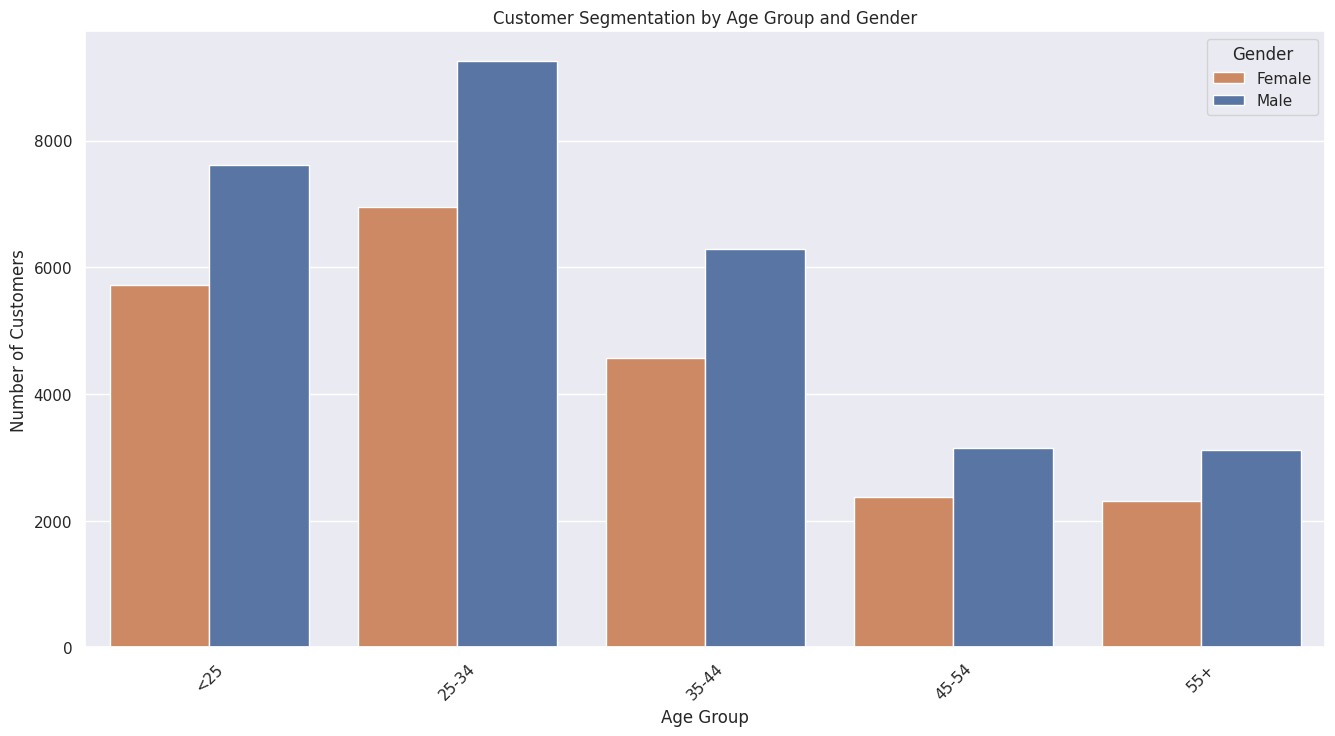

In [ ]:
# Define custom colors for each gender
custom_palette = {"Male": sns.color_palette("deep")[0], "Female": sns.color_palette("deep")[1]}

# Visualize segments with custom colors
plt.figure(figsize=(16, 8))
sns.barplot(data=customer_segments, x='Age Group', y='Count', hue='Gender', palette=custom_palette, errorbar=None)
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

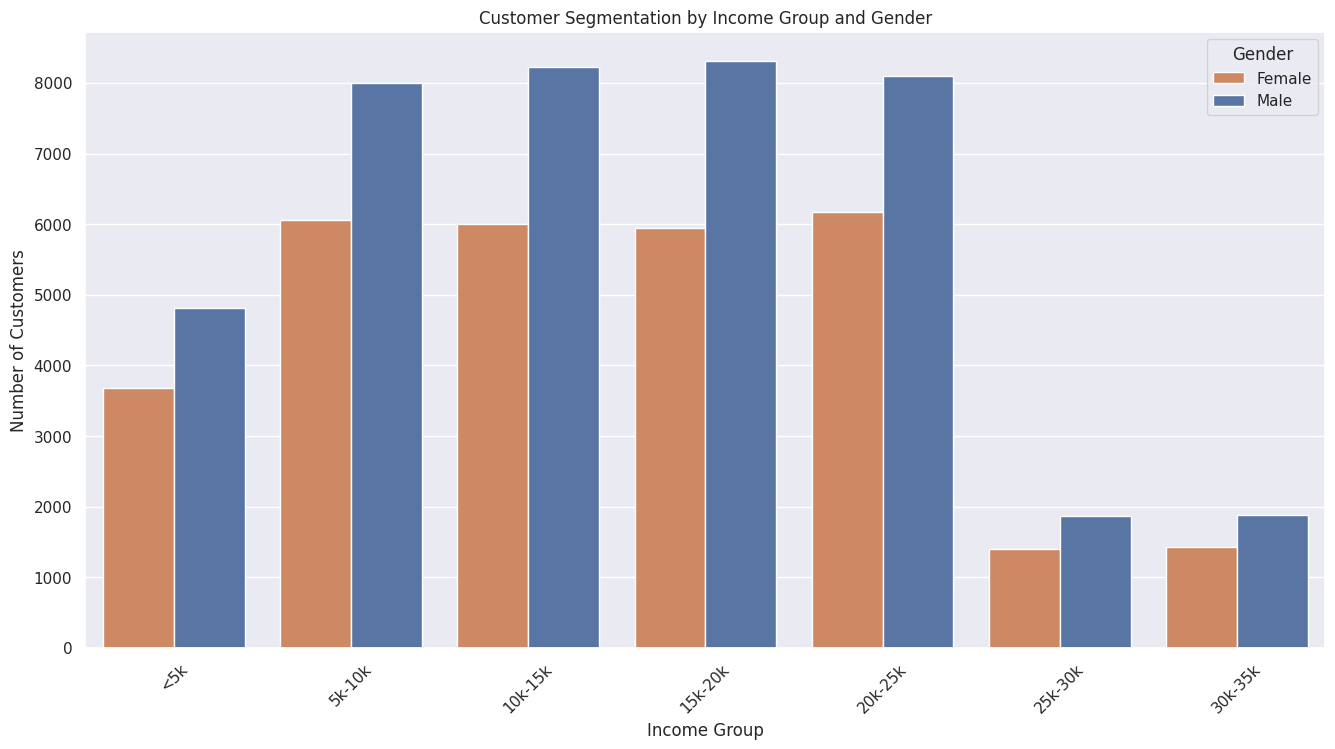

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=customer_segments, x='Income Group', y='Count', hue='Gender', palette=custom_palette, errorbar=None)
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation by Income Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

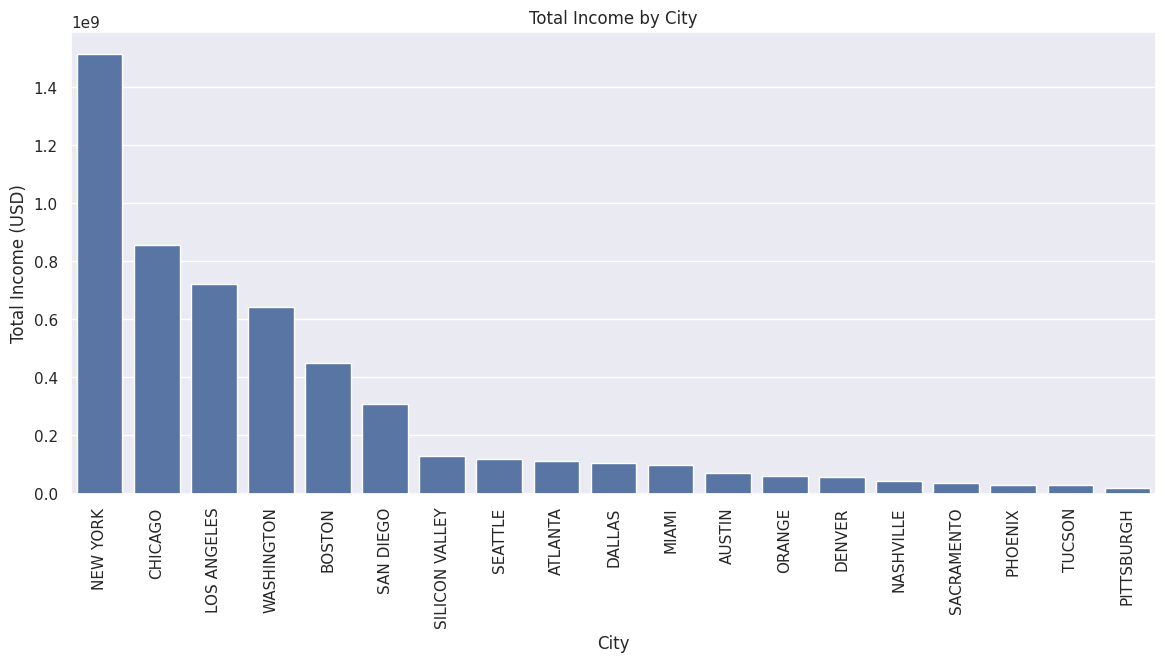

In [ ]:
# Calculate total income by city
total_income_by_city = master_data.groupby('City')['Income (USD/Month)'].sum().reset_index()

# Sort cities based on total income
total_income_by_city_sorted = total_income_by_city.sort_values(by='Income (USD/Month)', ascending=False)

# Plot the total income by city
plt.figure(figsize=(14, 6))
sns.barplot(data=total_income_by_city_sorted, x='City', y='Income (USD/Month)', estimator=sum, order=total_income_by_city_sorted['City'], errorbar=None)
plt.xlabel('City')
plt.ylabel('Total Income (USD)')
plt.title('Total Income by City')
plt.xticks(rotation=90)
plt.show()

Based on the total income generated by each city:

- Economic Centers: Cities like New York, Chicago, and Los Angeles stand out as major economic centers, with significantly higher total income compared to other cities. These cities likely have a larger population and a more robust economy, leading to higher overall income levels.

- Regional Disparities: There is a noticeable difference in total income between cities, indicating regional disparities in economic prosperity. For example, cities like New York and Los Angeles have much higher total incomes compared to smaller cities like Nashville and Sacramento.

- Urban vs. Suburban: Metropolitan areas such as New York, Chicago, and Los Angeles tend to have higher total incomes due to the concentration of businesses, industries, and higher-paying jobs. On the other hand, smaller cities or those with a more suburban character may have lower total incomes.

In [ ]:
# Group data by company and route, and calculate the number of transactions and total distance traveled
company_route_stats = master_data.groupby(['Company', 'City']).agg({
    'Transaction ID': 'count',
    'KM Travelled': 'sum'
}).reset_index()

# Rank routes within each company based on the number of transactions
company_route_stats['Rank_by_Transactions'] = company_route_stats.groupby('Company')['Transaction ID'].rank(ascending=False, method='dense')

# Rank routes within each company based on the total distance traveled
company_route_stats['Rank_by_Distance'] = company_route_stats.groupby('Company')['KM Travelled'].rank(ascending=False, method='dense')

# Filter the top routes for each company based on the rank
top_routes_by_transactions = company_route_stats[company_route_stats['Rank_by_Transactions'] == 1]
top_routes_by_distance = company_route_stats[company_route_stats['Rank_by_Distance'] == 1]

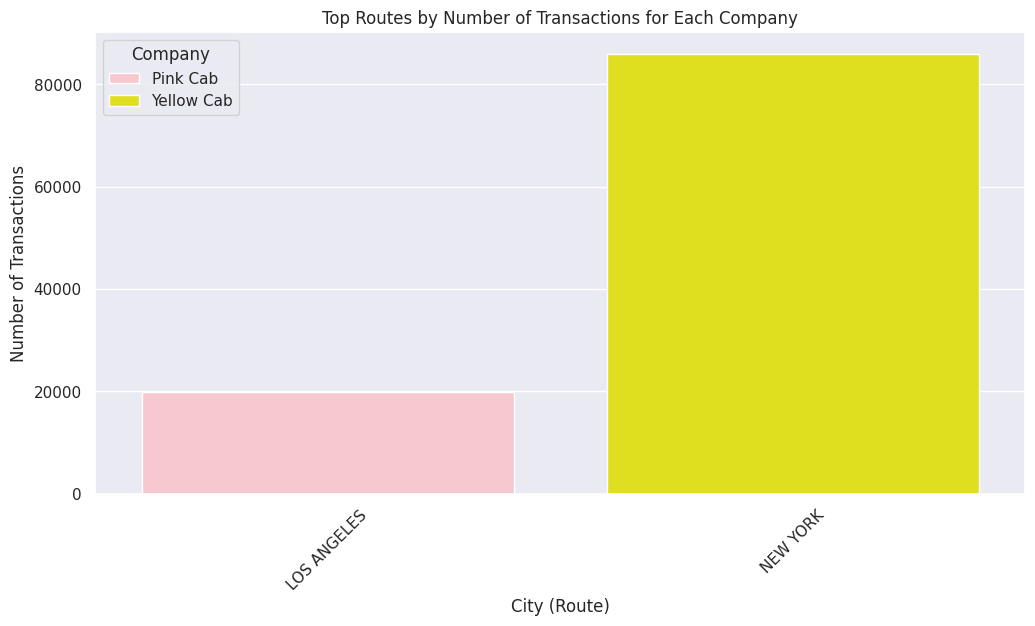

In [ ]:
# Visualize the top routes for each company
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes_by_transactions, x='City', y='Transaction ID', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('City (Route)')
plt.ylabel('Number of Transactions')
plt.title('Top Routes by Number of Transactions for Each Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

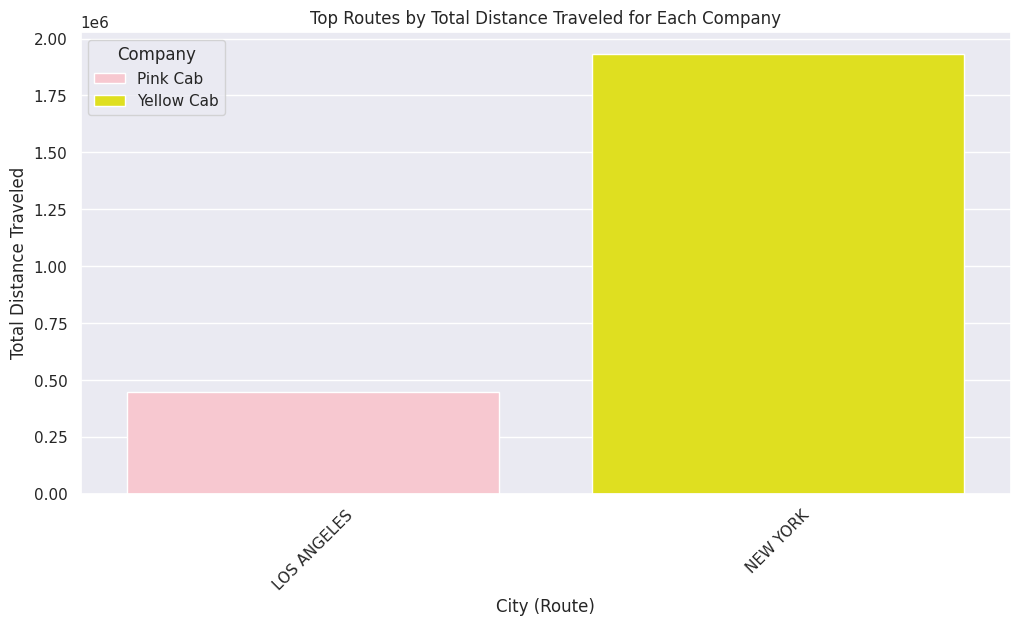

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_routes_by_distance, x='City', y='KM Travelled', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('City (Route)')
plt.ylabel('Total Distance Traveled')
plt.title('Top Routes by Total Distance Traveled for Each Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

Best routes (cities) by number of transactions and total distance travelled are New York for the Yellow Cab company and Los Angeles for the Pink Cab company.

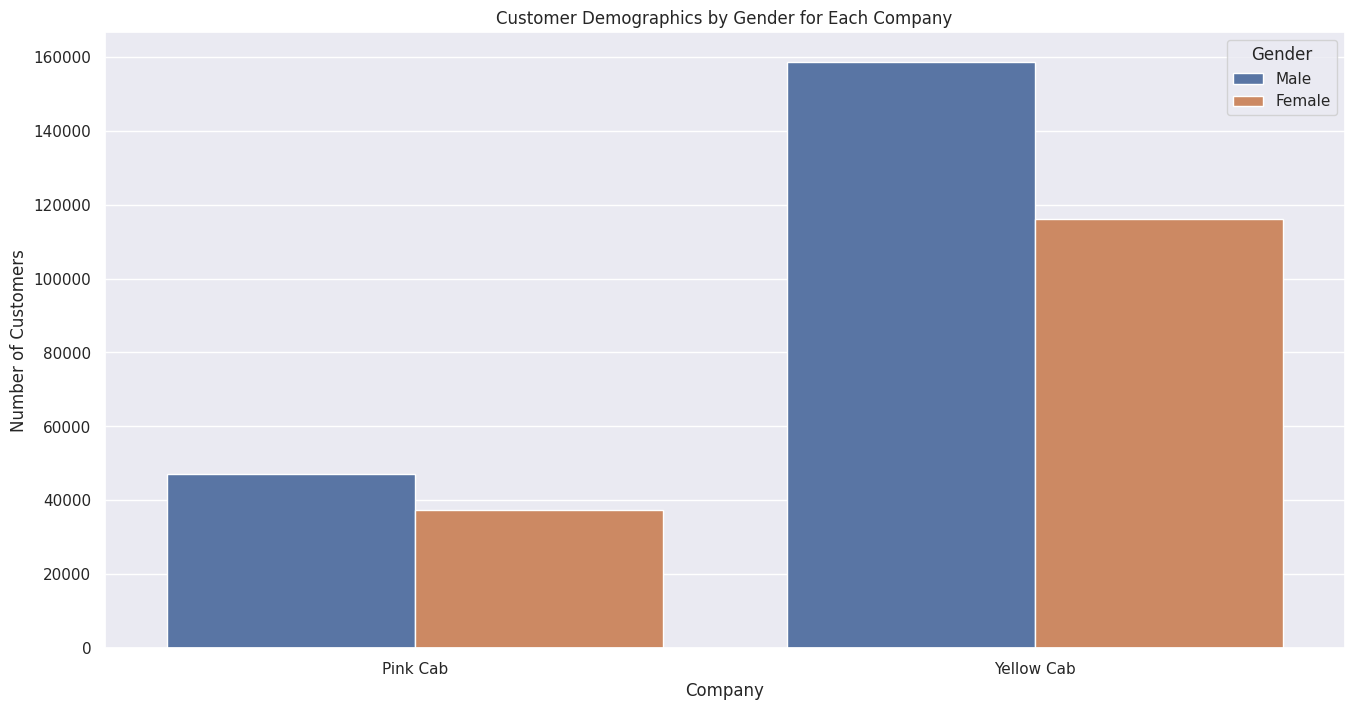

In [ ]:
# Customer Demographics for each company
plt.figure(figsize=(16, 8))
sns.countplot(data=master_data, x='Company', hue='Gender')
plt.xlabel('Company')
plt.ylabel('Number of Customers')
plt.title('Customer Demographics by Gender for Each Company')
plt.legend(title='Gender')
plt.show()

Male customers tend to get more the cab services than female in both companies.

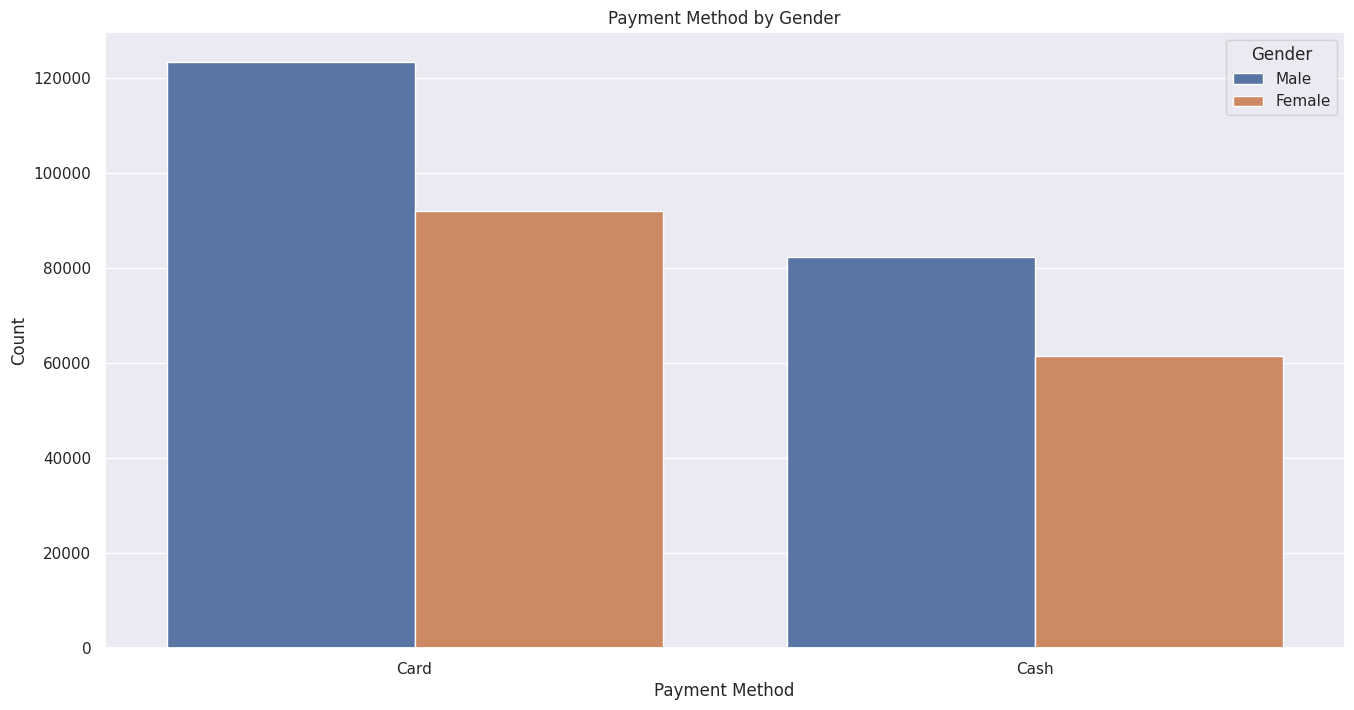

In [ ]:
# Plot payment method by gender
plt.figure(figsize=(16, 8))
sns.countplot(data=master_data, x='Payment_Mode', hue='Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Payment Method by Gender')
plt.legend(title='Gender')
plt.show()

Paying by card is the most common way for both male and female customers.

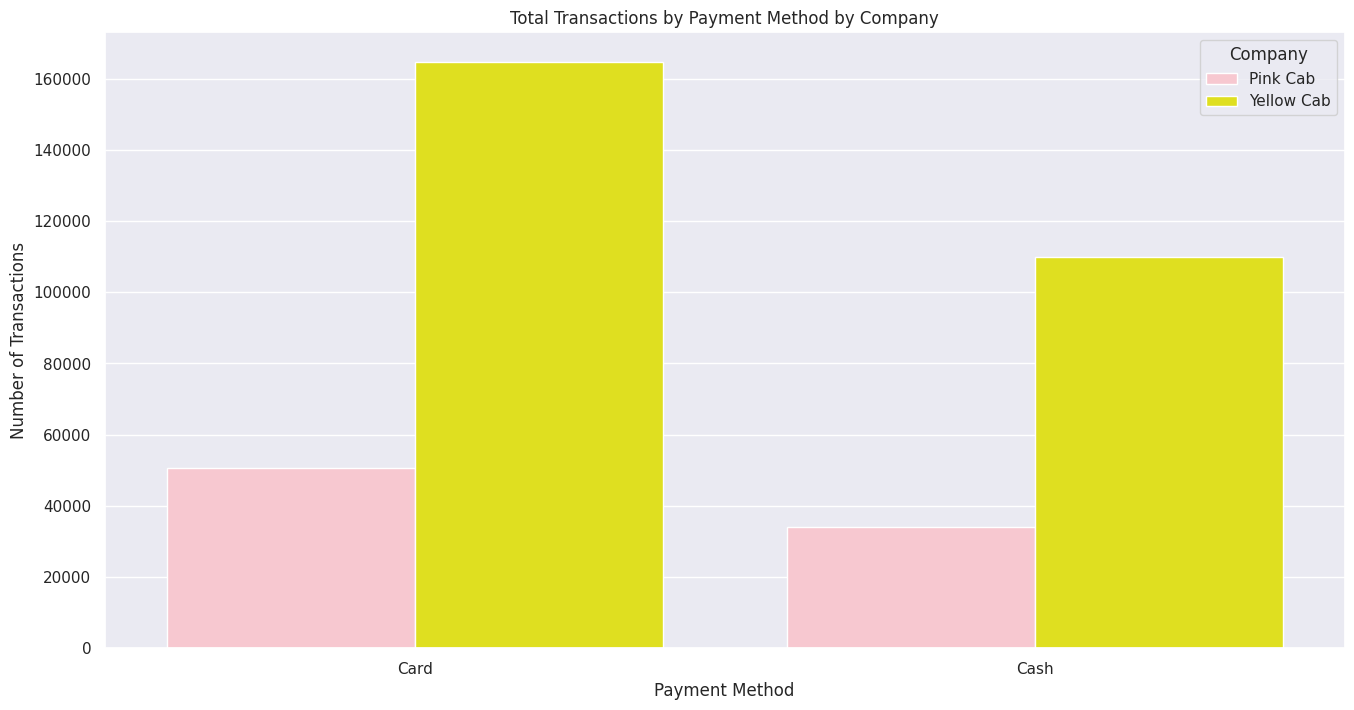

In [ ]:
# Total transactions by payment method by company
plt.figure(figsize=(16, 8))
sns.countplot(data=master_data, x='Payment_Mode', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('Payment Method')
plt.ylabel('Number of Transactions')
plt.title('Total Transactions by Payment Method by Company')
plt.show()

The majority of people are paying by card for both companies.

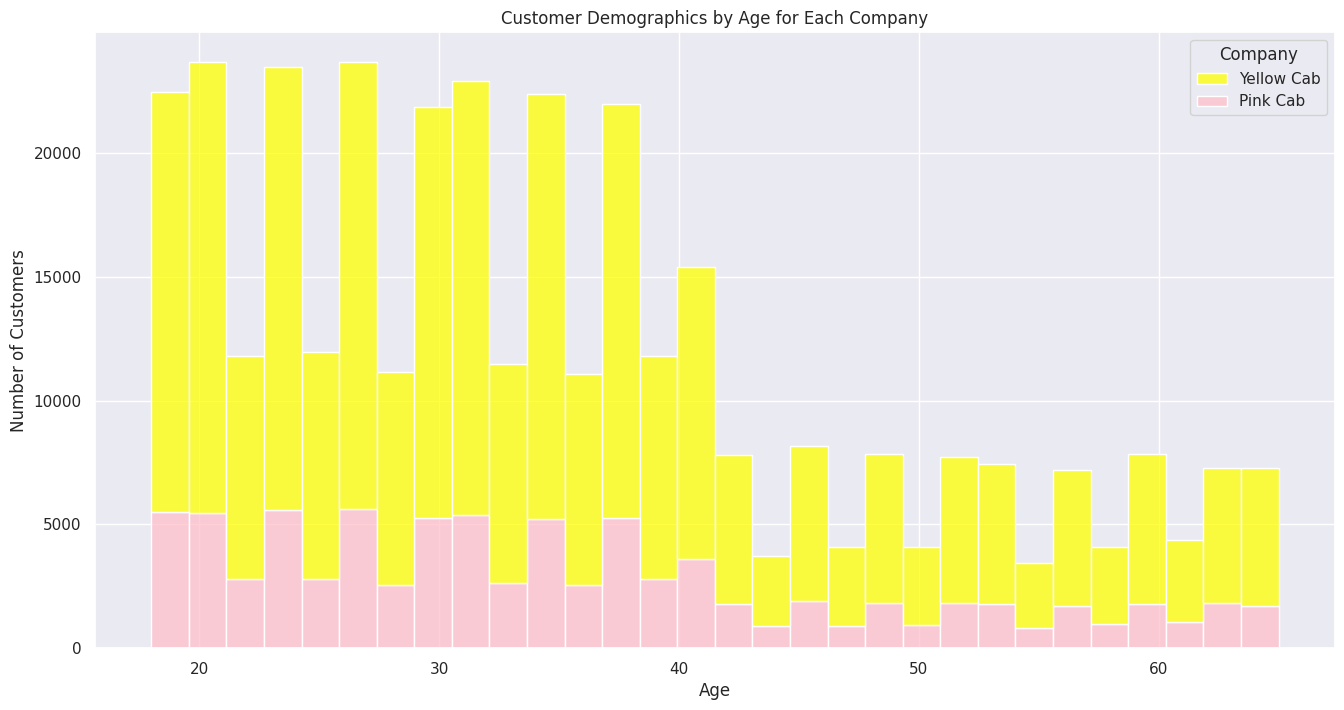

In [ ]:
# Plot customer demographics by age for each company
plt.figure(figsize=(16, 8))
sns.histplot(data=master_data, x='Age', hue='Company', hue_order=['Yellow Cab', 'Pink Cab'], bins=30, multiple='stack', palette=['yellow', 'pink'])
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Demographics by Age for Each Company')
plt.show()

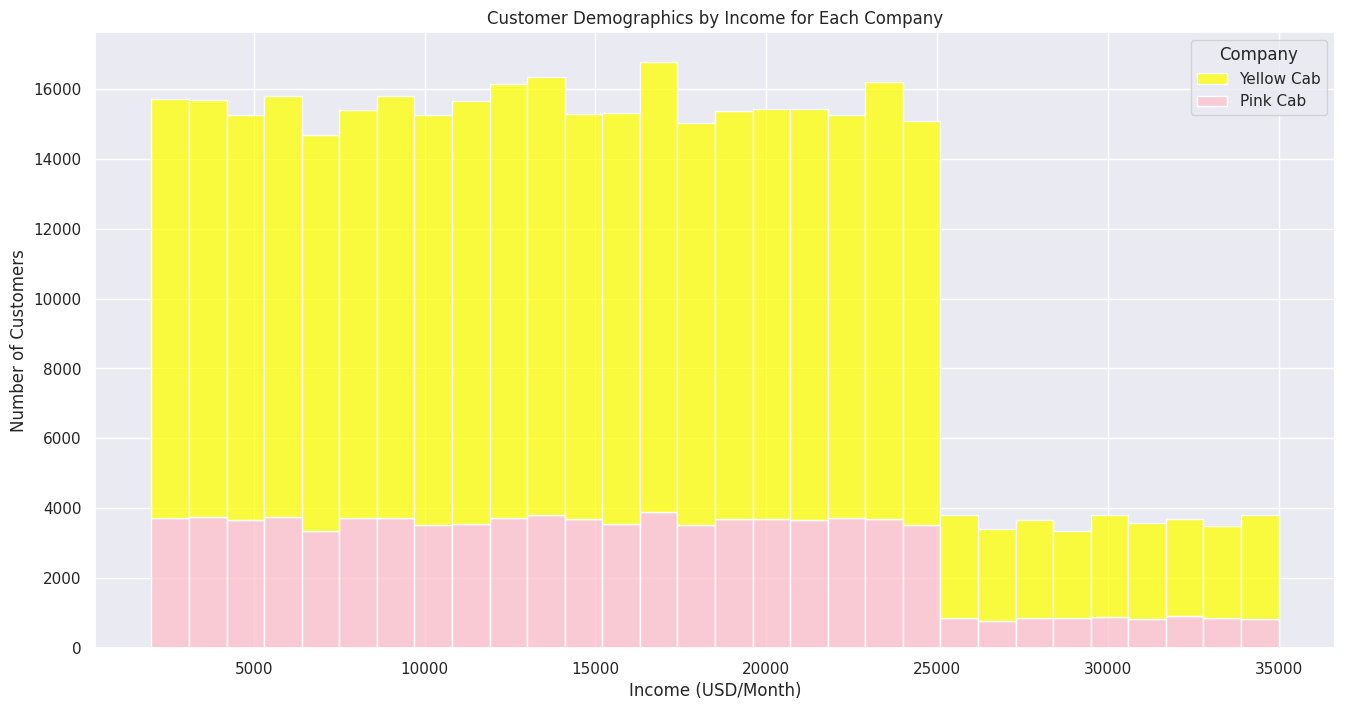

In [ ]:
# Plot customer demographics by income for each company
plt.figure(figsize=(16, 8))
sns.histplot(data=master_data, x='Income (USD/Month)', hue='Company', hue_order=['Yellow Cab', 'Pink Cab'], bins=30, multiple='stack', palette=['yellow', 'pink'])
plt.xlabel('Income (USD/Month)')
plt.ylabel('Number of Customers')
plt.title('Customer Demographics by Income for Each Company')
plt.show()

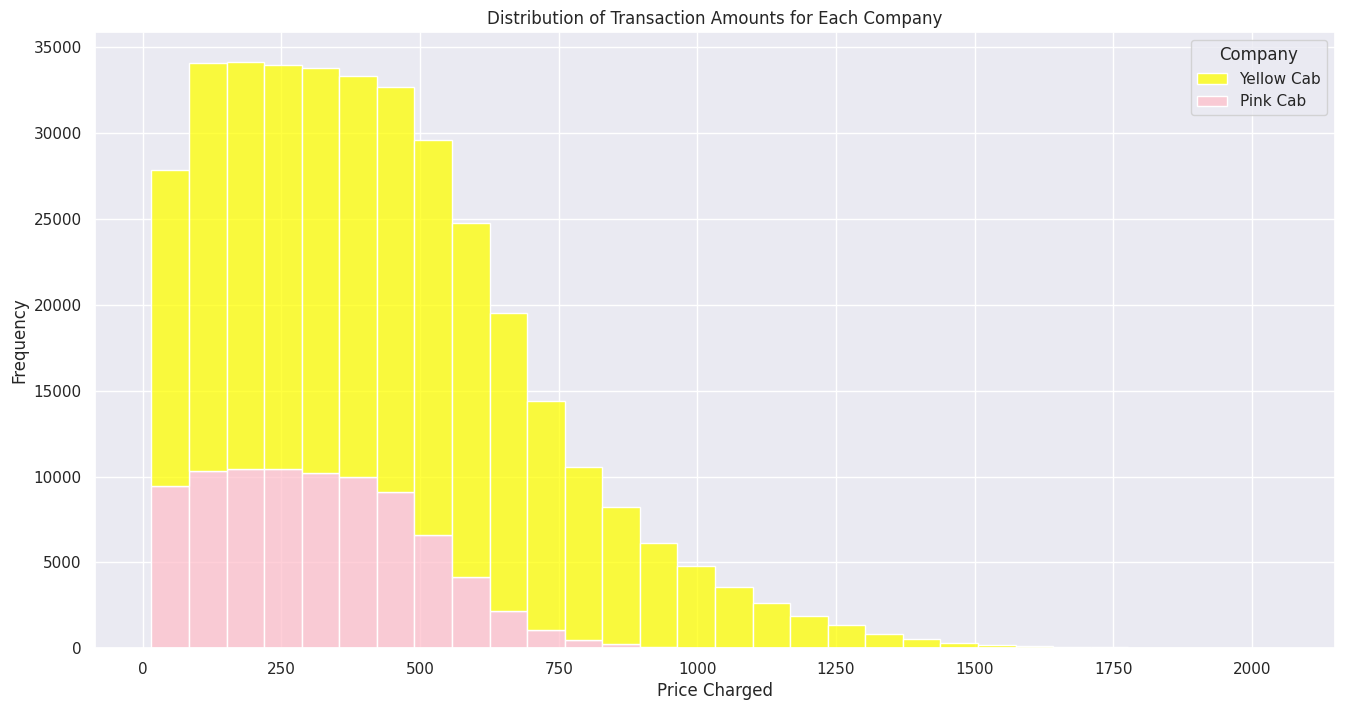

In [ ]:
# Plot distribution of transaction amounts for each company
plt.figure(figsize=(16, 8))
sns.histplot(data=master_data, x='Price Charged', hue='Company', hue_order=['Yellow Cab', 'Pink Cab'], bins=30, multiple='stack', palette=['yellow', 'pink'])
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Each Company')
plt.show()

In [ ]:
# Customer Loyalty
repeat_customer_percentage = master_data.groupby('Company')['Customer ID'].nunique() / master_data['Customer ID'].nunique() * 100
print("Percentage of Repeat Customers for Each Company:")
print(round(repeat_customer_percentage, 2))

Percentage of Repeat Customers for Each Company:
Company
Pink Cab      70.06
Yellow Cab    86.45
Name: Customer ID, dtype: float64


The percentage of loyal customers in Pink company is around 70% and in Yellow company is approximately 86.50%.

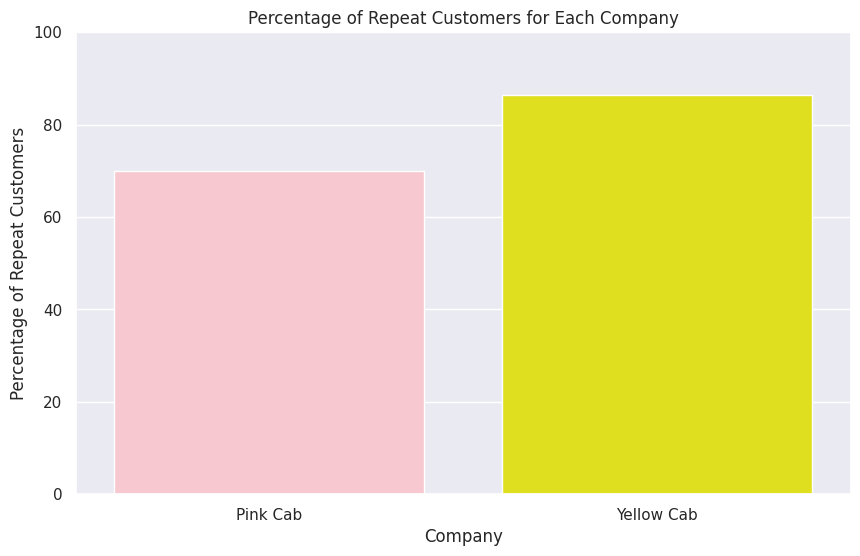

In [ ]:
# Plotting Customer Loyalty
plt.figure(figsize=(10, 6))
sns.barplot(x=repeat_customer_percentage.index, y=repeat_customer_percentage.values, hue=repeat_customer_percentage.index, palette=['pink', 'yellow'], legend=False)
plt.xlabel('Company')
plt.ylabel('Percentage of Repeat Customers')
plt.title('Percentage of Repeat Customers for Each Company')
plt.ylim(0, 100)
plt.show()

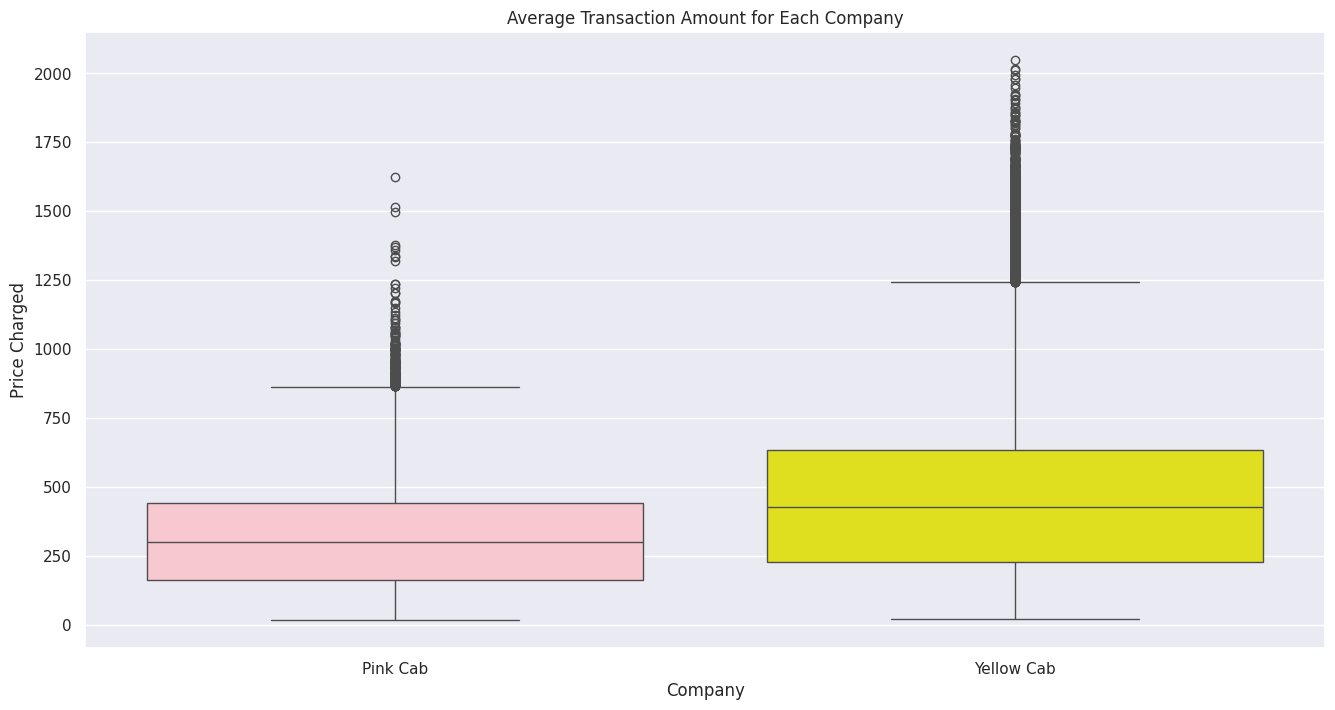

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=master_data, x='Company', y='Price Charged', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('Company')
plt.ylabel('Price Charged')
plt.title('Average Transaction Amount for Each Company')
plt.show()

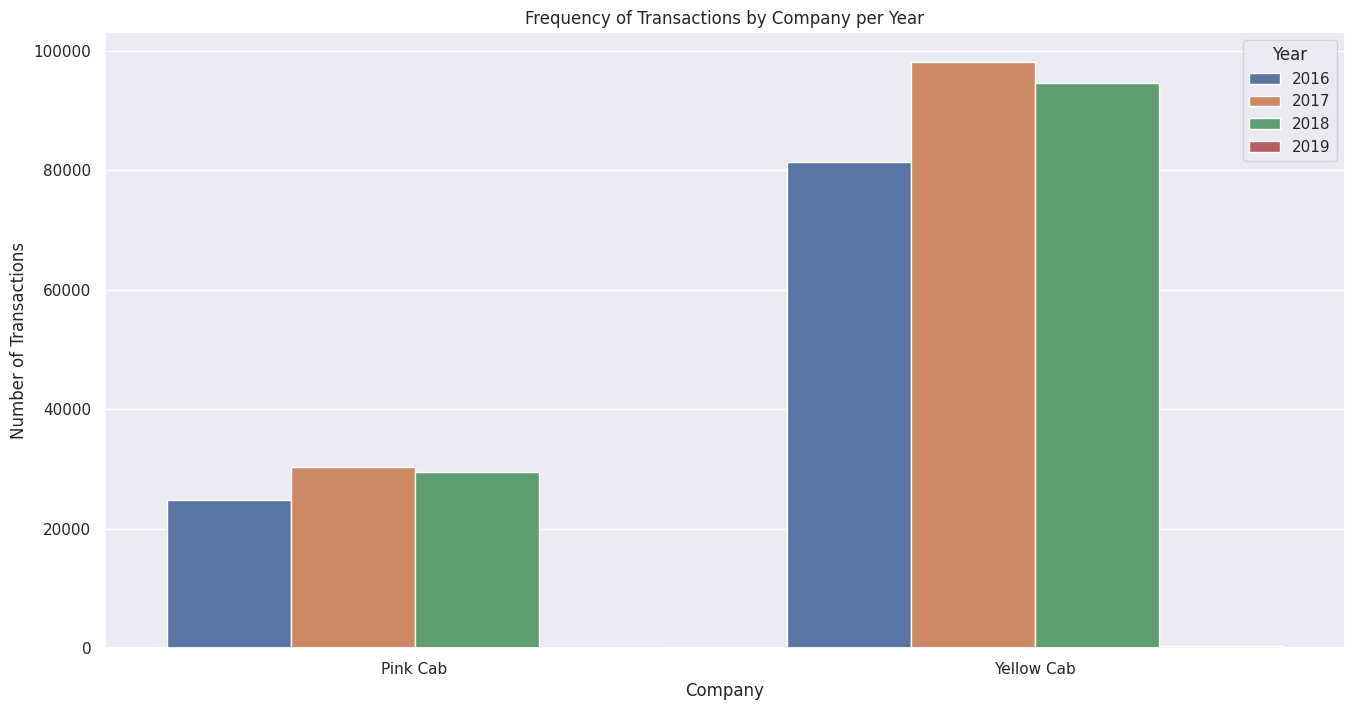

In [ ]:
plt.figure(figsize=(16, 8))
sns.countplot(data=master_data, x='Company', hue='Year', palette='deep')
plt.xlabel('Company')
plt.ylabel('Number of Transactions')
plt.title('Frequency of Transactions by Company per Year')
plt.legend(title='Year')
plt.show()

In [ ]:
# City-wise analysis by Revenue and profitability
city_revenue_profit = master_data.groupby(['City', 'Company']).agg({'Price Charged': 'sum', 'Profit': 'sum'}).sort_values(by=['Profit','Price Charged'], ascending=False).reset_index()

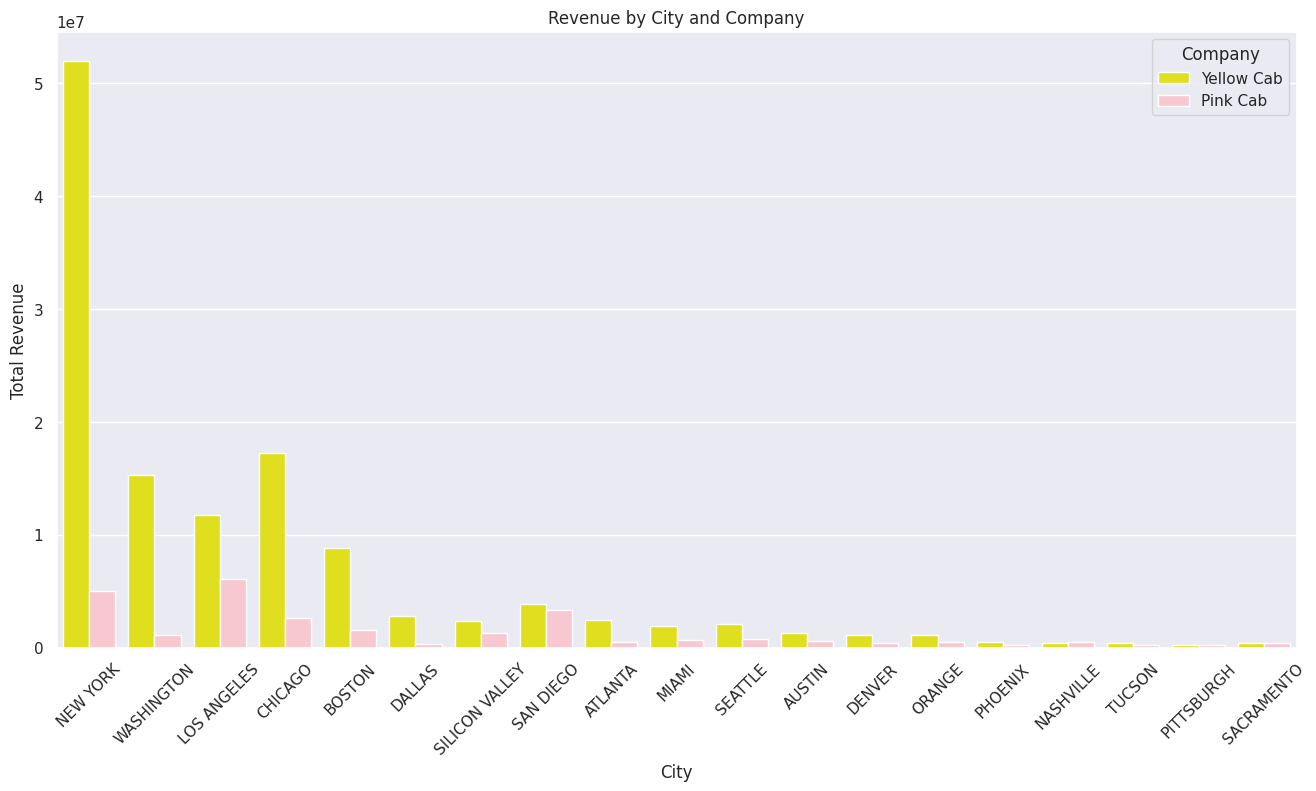

In [ ]:
# Visualize revenue  by city and company
plt.figure(figsize=(16, 8))
sns.barplot(data=city_revenue_profit, x='City', y='Price Charged', hue='Company', palette=['yellow', 'pink'])
plt.xlabel('City')
plt.ylabel('Total Revenue')
plt.title('Revenue by City and Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

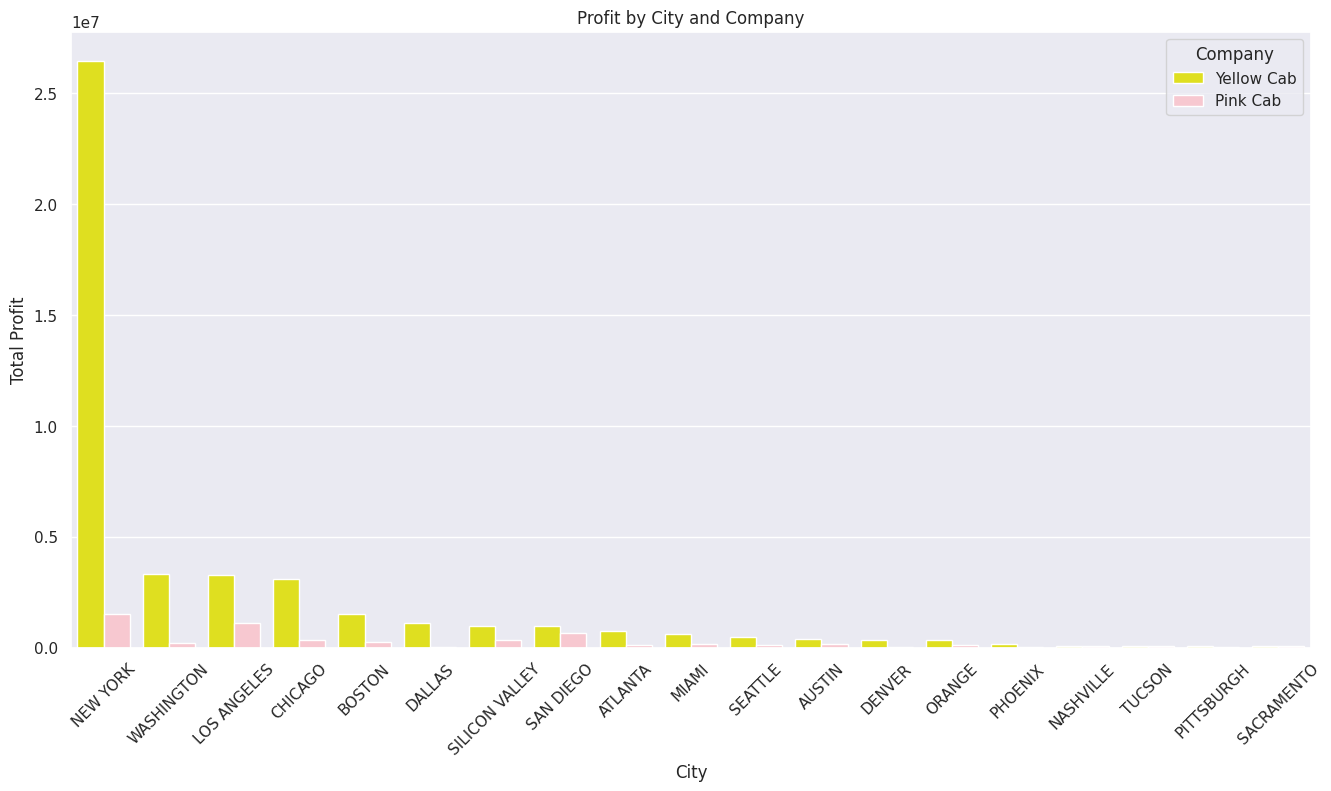

In [ ]:
# Visualize profitability by city and company
plt.figure(figsize=(16, 8))
sns.barplot(data=city_revenue_profit, x='City', y='Profit', hue='Company', palette=['yellow', 'pink'])
plt.xlabel('City')
plt.ylabel('Total Profit')
plt.title('Profit by City and Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

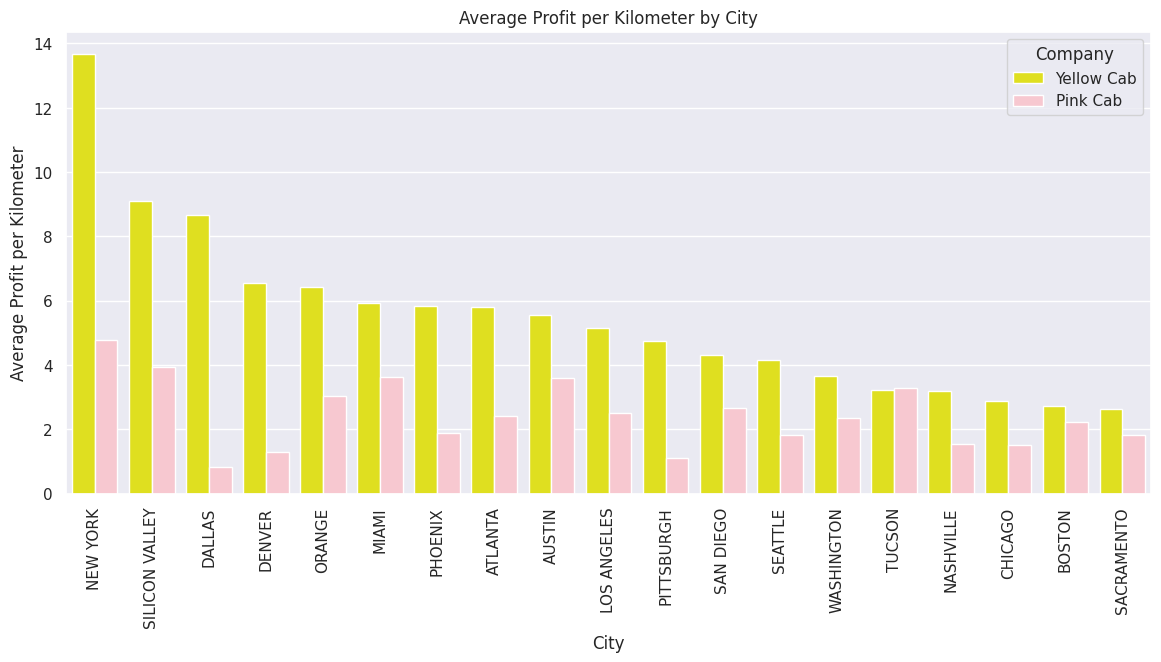

In [ ]:
# Calculate total profit and total kilometers traveled by city and company
profit_per_km = (master_data.groupby(['City', 'Company'])['Profit'].sum() / master_data.groupby(['City', 'Company'])['KM Travelled'].sum()).sort_values(ascending=False)

# Reset index to convert multi-index to columns
profit_per_km = profit_per_km.reset_index()

# Plot the average profit per kilometer by city and company
plt.figure(figsize=(14, 6))
sns.barplot(data=profit_per_km, x='City', y=0, hue='Company', palette=['yellow', 'pink'])
plt.xlabel('City')
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer by City')
plt.xticks(rotation=90)
plt.show()

The cities with top average profit per km are shown to be New York and Silicon Valley for both the companies.

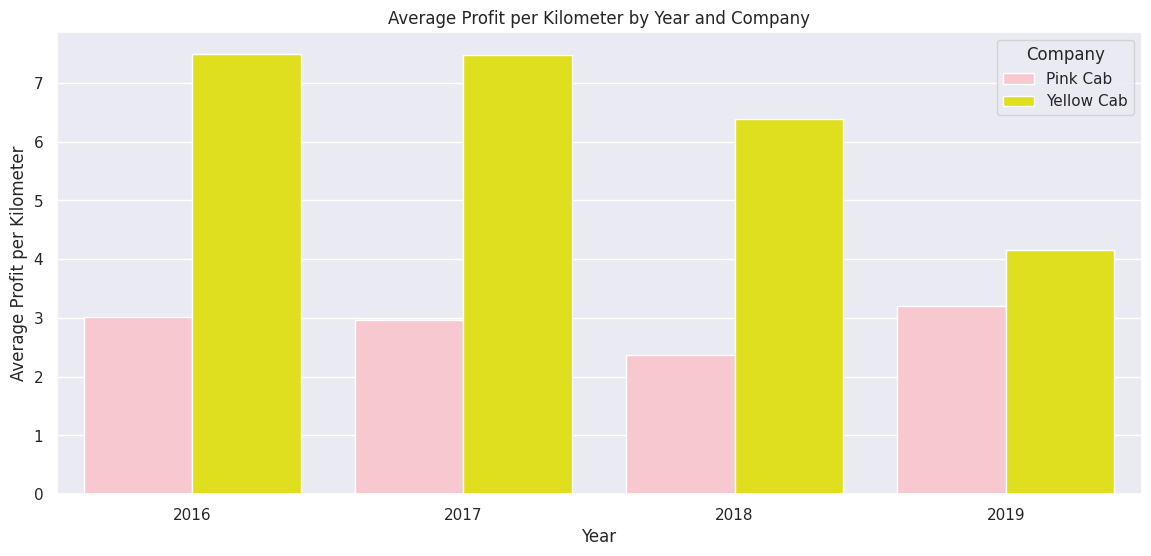

In [ ]:
# Group data by year and company
profit_per_km_year_company = master_data.groupby(['Year', 'Company'])['Profit'].sum() / master_data.groupby(['Year', 'Company'])['KM Travelled'].sum()

# Reset index to convert multi-index to columns
profit_per_km_year_company = profit_per_km_year_company.reset_index()

# Plot the average profit per kilometer by year and company
plt.figure(figsize=(14, 6))
sns.barplot(data=profit_per_km_year_company, x='Year', y=0, hue='Company', palette=['pink', 'yellow'], estimator=sum)
plt.xlabel('Year')
plt.ylabel('Average Profit per Kilometer')
plt.title('Average Profit per Kilometer by Year and Company')
plt.show()

The average profit per km for Yellow company fell from approximately 7.5 dollars in 2016 to around 4.2 dollars in 2019. In Pink company we see a  small rise from around 3 dollars to 3.20 for the same period.

In [ ]:
# City-wise analysis by customer demographics
city_demographics = master_data.groupby(['City', 'Company']).agg({'Customer ID': 'nunique', 'Age': 'mean', 'Income (USD/Month)': 'mean'}).reset_index()

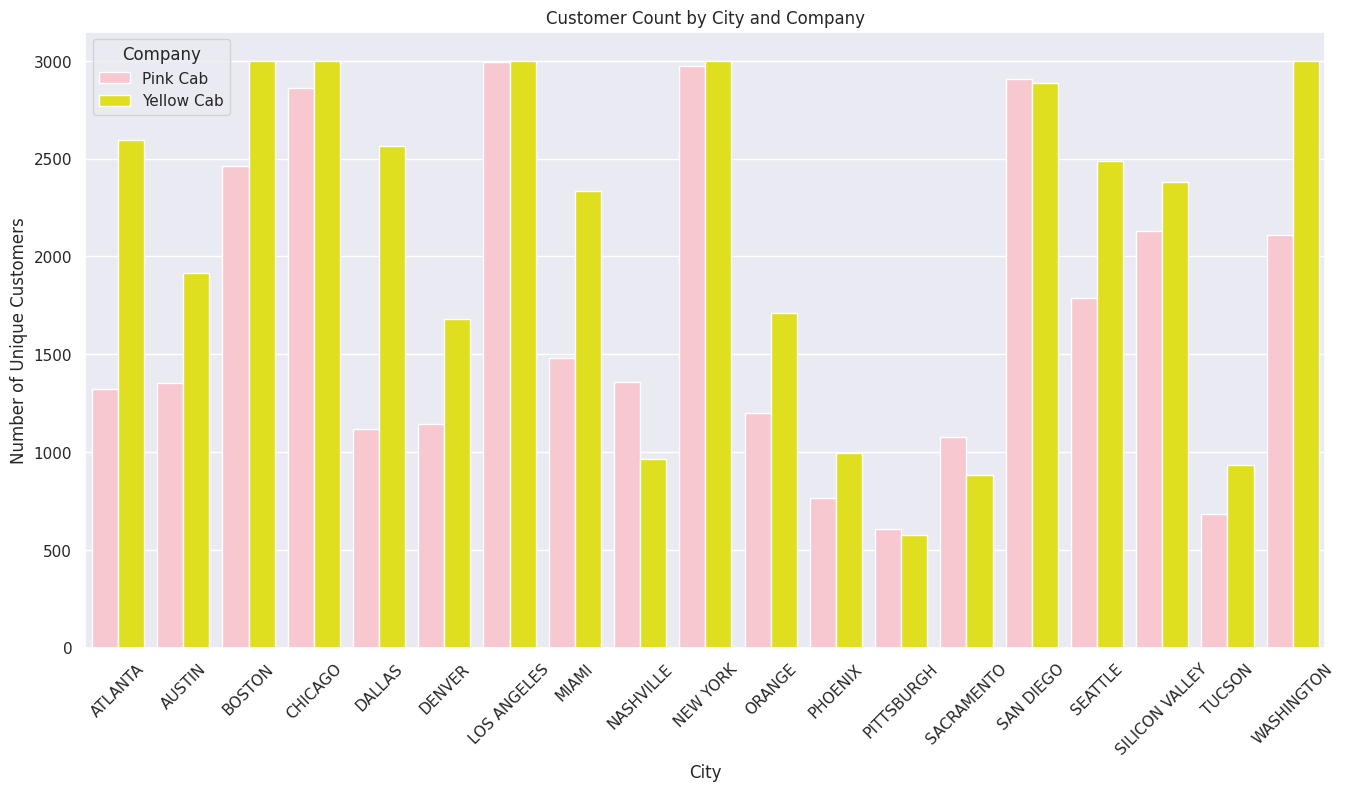

In [ ]:
# Visualize customer demographics by city and company
plt.figure(figsize=(16, 8))
sns.barplot(data=city_demographics, x='City', y='Customer ID', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('City')
plt.ylabel('Number of Unique Customers')
plt.title('Customer Count by City and Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

The cities with the higher number of unique customers for Yellow company are New York, Los Angeles, Boston, Chicago and Washington and for the Pink company are Los Angeles, New York, San Diego, Chicago and Boston.

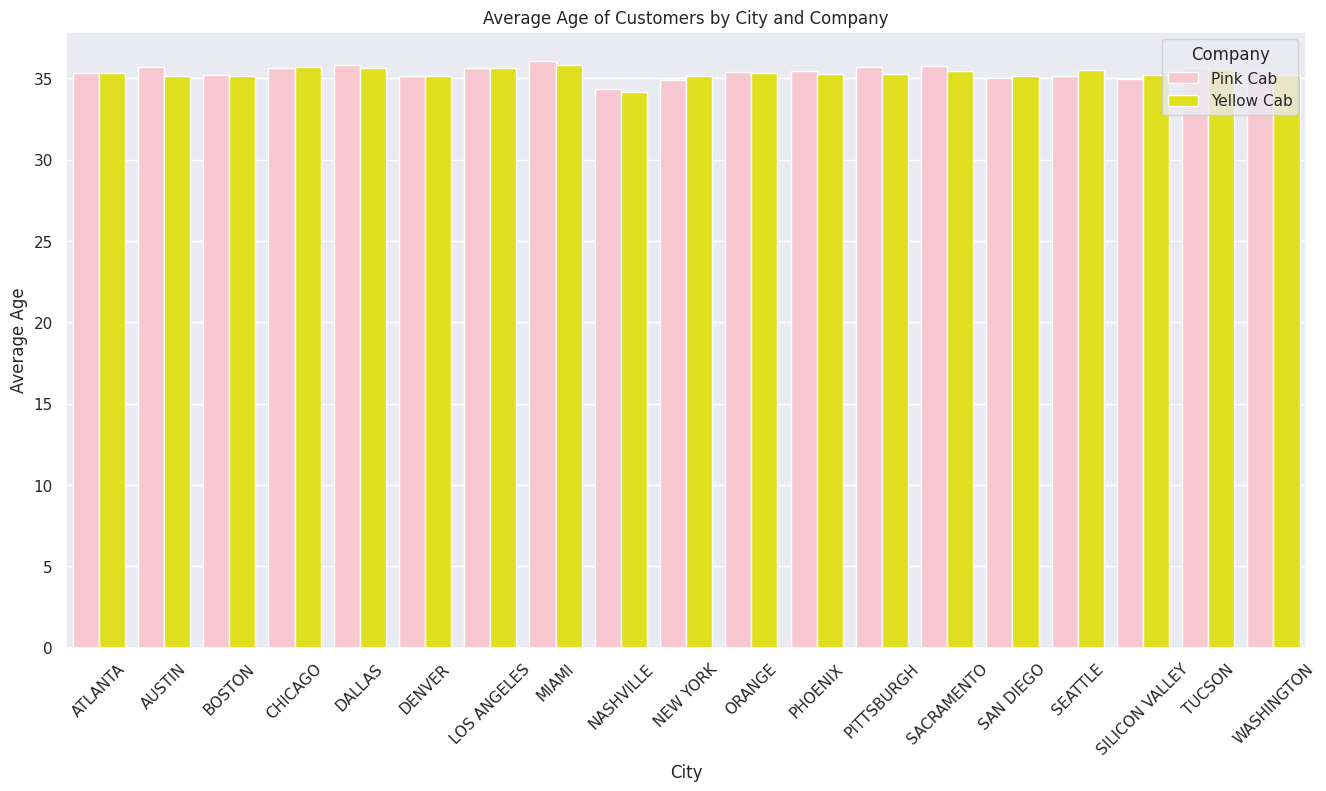

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=city_demographics, x='City', y='Age', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('City')
plt.ylabel('Average Age')
plt.title('Average Age of Customers by City and Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

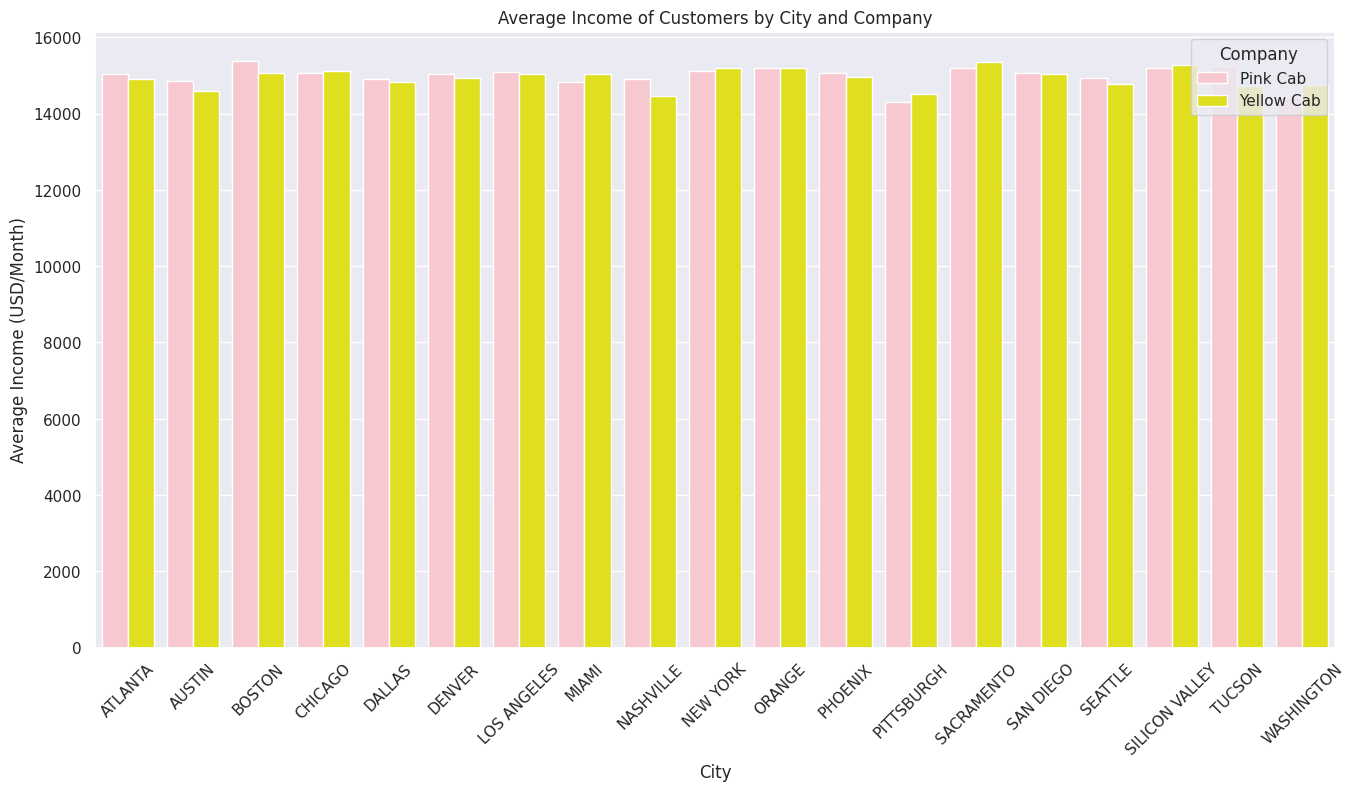

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(data=city_demographics, x='City', y='Income (USD/Month)', hue='Company', palette=['pink', 'yellow'])
plt.xlabel('City')
plt.ylabel('Average Income (USD/Month)')
plt.title('Average Income of Customers by City and Company')
plt.xticks(rotation=45)
plt.legend(title='Company')
plt.show()

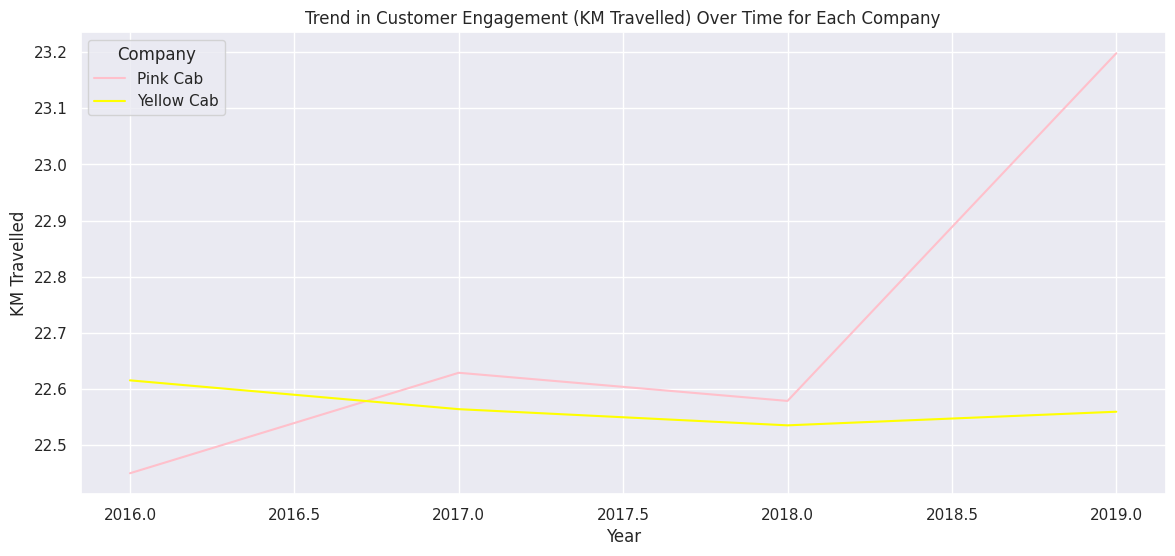

In [ ]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=master_data, x='Year', y='KM Travelled', hue='Company', palette=['pink', 'yellow'], errorbar=None)
plt.xlabel('Year')
plt.ylabel('KM Travelled')
plt.title('Trend in Customer Engagement (KM Travelled) Over Time for Each Company')
plt.show()

In the plot, the Pink Cab line shows an increasing trend in customer engagement (measured by kilometers traveled) over the years, indicating that this company's customer base or their engagement with the service has been growing steadily. On the other hand, the Yellow Cab line appears to remain relatively stable over the years, suggesting that the customer engagement for the yellow company has not experienced significant changes in the same period.

In [ ]:
# Define churn threshold (no transactions in the last 6 months of 2018)
churn_threshold = pd.Timestamp(2018, 7, 1)

# Group by company and customer ID, then check if the maximum date of travel is before the churn threshold
churned_customers = master_data.groupby(['Company', 'Customer ID'])['Date of Travel'].max() < churn_threshold

# Group churned customers by company and count the number of True values (churned customers)
churned_counts = churned_customers.groupby('Company').sum()
churned_counts

Company
Pink Cab      18378
Yellow Cab    17305
Name: Date of Travel, dtype: int64

In [ ]:
# Calculate the total number of customers for each company
total_customers = master_data.groupby('Company')['Customer ID'].nunique()
total_customers

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64

In [ ]:
# Compute churn rate for each company by dividing the number of churned customers by the total number of customers
churn_rate = (churned_counts / total_customers) * 100

# Display churn rate for each company
print("Churn Rate for Each Company:")
print(churn_rate)

Churn Rate for Each Company:
Company
Pink Cab      56.845036
Yellow Cab    43.375276
dtype: float64


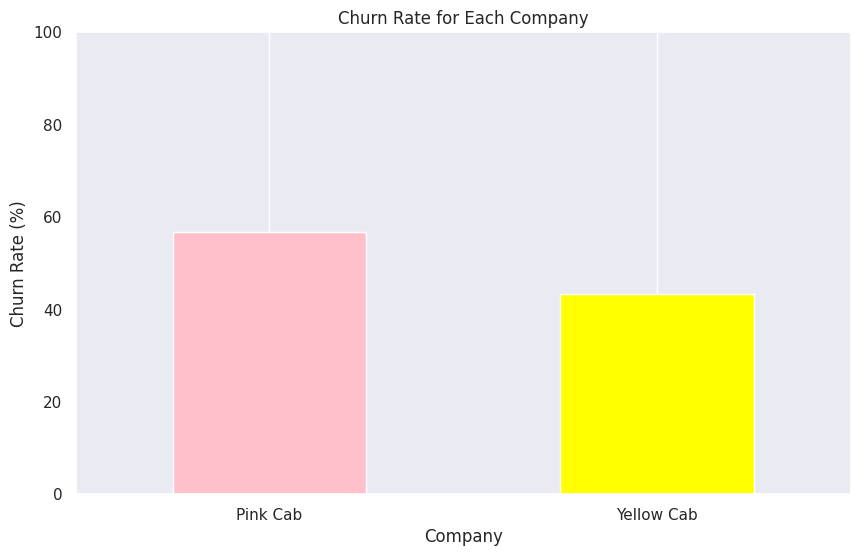

In [ ]:
# Plot churn rate for each company
plt.figure(figsize=(10, 6))
churn_rate.plot(kind='bar', color=['pink', 'yellow'])
plt.xlabel('Company')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate for Each Company')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.ylim(0, 100)
plt.show()

- Churn Disparity: The churn rate for Pink Cab (56.85%) is significantly higher than that of Yellow Cab (43.38%). This indicates that Pink Cab has a higher proportion of customers who stopped using their services compared to Yellow Cab for the last six months that we specified to be considered as churn period.

- Competitive Advantage: Yellow Cab appears to have a relatively lower churn rate compared to Pink Cab. This could be perceived as a competitive advantage, indicating that Yellow Cab has been more successful in retaining its customer base.

## Correlation Analysis

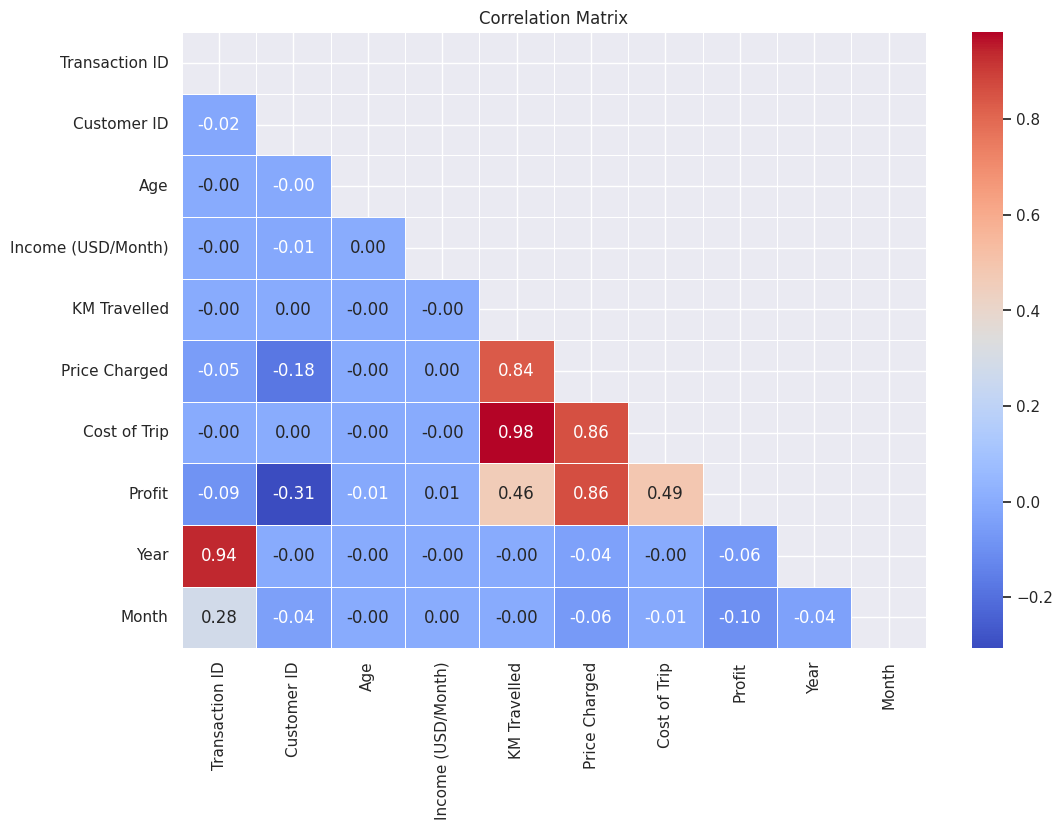

In [ ]:
# Calculate the correlation matrix
correlation_matrix = master_data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

- Price Charged and Profit: These two variables exhibit a strong positive correlation (0.86). It suggests that as the price charged for a cab ride increases, the profit tends to increase as well.

- Cost of Trip and Profit: Similarly, there is a strong positive correlation (0.49) between the cost of the trip and profit. This indicates that as the cost of the trip increases, the profit tends to increase too.

- Price Charged and Cost of Trip: There is a strong positive correlation between the price charged for a cab ride and the cost of the trip. This suggests that as the cost of providing the service increases, the price charged to the customer also tends to increase, which is expected in a profitable business model.

- Cost of Trip and KM Travelled: There is an extremely strong positive correlation between the cost of the trip and the distance traveled (in kilometers). This indicates that the cost of providing the service is directly proportional to the distance traveled, which is intuitive as longer distances typically incur higher costs.

- Price Charged and KM Travelled: There is a strong positive correlation between the price charged for a cab ride and the distance traveled (in kilometers). This suggests that customers are charged more for longer-distance rides, which aligns with common pricing models in the transportation industry.

- Year and Transaction ID: There is a very strong positive correlation between the year and the transaction ID. This indicates a consistent increase in the number of transactions over the years, which could be attributed to the growth and expansion of the cab service business over time.

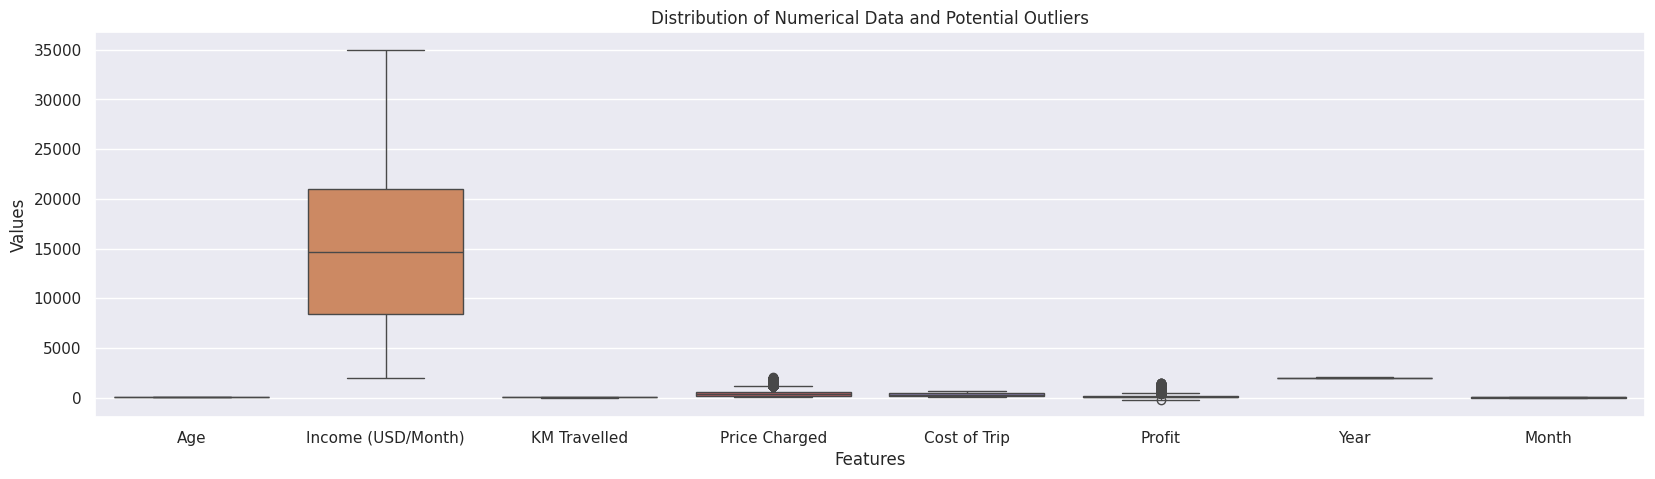

In [ ]:
# Visualize the distribution of numerical data and identify potential outliers
plt.figure(figsize=(20, 5))
sns.boxplot(data=master_data.drop(columns=['Transaction ID', 'Customer ID']))
plt.title('Distribution of Numerical Data and Potential Outliers')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

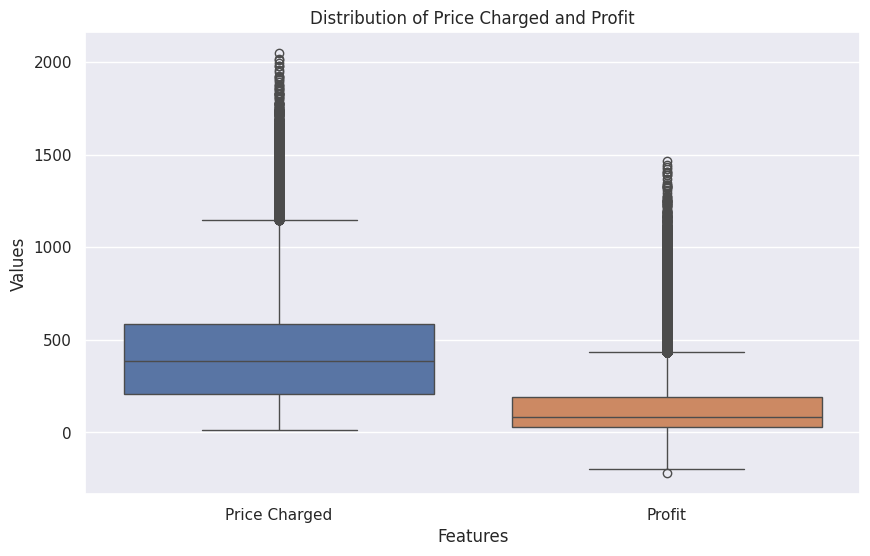

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=master_data[['Price Charged', 'Profit']])
plt.title('Distribution of Price Charged and Profit')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

The presence of outliers in both the 'Price Charged' and 'Profit' boxplots indicates that there are extreme values in these variables that deviate significantly from the majority of the data points.

- Price Charged Outliers: Outliers in the 'Price Charged' variable could indicate unusually high transaction prices compared to the typical range.

- Profit Outliers: Outliers in the 'Profit' variable suggest transactions with exceptionally high or low profit margins.

## Hypothesis Testing

***Hypothesis 1:***

---

Seasonality Hypothesis

- Null Hypothesis (H0): There is no seasonality in the number of customers using cab services.
- Alternative Hypothesis (H1): The number of customers using cab services exhibits seasonality, with peak demand during certain months or seasons.


In [ ]:
# Group the data by month and count the number of customers
customer_data = master_data.groupby('Month')['Customer ID'].count().reset_index()

# Apply seasonal Mann-Kendall test with a period of 12 months
seasonal_test_result = mk.seasonal_test(customer_data, period=12)
seasonal_test_result

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=7.923130374010157e-09, z=5.770085540729481, Tau=0.9090909090909091, s=120.0, var_s=425.3333333333333, slope=1.0, intercept=9196.25)

- Trend: The trend is reported as "increasing," indicating that there is a statistically significant increasing trend observed in the number of customers using cab services over the months.
- h: The value of h being True suggests that the null hypothesis of no seasonality is rejected.
- p: The p-value is very small (7.92e-09), indicating strong evidence against the null hypothesis. In other words, there is strong evidence to suggest that there is seasonality in the number of customers using cab services.
- z: The z-score is 5.77, indicating the significance of the observed trend.
- Tau: Tau is a measure of the strength and direction of the association. Here, it's 0.909, indicating a strong positive association.

To sum up, the test results provide strong evidence to support the alternative hypothesis that the number of customers using cab services exhibits seasonality, with a statistically significant increasing trend over the months.

***Hypothesis 2:***

---

Company Performance Hypothesis

- Null Hypothesis (H0): There is no significant difference in the number of cab users between Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): One of the cab companies has a significantly higher number of cab users compared to the other.

In [ ]:
# Extract data for Pink Cab and Yellow Cab
pink_cab_customers = master_data[master_data['Company'] == 'Pink Cab']['Customer ID']
yellow_cab_customers = master_data[master_data['Company'] == 'Yellow Cab']['Customer ID']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(pink_cab_customers, yellow_cab_customers)

# Print the t-test result
print("Two-Sample T-Test Results:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("\nReject the null hypothesis. There is a significant difference in the number of customers between Pink Cab and Yellow Cab.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in the number of customers between Pink Cab and Yellow Cab.")

Two-Sample T-Test Results:
T-Statistic: -12.187627722674286
P-Value: 3.6747050468286167e-34

Reject the null hypothesis. There is a significant difference in the number of customers between Pink Cab and Yellow Cab.


We can conclude that there is indeed a significant difference in the number of customers between Pink Cab and Yellow Cab.

***Hypothesis 3:***

---

Payment Mode Preference Hypothesis

- Null Hypothesis (H0): There is no association between the payment mode used (e.g., cash, card) and the frequency of cab usage for Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): Customers using specific payment modes (e.g., card) tend to use Pink Cab or Yellow Cab services more frequently compared to those using other payment modes.

In [ ]:
# Group by payment mode and cab company, and calculate the frequency
payment_mode_cab_usage = master_data.groupby(['Payment_Mode', 'Company']).size().unstack(fill_value=0)

# Perform chi-square test
chi2_stat, p_val, _, _ = chi2_contingency(payment_mode_cab_usage)

print("Chi2-Statistic:", chi2_stat)
print("P-Value:", p_val)

# Interpret the results
alpha = 0.05
if p_val < alpha:
    print("\nReject the null hypothesis. There is a significant association between payment mode and cab company.")
else:
    print("\nFail to reject the null hypothesis. There is no significant association between payment mode and cab company.")

Chi2-Statistic: 0.3733235887859897
P-Value: 0.5411981778304723

Fail to reject the null hypothesis. There is no significant association between payment mode and cab company.


 The choice of payment mode does not appear to be related to the preference for a particular cab company (Pink Cab or Yellow Cab).

***Hypothesis 4:***

---

City Population Influence Hypothesis

- Null Hypothesis (H0): There is no relationship between the population of a city and the number of cab users in that city for Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): Cities with larger populations have a higher number of Pink Cab or Yellow Cab users compared to cities with smaller populations.

In [ ]:
# Preprocess the city_data 'City' in the same way we have the cities in master_data
city_data['City'] = city_data['City'].apply(process_city_name)

In [ ]:
# Merge master_data and city_data on the 'City' column
merged_data = pd.merge(master_data, city_data, on='City')

# Filter merged_data for Pink Cab and Yellow Cab
pink_cab_data = merged_data[merged_data['Company'] == 'Pink Cab']
yellow_cab_data = merged_data[merged_data['Company'] == 'Yellow Cab']

In [ ]:
# Calculate correlation between city population and number of cab users for Pink Cab
corr_pink_cab, p_value_pink_cab = stats.pearsonr(pink_cab_data['Population'], pink_cab_data['Users'])

# Print results for Pink Cab
print("For Pink Cab:")
print("Correlation Coefficient:", corr_pink_cab)
print("P-Value:", p_value_pink_cab)
if p_value_pink_cab < 0.05:
    print("\nReject the null hypothesis. There is a significant relationship between city population and number of Pink Cab users.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship between city population and number of Pink Cab users.")

# Calculate correlation between city population and number of cab users for Yellow Cab
corr_yellow_cab, p_value_yellow_cab = stats.pearsonr(yellow_cab_data['Population'], yellow_cab_data['Users'])

# Print results for Yellow Cab
print("\nFor Yellow Cab:")
print("Correlation Coefficient:", corr_yellow_cab)
print("P-Value:", p_value_yellow_cab)
if p_value_yellow_cab < 0.05:
    print("\nReject the null hypothesis. There is a significant relationship between city population and number of Yellow Cab users.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship between city population and number of Yellow Cab users.")

For Pink Cab:
Correlation Coefficient: 0.8857457277364514
P-Value: 0.0

Reject the null hypothesis. There is a significant relationship between city population and number of Pink Cab users.

For Yellow Cab:
Correlation Coefficient: 0.9237028641158833
P-Value: 0.0

Reject the null hypothesis. There is a significant relationship between city population and number of Yellow Cab users.


 This implies that cities with larger populations tend to have a higher number of cab users for both Pink Cab and Yellow Cab services.

***Hypothesis 5:***

---

Income Influence Hypothesis

- Null Hypothesis (H0): There is no relationship between customers' income levels and their frequency of cab usage for Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): Customers with higher incomes are more likely to use Pink Cab or Yellow Cab services frequently compared to those with lower incomes.

In [ ]:
# Filter master_data for Pink Cab and Yellow Cab separately
pink_cab_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_cab_data = master_data[master_data['Company'] == 'Yellow Cab']

# Calculate correlation coefficient and p-value for Pink Cab
pink_cab_correlation = pink_cab_data[['Income (USD/Month)', 'Customer ID']].groupby('Customer ID').mean().corrwith(pink_cab_data.groupby('Customer ID').size())
pink_cab_p_value = stats.pearsonr(pink_cab_data.groupby('Customer ID')['Income (USD/Month)'].mean(), pink_cab_data.groupby('Customer ID').size())[1]

# Interpret the results for Pink Cab
print("For Pink Cab:")
print("Correlation Coefficient:", pink_cab_correlation)
print("P-Value:", pink_cab_p_value)
if pink_cab_p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant relationship between customers' income levels and their frequency of cab usage for Pink Cab.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship between customers' income levels and their frequency of cab usage for Pink Cab.")

# Calculate correlation coefficient and p-value for Yellow Cab
yellow_cab_correlation = yellow_cab_data[['Income (USD/Month)', 'Customer ID']].groupby('Customer ID').mean().corrwith(yellow_cab_data.groupby('Customer ID').size())
yellow_cab_p_value = stats.pearsonr(yellow_cab_data.groupby('Customer ID')['Income (USD/Month)'].mean(), yellow_cab_data.groupby('Customer ID').size())[1]

# Interpret the results for Yellow Cab
print("\nFor Yellow Cab:")
print("Correlation Coefficient:", yellow_cab_correlation)
print("P-Value:", yellow_cab_p_value)
if yellow_cab_p_value < 0.05:
    print("\nReject the null hypothesis. There is a significant relationship between customers' income levels and their frequency of cab usage for Yellow Cab.")
else:
    print("\nFail to reject the null hypothesis. There is no significant relationship between customers' income levels and their frequency of cab usage for Yellow Cab.")

For Pink Cab:
Correlation Coefficient: Income (USD/Month)    0.003725
dtype: float64
P-Value: 0.5029910596599918

Fail to reject the null hypothesis. There is no significant relationship between customers' income levels and their frequency of cab usage for Pink Cab.

For Yellow Cab:
Correlation Coefficient: Income (USD/Month)    0.006502
dtype: float64
P-Value: 0.19406771887211996

Fail to reject the null hypothesis. There is no significant relationship between customers' income levels and their frequency of cab usage for Yellow Cab.


 There is no significant relationship between customers' income levels and their frequency of cab usage for Pink Cab and Yellow Cab.

***Hypothesis 6:***

---
Profitability between Age Groups Hypothesis
- Null Hypothesis (H0): There is no significant difference in profitability between age groups for Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): There is a significant difference in profitability between age groups for Pink Cab and Yellow Cab.

In [ ]:
# Group the data by age group and company, and calculate profitability
profitability_by_age_group = master_data.groupby(['Age Group', 'Company'])['Profit'].mean().unstack()

# Perform ANOVA
anova_result = stats.f_oneway(profitability_by_age_group['Pink Cab'], profitability_by_age_group['Yellow Cab'])

# Print ANOVA test result
print("ANOVA Test Result:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)

# Interpret the results
alpha = 0.05
if anova_result.pvalue < alpha:
    print("\nReject the null hypothesis. There is a significant difference in profitability between age groups.")
else:
    print("\nFail to reject the null hypothesis. There is no significant difference in profitability between age groups.")

ANOVA Test Result:
F-statistic: 9304.004822497693
p-value: 1.490028414300129e-13

Reject the null hypothesis. There is a significant difference in profitability between age groups.


***Hypothesis 7:***

---

Weekend vs. Weekday Usage Hypothesis

- Null Hypothesis (H0): There is no difference in cab usage between weekends and weekdays for Pink Cab and Yellow Cab.
- Alternative Hypothesis (H1): Cab usage is higher during weekends compared to weekdays due to factors such as leisure activities and reduced availability of public transportation for Pink Cab and Yellow Cab.

In [ ]:
# Extract day of the week from 'Date of Travel'
master_data['Day_of_Week'] = master_data['Date of Travel'].dt.day_name()

# Split the data into Pink Cab and Yellow Cab
pink_cab_data = master_data[master_data['Company'] == 'Pink Cab']
yellow_cab_data = master_data[master_data['Company'] == 'Yellow Cab']

# Split Pink Cab data into weekend and weekday
pink_weekend_data = pink_cab_data[pink_cab_data['Day_of_Week'].isin(['Saturday', 'Sunday'])]
pink_weekday_data = pink_cab_data[~pink_cab_data['Day_of_Week'].isin(['Saturday', 'Sunday'])]

# Split Yellow Cab data into weekend and weekday
yellow_weekend_data = yellow_cab_data[yellow_cab_data['Day_of_Week'].isin(['Saturday', 'Sunday'])]
yellow_weekday_data = yellow_cab_data[~yellow_cab_data['Day_of_Week'].isin(['Saturday', 'Sunday'])]

# Calculate the total number of cab trips for Pink Cab and Yellow Cab on weekends and weekdays
pink_total_trips_weekend = pink_weekend_data.shape[0]
pink_total_trips_weekday = pink_weekday_data.shape[0]
yellow_total_trips_weekend = yellow_weekend_data.shape[0]
yellow_total_trips_weekday = yellow_weekday_data.shape[0]

In [ ]:
# Perform t-test statistical analysis for Pink Cab
pink_t_statistic, pink_p_value = ttest_ind(pink_weekend_data['Transaction ID'], pink_weekday_data['Transaction ID'], equal_var=False)

# Perform t-test statistical analysis for Yellow Cab
yellow_t_statistic, yellow_p_value = ttest_ind(yellow_weekend_data['Transaction ID'], yellow_weekday_data['Transaction ID'], equal_var=False)

# Print the results for Pink Cab
print("Pink Cab - Weekend Cab Trips:", pink_total_trips_weekend)
print("Pink Cab - Weekday Cab Trips:", pink_total_trips_weekday)
print("\nPink Cab - T-Statistic:", pink_t_statistic)
print("Pink Cab - P-Value:", pink_p_value)

# Print the results for Yellow Cab
print("\nYellow Cab - Weekend Cab Trips:", yellow_total_trips_weekend)
print("Yellow Cab - Weekday Cab Trips:", yellow_total_trips_weekday)
print("\nYellow Cab - T-Statistic:", yellow_t_statistic)
print("Yellow Cab - P-Value:", yellow_p_value)

# Interpret the results
alpha = 0.05
if pink_p_value < alpha:
    print("\nPink Cab: Reject the null hypothesis. There is a significant difference in cab usage between weekends and weekdays.")
else:
    print("\nPink Cab: Fail to reject the null hypothesis. There is no significant difference in cab usage between weekends and weekdays.")

if yellow_p_value < alpha:
    print("Yellow Cab: Reject the null hypothesis. There is a significant difference in cab usage between weekends and weekdays.")
else:
    print("Yellow Cab: Fail to reject the null hypothesis. There is no significant difference in cab usage between weekends and weekdays.")

Pink Cab - Weekend Cab Trips: 28798
Pink Cab - Weekday Cab Trips: 55913

Pink Cab - T-Statistic: 39.777073402672784
Pink Cab - P-Value: 0.0

Yellow Cab - Weekend Cab Trips: 92351
Yellow Cab - Weekday Cab Trips: 182330

Yellow Cab - T-Statistic: 71.08295050186481
Yellow Cab - P-Value: 0.0

Pink Cab: Reject the null hypothesis. There is a significant difference in cab usage between weekends and weekdays.
Yellow Cab: Reject the null hypothesis. There is a significant difference in cab usage between weekends and weekdays.


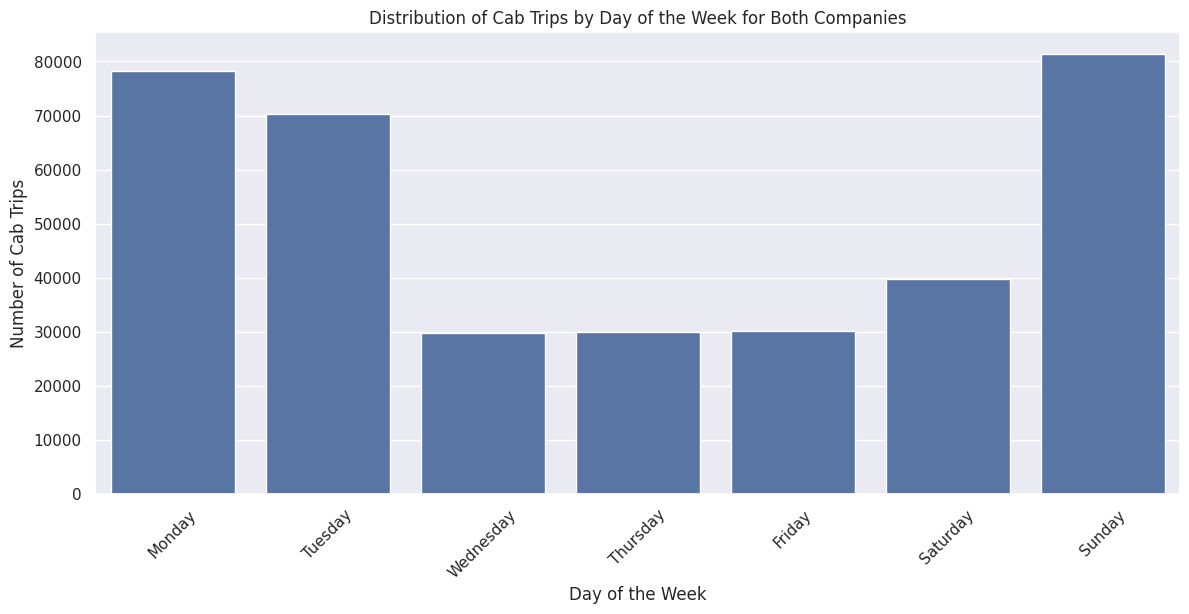

In [ ]:
# Visualize the distribution of cab trips for weekends and weekdays for both companies
plt.figure(figsize=(14, 6))
sns.countplot(x='Day_of_Week', data=master_data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Cab Trips by Day of the Week for Both Companies')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cab Trips')
plt.xticks(rotation=45)
plt.show()

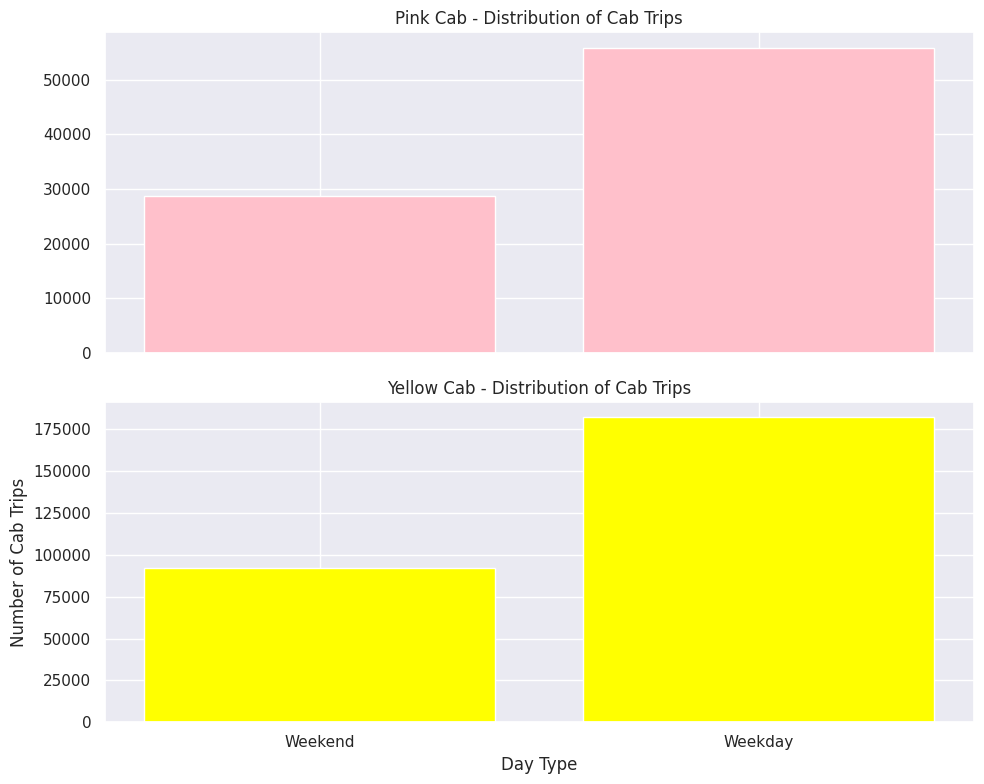

In [ ]:
# Create subplots for Pink Cab and Yellow Cab
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot distribution of cab trips for Pink Cab
pink_data = [pink_total_trips_weekend, pink_total_trips_weekday]
pink_labels = ['Weekend', 'Weekday']
axes[0].bar(pink_labels, pink_data, color='pink')
axes[0].set_title('Pink Cab - Distribution of Cab Trips')

# Plot distribution of cab trips for Yellow Cab
yellow_data = [yellow_total_trips_weekend, yellow_total_trips_weekday]
yellow_labels = ['Weekend', 'Weekday']
axes[1].bar(yellow_labels, yellow_data, color='yellow')
axes[1].set_title('Yellow Cab - Distribution of Cab Trips')
plt.xlabel('Day Type')
plt.ylabel('Number of Cab Trips')
plt.tight_layout()
plt.show()

## Final Recommendation to XYZ

Based on the extensive exploratory data analysis (EDA) and hypothesis testing conducted, here are the key recommendations for our client, XYZ:

- Company Selection:

Based on the profitability analysis, it's evident that Yellow Cab has consistently higher profitability compared to Pink Cab. Therefore, XYZ may consider Yellow Cab as the preferable option for investment due to its better financial performance.

More specifically:

- Yellow Cab demonstrates a higher number of customers compared to Pink Cab, as indicated by statistical tests such as the Two-Sample T-Test.
Profitability trends, including factors such as payment modes, city populations, and seasonal variations, should be carefully evaluated to understand Yellow Cab's financial performance and growth potential.
Yellow Cab's market presence and customer base may offer opportunities for market expansion and growth.

- While Pink Cab may have fewer customers compared to Yellow Cab, there are still significant opportunities for growth and market penetration, especially in segments where it demonstrates a competitive advantage.
Market segmentation insights reveal that Pink Cab may appeal to specific demographic segments, which can be leveraged to tailor marketing strategies and enhance customer experience.